In [2]:
# Moviepy and other video processing instalations:

!pip install --upgrade pip
!pip install moviepy
!pip install imageio-ffmpeg

    100% |████████████████████████████████| 1.4MB 351kB/s eta 0:00:01
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1
     |████████████████████████████████| 3.3MB 3.5MB/s eta 0:00:01
  Stored in directory: /root/.cache/pip/wheels/46/d7/61/fe435bf3dc20403ff38ffed213528ae710b4301ac6b403c582
Successfully built imageio
  Found existing installation: imageio 2.5.0
    Uninstalling imageio-2.5.0:
      Successfully uninstalled imageio-2.5.0
     |████████████████████████████████| 22.2MB 3.4MB/s eta 0:00:01    |█▉                              | 1.3MB 3.4MB/s eta 0:00:07     |█████████████                   | 9.1MB 3.4MB/s eta 0:00:04     |█████████████████████████████   | 20.1MB 3.4MB/s eta 0:00:01     |███████████████████████████████▎| 21.7MB 3.4MB/s eta 0:00:01


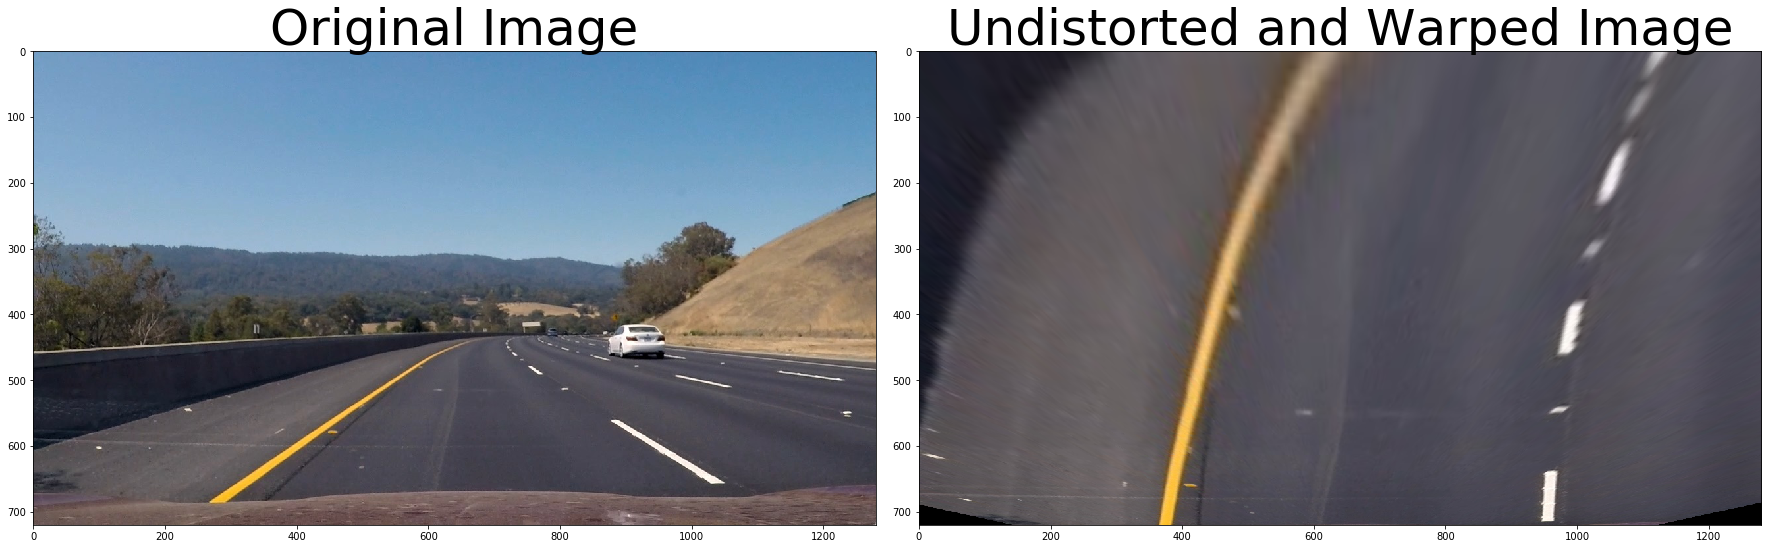

In [3]:
##################################################################
# 1. unwarp and transform
#---sub Model: Working model for undistorted and warped image---#
    
##################################################################
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import pickle
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

from matplotlib.patches import Polygon
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# Refer to chessboard_corner for the calculation of the camera matrix and the distortion matrix#
# serealise the matrix using pickle (stored under camera_cal/wide_dist_pickle.p)#
# retrive the distortion and camera matrix from pickle#

dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
img = cv2.imread('test_images/test3.jpg')
img_size= (img.shape[1], img.shape[0])
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


#undistort image using the values retrived from pickle
def corners_unwarp(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #define source and destination
    
    # defining the 4 points of the source
    xsize = img.shape[1]
    ysize = img.shape[0]
    left_bottom_s = (230, ysize -50)
    left_top_s = (xsize / 2 - 55, ysize / 2 +90)
    right_bottom_s = (xsize - 235, ysize -50)
    right_top_s = (xsize / 2 + 50, ysize / 2 + 90)
    src = np.float32([(left_bottom_s), (left_top_s), (right_top_s), (right_bottom_s)])
    #src = np.float32([(230, 670),( 590, 448),(688, 448),(1050, 670)])
   
    # defining the 4 points of the destination
    left_bottom_d = (320, ysize)
    left_top_d = (320, 0)
    right_bottom_d = (xsize - 340, ysize )
    right_top_d = (xsize - 340 , 0)
    dst = np.float32([(left_bottom_d), (left_top_d), (right_top_d), (right_bottom_d)])
    # dst = np.float32([(320, 720),(320, 0),(960, 0),(960, 720)])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, M, src
top_down, perspective_M, src = corners_unwarp(img, mtx, dist)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
top_down = cv2.cvtColor(top_down, cv2.COLOR_BGR2RGB)



f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#code to save image
#image_name= fname.split('/')
#resultImageName = 'result_test6.jpg'
#plt.savefig(os.path.join('output_images/Before_after_undistort_transform' , resultImageName))


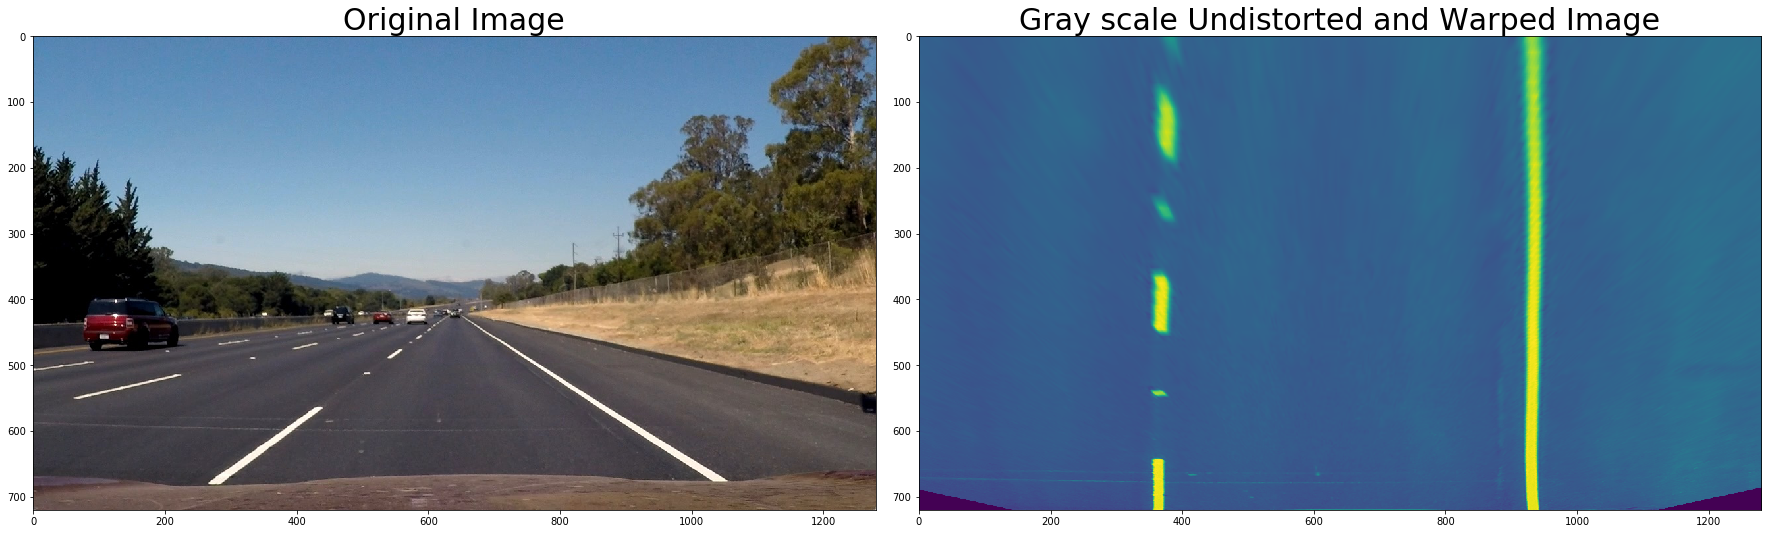

In [18]:
##################################################################
# 1. unwarp and transform
# 2. Transform Image into Grayscale
#---sub Model: Working model for undistorted and warped image in grayscale---#
    
##################################################################
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import pickle
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

# Refer to chessboard_corner for the calculation of the camera matrix and the distortion matrix#
# serealise the matrix using pickle (stored under camera_cal/wide_dist_pickle.p)#
# retrive the distortion and camera matrix from pickle#

dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
image_read = mpimg.imread('test_images/straight_lines2.jpg')
img_size= (image_read.shape[1], image_read.shape[0])

image_gray = cv2.cvtColor(image_read, cv2.COLOR_RGB2GRAY)


#undistort image using the values retrived from pickle
def corners_unwarp(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #define source and destination
    
    # defining the 4 points of the source
    xsize = img.shape[1]
    ysize = img.shape[0]
    left_bottom_s = (230, ysize -50)
    left_top_s = (xsize / 2 - 55, ysize / 2 +90)
    right_bottom_s = (xsize - 235, ysize -50)
    right_top_s = (xsize / 2 + 50, ysize / 2 + 90)
    src = np.float32([(left_bottom_s), (left_top_s), (right_top_s), (right_bottom_s)])
    #src = np.float32([(230, 670),( 590, 448),(688, 448),(1050, 670)])
   
    # defining the 4 points of the destination
    left_bottom_d = (320, ysize)
    left_top_d = (320, 0)
    right_bottom_d = (xsize - 340, ysize )
    right_top_d = (xsize - 340 , 0)
    dst = np.float32([(left_bottom_d), (left_top_d), (right_top_d), (right_bottom_d)])
    # dst = np.float32([(320, 720),(320, 0),(960, 0),(960, 720)])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, M, src

Image_top_down, perspective_M, src = corners_unwarp(image_gray, mtx, dist)

#plot polygon on defined source


#imshow(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout() 
ax1.imshow(image_read)

# ax1.imshow(image_gray)# use this to display image in gray
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(Image_top_down)
ax2.set_title('Gray scale Undistorted and Warped Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#code to save image
#image_name= fname.split('/')
#resultImageName = 'result_test6.jpg'
#plt.savefig(os.path.join('output_images/Before_after_undistort_transform' , resultImageName))

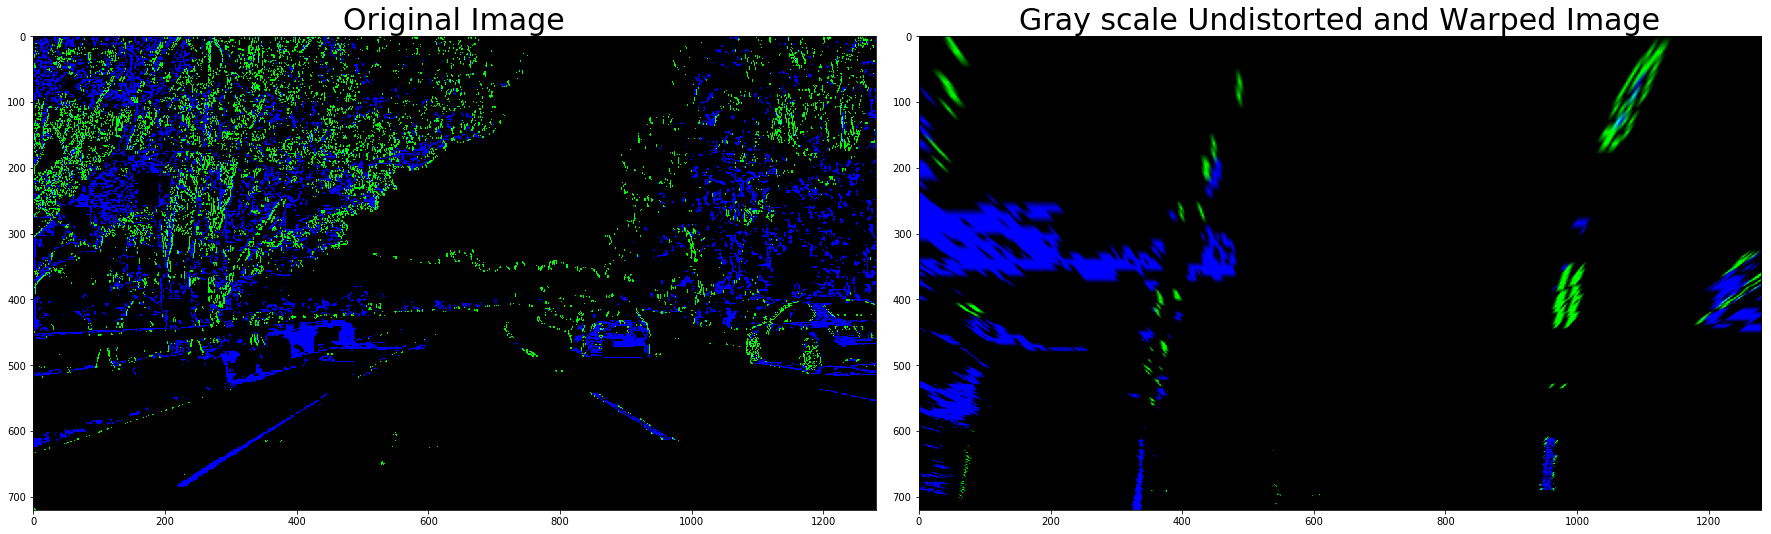

In [100]:
##################################################################
# 1. unwarp and transform
# 2. Transform Image into Grayscale
# 3. Binary image of the Read image
#---sub Model: xx---#
    
##################################################################
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import pickle
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

# Refer to chessboard_corner for the calculation of the camera matrix and the distortion matrix#
# serealise the matrix using pickle (stored under camera_cal/wide_dist_pickle.p)#
# retrive the distortion and camera matrix from pickle#

dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
image_read = mpimg.imread('test_images/test5.jpg')
img_size= (image_read.shape[1], image_read.shape[0])
# grayscvale the image
image_gray = cv2.cvtColor(image_read, cv2.COLOR_RGB2GRAY)

# color binary

def color_binary(img, s_thresh=(200, 255), sx_thresh=(40, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
    
image_CB = color_binary(image_read)

#undistort image using the values retrived from pickle
def corners_unwarp(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #define source and destination
    
    # defining the 4 points of the source
    xsize = img.shape[1]
    ysize = img.shape[0]
    left_bottom_s = (230, ysize -50)
    left_top_s = (xsize / 2 - 55, ysize / 2 +90)
    right_bottom_s = (xsize - 235, ysize -50)
    right_top_s = (xsize / 2 + 50, ysize / 2 + 90)
    src = np.float32([(left_bottom_s), (left_top_s), (right_top_s), (right_bottom_s)])
    #src = np.float32([(230, 670),( 590, 448),(688, 448),(1050, 670)])
   
    # defining the 4 points of the destination
    left_bottom_d = (320, ysize)
    left_top_d = (320, 0)
    right_bottom_d = (xsize - 340, ysize )
    right_top_d = (xsize - 340 , 0)
    dst = np.float32([(left_bottom_d), (left_top_d), (right_top_d), (right_bottom_d)])
    # dst = np.float32([(320, 720),(320, 0),(960, 0),(960, 720)])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, M

Image_top_down, perspective_M = corners_unwarp(image_CB, mtx, dist)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image_CB)
# ax1.imshow(image_gray)# use this to display image in gray
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(Image_top_down)
ax2.set_title('Gray scale Undistorted and Warped Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#code to save image
#image_name= fname.split('/')
#resultImageName = 'result_test6.jpg'
#plt.savefig(os.path.join('output_images/Before_after_undistort_transform' , resultImageName))

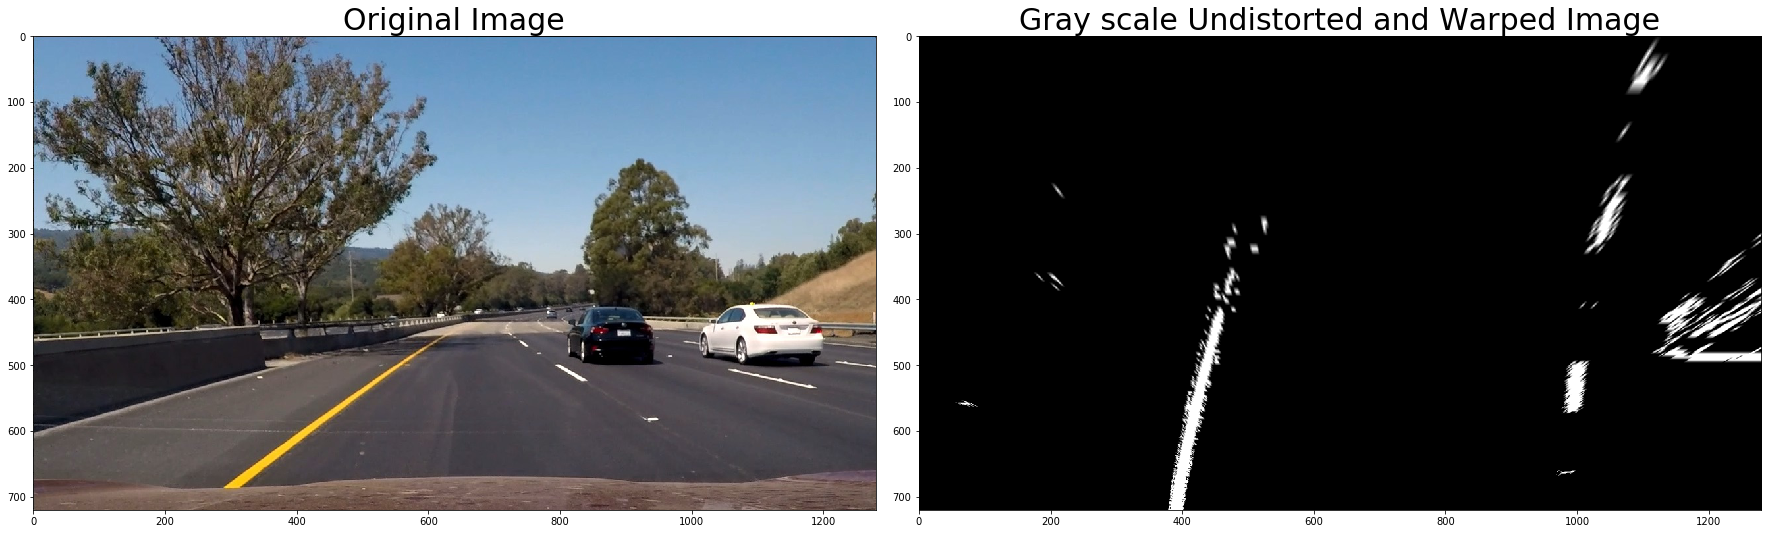

In [5]:
##################################################################
# 1. unwarp and transform
# 2. Transform Image into Grayscale
# 3. Binary image of the Read image
# 4. experiments on the binary image
#---sub Model: working model of warped, undistorted, top_down image in binary black and white---#
    
##################################################################
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import pickle
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

# Refer to chessboard_corner for the calculation of the camera matrix and the distortion matrix#
# serealise the matrix using pickle (stored under camera_cal/wide_dist_pickle.p)#
# retrive the distortion and camera matrix from pickle#

dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
image_read = mpimg.imread('test_images/test6.jpg')
img_size= (image_read.shape[1], image_read.shape[0])
# grayscvale the image
#image_gray = cv2.cvtColor(image_read, cv2.COLOR_RGB2GRAY)

# color binary

def color_binary(img,gray_thresh=(230, 255), h_thresh=(230, 255),l_thresh= (240, 255),s_thresh=(150, 255), sx_thresh=(70, 100)):
    img = np.copy(img)
    
    # binary image from grayscale
    image_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    binary_gray = np.zeros_like(image_gray)
    binary_gray [(image_gray > gray_thresh[0]) & (image_gray <= gray_thresh[1])] = 1

    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1
    
     # Threshold color channel
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= l_thresh[0]) & (l_channel <= l_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    binary_combined = (binary_gray)|(sxbinary)|(h_binary)|(l_binary)|(s_binary)
    # Stack each channel)
    #color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    color_binary = np.dstack(( binary_combined, binary_combined, binary_combined)) * 255
    return color_binary
    
image_CB = color_binary(image_read)

#undistort image using the values retrived from pickle
def corners_unwarp(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #define source and destination
    
    # defining the 4 points of the source
    xsize = img.shape[1]
    ysize = img.shape[0]
    left_bottom_s = (230, ysize -50)
    left_top_s = (xsize / 2 - 55, ysize / 2 +90)
    right_bottom_s = (xsize - 235, ysize -50)
    right_top_s = (xsize / 2 + 50, ysize / 2 + 90)
    src = np.float32([(left_bottom_s), (left_top_s), (right_top_s), (right_bottom_s)])
    #src = np.float32([(230, 670),( 590, 448),(688, 448),(1050, 670)])
   
    # defining the 4 points of the destination
    left_bottom_d = (320, ysize)
    left_top_d = (320, 0)
    right_bottom_d = (xsize - 340, ysize )
    right_top_d = (xsize - 345 , 0)
    dst = np.float32([(left_bottom_d), (left_top_d), (right_top_d), (right_bottom_d)])
    # dst = np.float32([(320, 720),(320, 0),(960, 0),(960, 720)])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, M

Image_top_down, perspective_M = corners_unwarp(image_CB, mtx, dist)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image_read)
# ax1.imshow(image_gray)# use this to display image in gray
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(Image_top_down)
ax2.set_title('Gray scale Undistorted and Warped Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#code to save image
#image_name= test1.split('/')
#resultImageName = 'result_test6.jpg'
#plt.savefig(os.path.join('output_images/before_after_undistort_transform_Binary_image' , resultImageName))

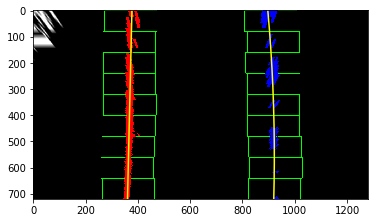

In [7]:
##################################################################
# 1. unwarp and transform
# 2. Transform Image into Grayscale
# 3. Binary image of the Read image
# 4. experiments on the binary image
# 5. finding lanes using sliding windows
#---sub Model: Working Sliding window-#
    
##################################################################
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import pickle
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

# Refer to chessboard_corner for the calculation of the camera matrix and the distortion matrix#
# serealise the matrix using pickle (stored under camera_cal/wide_dist_pickle.p)#
# retrive the distortion and camera matrix from pickle#

dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
image_read = mpimg.imread('test_images/straight_lines1.jpg')
img_size= (image_read.shape[1], image_read.shape[0])
# grayscvale the image
#image_gray = cv2.cvtColor(image_read, cv2.COLOR_RGB2GRAY)

# color binary

def color_binary(img,gray_thresh=(230, 255), h_thresh=(230, 255),l_thresh= (240, 255),s_thresh=(150, 255), sx_thresh=(70, 100)):
    img = np.copy(img)
    
    # binary image from grayscale
    image_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    binary_gray = np.zeros_like(image_gray)
    binary_gray [(image_gray > gray_thresh[0]) & (image_gray <= gray_thresh[1])] = 1

    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1
    
     # Threshold color channel
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= l_thresh[0]) & (l_channel <= l_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    binary_combined = (binary_gray)|(sxbinary)|(h_binary)|(l_binary)|(s_binary)
    # Stack each channel)
    #color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    color_binary = np.dstack(( binary_combined,binary_combined,binary_combined)) * 255
    return color_binary
    
image_CB = color_binary(image_read)
image_CB= image_CB[:,:,2]

#undistort image using the values retrived from pickle
def corners_unwarp(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #define source and destination
    
    # defining the 4 points of the source
    xsize = img.shape[1]
    ysize = img.shape[0]
    left_bottom_s = (230, ysize -50)
    left_top_s = (xsize / 2 - 55, ysize / 2 +90)
    right_bottom_s = (xsize - 235, ysize -50)
    right_top_s = (xsize / 2 + 50, ysize / 2 + 90)
    src = np.float32([(left_bottom_s), (left_top_s), (right_top_s), (right_bottom_s)])
    #src = np.float32([(230, 670),( 590, 448),(688, 448),(1050, 670)])
   
    # defining the 4 points of the destination
    left_bottom_d = (320, ysize)
    left_top_d = (320, 0)
    right_bottom_d = (xsize - 340, ysize )
    right_top_d = (xsize - 345 , 0)
    dst = np.float32([(left_bottom_d), (left_top_d), (right_top_d), (right_bottom_d)])
    # dst = np.float32([(320, 720),(320, 0),(960, 0),(960, 720)])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, M

Image_top_down, perspective_M = corners_unwarp(image_CB, mtx, dist)

#########################################################################
##---- Fit sliding windows----------------####
#########################################################################

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
   
    #print(histogram))
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    #print (left_fit)
    #print (right_fit)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img


Image_fit_window = fit_polynomial(Image_top_down)

plt.imshow(Image_fit_window)

#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
#f.tight_layout()
#ax1.imshow(image_read)
# ax1.imshow(image_gray)# use this to display image in gray
#ax1.set_title('Original Image', fontsize=30)
#ax2.imshow(Image_top_down)
#ax2.set_title('Gray scale Undistorted and Warped Image', fontsize=30)
#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#code to save image
#image_name= test1.split('/')
#resultImageName = 'result_test6_lane_from_sliding_window.jpg'
#plt.savefig(os.path.join('output_images/polynomial on the transformed image' , resultImageName))

(1280, 720)
fit_pol_lane value is  1


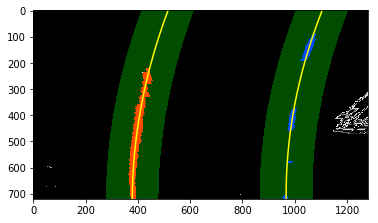

In [24]:
##################################################################
# 1. unwarp and transform
# 2. Transform Image into Grayscale
# 3. Binary image of the Read image
# 4. experiments on the binary image
# 5. discard finding lanes using sliding windows
# 6. finding lanes using search from prior
#---sub Model: Working lane finding in the area of prior lane#
    
##################################################################
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import pickle
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

# Refer to chessboard_corner for the calculation of the camera matrix and the distortion matrix#
# serealise the matrix using pickle (stored under camera_cal/wide_dist_pickle.p)#
# retrive the distortion and camera matrix from pickle#

dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
image_read = mpimg.imread('test_images/test1.jpg')
img_size= (image_read.shape[1], image_read.shape[0])
print(img_size)
# grayscvale the image
#image_gray = cv2.cvtColor(image_read, cv2.COLOR_RGB2GRAY)

# color binary

def color_binary(img,gray_thresh=(230, 255), h_thresh=(230, 255),l_thresh= (240, 255),s_thresh=(150, 255), sx_thresh=(70, 100)):
    img = np.copy(img)
    
    # binary image from grayscale
    image_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    binary_gray = np.zeros_like(image_gray)
    binary_gray [(image_gray > gray_thresh[0]) & (image_gray <= gray_thresh[1])] = 1

    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1
    
     # Threshold color channel
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= l_thresh[0]) & (l_channel <= l_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    binary_combined = (binary_gray)|(sxbinary)|(h_binary)|(l_binary)|(s_binary)
    # Stack each channel)
    #color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    color_binary = np.dstack(( binary_combined,binary_combined,binary_combined)) * 255
    return color_binary
    
image_CB = color_binary(image_read)
image_CB= image_CB[:,:,2]

#undistort image using the values retrived from pickle
def corners_unwarp(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #define source and destination
    
    # defining the 4 points of the source
    xsize = img.shape[1]
    ysize = img.shape[0]
    left_bottom_s = (230, ysize -50)
    left_top_s = (xsize / 2 - 55, ysize / 2 +90)
    right_bottom_s = (xsize - 235, ysize -50)
    right_top_s = (xsize / 2 + 50, ysize / 2 + 90)
    src = np.float32([(left_bottom_s), (left_top_s), (right_top_s), (right_bottom_s)])
    #src = np.float32([(230, 670),( 590, 448),(688, 448),(1050, 670)])
   
    # defining the 4 points of the destination
    left_bottom_d = (320, ysize)
    left_top_d = (320, 0)
    right_bottom_d = (xsize - 340, ysize )
    right_top_d = (xsize - 345 , 0)
    dst = np.float32([(left_bottom_d), (left_top_d), (right_top_d), (right_bottom_d)])
    # dst = np.float32([(320, 720),(320, 0),(960, 0),(960, 720)])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    #inverse Transform
    M_Inv = cv2.getPerspectiveTransform(dst, src)
    
    return warped, M, M_Inv

Image_top_down, perspective_M, Inverse_M = corners_unwarp(image_CB, mtx, dist)

#######################################################################
# --- find lane from previous-----#####
#######################################################################

# Load our image - this should be a new frame since last time!

#[ 2.76657214e-04 -5.36742976e-01  6.32736498e+02]
#[ 1.66092155e-04 -3.23694165e-01  1.12134046e+03]
# Polynomial fit values from the previous frame
# Manually feeding to check
left_fit = np.array([ 2.76657214e-04, -5.36742976e-01,  6.32736498e+02])
right_fit = np.array([ 1.66092155e-04, -3.23694165e-01,  1.12134046e+03])

def fit_poly(img_shape, leftx, lefty, rightx, righty):

    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    # Were right and left lane found
    if ((leftx.all() ==0 and lefty.all() ==0) | (rightx.all() ==0 and righty.all()==0)):
        fit_pol_lane=0 # lane not found
    else:
        fit_pol_lane=1 # lane found
    
    print ("fit_pol_lane value is ",fit_pol_lane)
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
 
    ### calculate the radius of curvature###

    return result

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
image_fit_prev = search_around_poly(Image_top_down)
# View your output
plt.imshow(image_fit_prev )

#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
#f.tight_layout()
#ax1.imshow(image_read)
# ax1.imshow(image_gray)# use this to display image in gray
#ax1.set_title('Original Image', fontsize=30)
#ax2.imshow(Image_top_down)
#ax2.set_title('Gray scale Undistorted and Warped Image', fontsize=30)
#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#code to save image
#image_name= test1.split('/')
#resultImageName = 'result_test6_lane region.jpg'
#plt.savefig(os.path.join('output_images/polynomial on the transformed image' , resultImageName))

(1280, 720)
leftx values [430 431 432 ... 392 393 394] lefty values [222 222 222 ... 719 719 719] rightx values [1069 1070 1071 ...  970  971  972] righty values [ 91  91  91 ... 719 719 719]
720
720
720
left radius is 510.9980383904396 m
right radius is 470.2474821243702 m


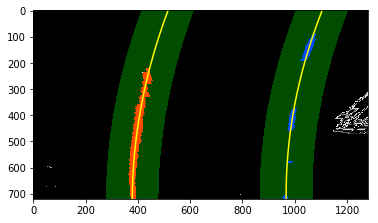

In [29]:
##################################################################
# 1. unwarp and transform
# 2. Transform Image into Grayscale
# 3. Binary image of the Read image
# 4. experiments on the binary image
# 5. discard finding lanes using sliding windows
# 6. finding lanes using search from prior
# 7. Calculate lane radius
#---sub Model: Working lane finding in the area of prior lane with radius calculation#
    
##################################################################
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import pickle
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

# Refer to chessboard_corner for the calculation of the camera matrix and the distortion matrix#
# serealise the matrix using pickle (stored under camera_cal/wide_dist_pickle.p)#
# retrive the distortion and camera matrix from pickle#

dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
image_read = mpimg.imread('test_images/test1.jpg')
img_size= (image_read.shape[1], image_read.shape[0])
print(img_size)
# grayscvale the image
#image_gray = cv2.cvtColor(image_read, cv2.COLOR_RGB2GRAY)

# color binary

def color_binary(img,gray_thresh=(230, 255), h_thresh=(230, 255),l_thresh= (240, 255),s_thresh=(150, 255), sx_thresh=(70, 100)):
    img = np.copy(img)
    
    # binary image from grayscale
    image_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    binary_gray = np.zeros_like(image_gray)
    binary_gray [(image_gray > gray_thresh[0]) & (image_gray <= gray_thresh[1])] = 1

    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1
    
     # Threshold color channel
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= l_thresh[0]) & (l_channel <= l_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    binary_combined = (binary_gray)|(sxbinary)|(h_binary)|(l_binary)|(s_binary)
    # Stack each channel)
    #color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    color_binary = np.dstack(( binary_combined,binary_combined,binary_combined)) * 255
    return color_binary
    
image_CB = color_binary(image_read)
image_CB= image_CB[:,:,2]

#undistort image using the values retrived from pickle
def corners_unwarp(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #define source and destination
    
    # defining the 4 points of the source
    xsize = img.shape[1]
    ysize = img.shape[0]
    left_bottom_s = (230, ysize -50)
    left_top_s = (xsize / 2 - 55, ysize / 2 +90)
    right_bottom_s = (xsize - 235, ysize -50)
    right_top_s = (xsize / 2 + 50, ysize / 2 + 90)
    src = np.float32([(left_bottom_s), (left_top_s), (right_top_s), (right_bottom_s)])
    #src = np.float32([(230, 670),( 590, 448),(688, 448),(1050, 670)])
   
    # defining the 4 points of the destination
    left_bottom_d = (320, ysize)
    left_top_d = (320, 0)
    right_bottom_d = (xsize - 340, ysize )
    right_top_d = (xsize - 345 , 0)
    dst = np.float32([(left_bottom_d), (left_top_d), (right_top_d), (right_bottom_d)])
    # dst = np.float32([(320, 720),(320, 0),(960, 0),(960, 720)])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    #inverse Transform
    M_Inv = cv2.getPerspectiveTransform(dst, src)
    
    return warped, M, M_Inv

Image_top_down, perspective_M, Inverse_M = corners_unwarp(image_CB, mtx, dist)

#######################################################################
# --- find lane from previous-----#####
#######################################################################

# Load our image - this should be a new frame since last time!

#[ 2.76657214e-04 -5.36742976e-01  6.32736498e+02]
#[ 1.66092155e-04 -3.23694165e-01  1.12134046e+03]
# Polynomial fit values from the previous frame
# Make sure to grab the actual values from the previous step in your project!
left_fit = np.array([ 2.76657214e-04, -5.36742976e-01,  6.32736498e+02])
right_fit = np.array([ 1.66092155e-04, -3.23694165e-01,  1.12134046e+03])

def fit_poly(img_shape, leftx, lefty, rightx, righty):

    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    print ("leftx values",leftx,"lefty values", lefty,"rightx values" , rightx, "righty values", righty)
    # Were right and left lane found with this method
    if ((leftx.all() ==0 and lefty.all() ==0) | (rightx.all() ==0 and righty.all()==0)):
        fit_pol_lane=0 # lane not found
    else:
        fit_pol_lane=1 # lane found
    
    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    print(left_fitx.shape[0])
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
 

    return result ,left_fitx, right_fitx

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
image_fit_prev, left_x, right_x = search_around_poly(Image_top_down)
# View your output
plt.imshow(image_fit_prev )

### calculate the radius of curvature###

def curvature_radius (leftx, rightx, img_shape, xm_per_pix=3.7/800, ym_per_pix = 25/720):
    ploty = np.linspace(0, img_shape[1] - 1, img_shape[1])
    
    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y
    
    # Fit a second order polynomial to pixel positions in each fake lane line
    print(ploty.shape[0])
    print(leftx.shape[0])
    left_fit = np.polyfit(ploty, leftx, 2)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fit = np.polyfit(ploty, rightx, 2)
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 25/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/800 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    y_eval = np.max(ploty)
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    # Now our radius of curvature is in meters
    return (left_curverad, right_curverad)

img_shape_fit = (Image_top_down.shape[1], Image_top_down.shape[0])
left_c, right_c = curvature_radius (left_x, right_x, img_shape_fit)
print("left radius is",left_c,"m")
print("right radius is",right_c,"m")
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
#f.tight_layout()
#ax1.imshow(image_read)
# ax1.imshow(image_gray)# use this to display image in gray
#ax1.set_title('Original Image', fontsize=30)
#ax2.imshow(Image_top_down)
#ax2.set_title('Gray scale Undistorted and Warped Image', fontsize=30)
#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#code to save image
#image_name= test1.split('/')
#resultImageName = 'result_test6_lane region.jpg'
#plt.savefig(os.path.join('output_images/polynomial on the transformed image' , resultImageName))

(1280, 720)
fit_pol_lane value is  1
720


NameError: name 'fit_pol_lane' is not defined

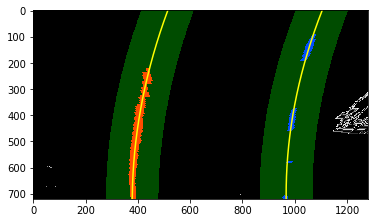

In [33]:
##################################################################
# 1. unwarp and transform
# 2. Transform Image into Grayscale
# 3. Binary image of the Read image
# 4. experiments on the binary image
# 5. discard finding lanes using sliding windows
# 6. finding lanes using search from prior
# 7. Calculate lane radius
# 8. draw the lane back to the original image from the warped image
#---sub Model: everything works on the image as required#
    
##################################################################
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import pickle
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

# Refer to chessboard_corner for the calculation of the camera matrix and the distortion matrix#
# serealise the matrix using pickle (stored under camera_cal/wide_dist_pickle.p)#
# retrive the distortion and camera matrix from pickle#

dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
image_read = mpimg.imread('test_images/test1.jpg')
img_size= (image_read.shape[1], image_read.shape[0])
print(img_size)
# grayscvale the image
#image_gray = cv2.cvtColor(image_read, cv2.COLOR_RGB2GRAY)

# color binary

def color_binary(img,gray_thresh=(230, 255), h_thresh=(230, 255),l_thresh= (240, 255),s_thresh=(150, 255), sx_thresh=(70, 100)):
    img = np.copy(img)
    
    # binary image from grayscale
    image_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    binary_gray = np.zeros_like(image_gray)
    binary_gray [(image_gray > gray_thresh[0]) & (image_gray <= gray_thresh[1])] = 1

    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1
    
     # Threshold color channel
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= l_thresh[0]) & (l_channel <= l_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    binary_combined = (binary_gray)|(sxbinary)|(h_binary)|(l_binary)|(s_binary)
    # Stack each channel)
    #color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    color_binary = np.dstack(( binary_combined,binary_combined,binary_combined)) * 255
    return color_binary
    
image_CB = color_binary(image_read)
image_CB= image_CB[:,:,2]

#undistort image using the values retrived from pickle
def corners_unwarp(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #define source and destination
    
    # defining the 4 points of the source
    xsize = img.shape[1]
    ysize = img.shape[0]
    left_bottom_s = (230, ysize -50)
    left_top_s = (xsize / 2 - 55, ysize / 2 +90)
    right_bottom_s = (xsize - 235, ysize -50)
    right_top_s = (xsize / 2 + 50, ysize / 2 + 90)
    src = np.float32([(left_bottom_s), (left_top_s), (right_top_s), (right_bottom_s)])
    #src = np.float32([(230, 670),( 590, 448),(688, 448),(1050, 670)])
   
    # defining the 4 points of the destination
    left_bottom_d = (320, ysize)
    left_top_d = (320, 0)
    right_bottom_d = (xsize - 340, ysize )
    right_top_d = (xsize - 345 , 0)
    dst = np.float32([(left_bottom_d), (left_top_d), (right_top_d), (right_bottom_d)])
    # dst = np.float32([(320, 720),(320, 0),(960, 0),(960, 720)])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    #inverse Transform needed when the lane marked on the warped image has to be brought back to the camera perspective
    M_Inv = cv2.getPerspectiveTransform(dst, src)
    
    return warped, M, M_Inv

Image_top_down, perspective_M, Inverse_M = corners_unwarp(image_CB, mtx, dist)

#######################################################################
# --- find lane from previous-----#####
#######################################################################

# Load our image - this should be a new frame since last time!

#[ 2.76657214e-04 -5.36742976e-01  6.32736498e+02]
#[ 1.66092155e-04 -3.23694165e-01  1.12134046e+03]
# Polynomial fit values from the previous frame
# Make sure to grab the actual values from the previous step in your project!
left_fit = left_fit_prev
right_fit = right_fit_prev

def fit_poly(img_shape, leftx, lefty, rightx, righty):

    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
        # Were right and left lane found with this method
    if ((leftx.all() ==0 and lefty.all() ==0) | (rightx.all() ==0 and righty.all()==0)):
        fit_pol_lane=0 # lane not found
    else:
        fit_pol_lane=1 # lane found
        
    print ("fit_pol_lane value is ",fit_pol_lane)

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    print(left_fitx.shape[0])
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
 

    return result ,left_fitx, right_fitx

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
image_fit, left_x, right_x = search_around_poly(Image_top_down)
# View your output
plt.imshow(image_fit)

#########################################################################
##---- Fit sliding windows----------------####
#########################################################################

def find_lane_pixels(binary_warped):

    if fit_pol_lane ==0: # lanes found in the other method
        return leftx.fill(0), lefty.fill(0), rightx.fill(0), righty.fill(0), out_img ==False # then return zero
    else: #else use the sliding window method
        # Take a histogram of the bottom half of the image    
        histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
        # Create an output image to draw on and visualize the result
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))
        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines
        midpoint = np.int(histogram.shape[0]//2)

        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint

        #print(histogram))
        # HYPERPARAMETERS
        # Choose the number of sliding windows
        nwindows = 9
        # Set the width of the windows +/- margin
        margin = 100
        # Set minimum number of pixels found to recenter window
        minpix = 50

        # Set height of windows - based on nwindows above and image shape
        window_height = np.int(binary_warped.shape[0]//nwindows)
        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Current positions to be updated later for each window in nwindows
        leftx_current = leftx_base
        rightx_current = rightx_base

        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []

        # Step through the windows one by one
        for window in range(nwindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window+1)*window_height
            win_y_high = binary_warped.shape[0] - window*window_height
            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin

            # Draw the windows on the visualization image
            cv2.rectangle(out_img,(win_xleft_low,win_y_low),
            (win_xleft_high,win_y_high),(0,255,0), 2) 
            cv2.rectangle(out_img,(win_xright_low,win_y_low),
            (win_xright_high,win_y_high),(0,255,0), 2) 

            # Identify the nonzero pixels in x and y within the window #
            good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
            (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
            good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
            (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]

            # Append these indices to the lists
            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)

            # If you found > minpix pixels, recenter next window on their mean position
            if len(good_left_inds) > minpix:
                leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            if len(good_right_inds) > minpix:        
                rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        # Concatenate the arrays of indices (previously was a list of lists of pixels)
        try:
            left_lane_inds = np.concatenate(left_lane_inds)
            right_lane_inds = np.concatenate(right_lane_inds)
        except ValueError:
            # Avoids an error if the above is not implemented fully
            pass

        # Extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]

            # Were right and left lane found with this method
        if ((leftx.all() ==0 and lefty.all() ==0) | (rightx.all() ==0 and righty.all()==0)):
            fit_win_lane=0 # lane not found
        else:
            fit_win_lane=1 # lane found

        print ("fit_win_lane value is ",fit_win_lane)

        return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    #print (left_fit)
    #print (right_fit)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img, left_fit, right_fit, left_fitx, right_fitx

Image_fit, left_fit_prev, right_fit_prev,left_fitx, right_fitx = fit_polynomial(Image_top_down)

### calculate the radius of curvature###

def curvature_radius (leftx, rightx, img_shape, xm_per_pix=3.7/800, ym_per_pix = 25/720):
    ploty = np.linspace(0, img_shape[1] - 1, img_shape[1])
    
    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y
    
    # Fit a second order polynomial to pixel positions in each fake lane line
    print(ploty.shape[0])
    print(leftx.shape[0])
    left_fit = np.polyfit(ploty, leftx, 2)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fit = np.polyfit(ploty, rightx, 2)
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 25/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/800 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    y_eval = np.max(ploty)
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    # Now our radius of curvature is in meters
    return (left_curverad, right_curverad)

img_shape_fit = (Image_top_down.shape[1], Image_top_down.shape[0])
left_c, right_c = curvature_radius (left_x, right_x, img_shape_fit)
print("left radius is",left_c,"m")
print("right radius is",right_c,"m")

#############################################
### add the lanes to the original image#####
############################################

def plot_back_lane(img, warped_img, left_points, right_points, Minv):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    left_fitx = left_points[0]
    right_fitx = right_points[0]
    ploty = left_points[1]

    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 

    # Combine the result with the original image
    return cv2.addWeighted(img, 1, newwarp, 0.3, 0)
ploty = np.linspace(0, Image_top_down.shape[0]-1, Image_top_down.shape[0] )
left_points=(left_fitx, ploty)
right_points=(right_fitx, ploty)
image_lane = plot_back_lane(image_read, Image_top_down, left_points, right_points, Inverse_M )

# Plot the results
#plt_images(image_read, 'Raw image', image_lane, 'Lane detected')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image_read)
ax1.set_title('Raw Image', fontsize=30)
ax2.imshow(image_lane)
ax2.set_title('Image with detected lane', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#code to save image
#image_name= test1.split('/')
#resultImageName = 'result_test6_lane region.jpg'
#plt.savefig(os.path.join('output_images/polynomial on the transformed image' , resultImageName))

In [5]:
# Moviepy and other video processing instalations:

!pip install --upgrade pip
!pip install moviepy
!pip install imageio-ffmpeg

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (19.1)


left radius is 518.2868280117144 m
right radius is 470.2474821243702 m
vehicle offset is -2.0782426544470836 m


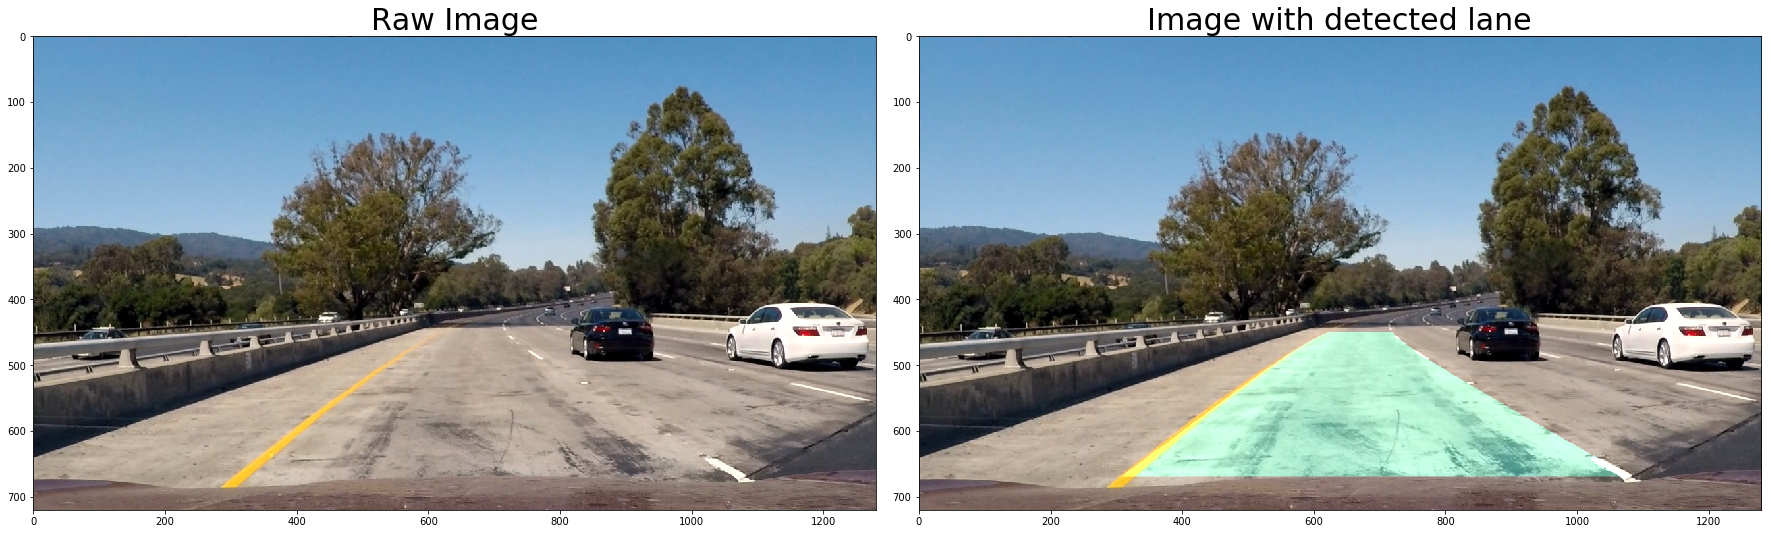

In [1]:
##################################################################
# 1. unwarp and transform
# 2. Transform Image into Grayscale
# 3. Binary image of the Read image
# 4. experiments on the binary image
# 5. discard finding lanes using sliding windows
# 6. finding lanes using search from prior
# 7. Calculate lane radius
# 8. draw the lane back to the original image from the warped image
# 9. clean up everything unwanted (print, plot and so on) and prepare for the video
# final version#
    
##################################################################

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import math
import pickle
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image
import moviepy
from matplotlib.patches import Polygon
from moviepy.editor import VideoFileClip
from IPython.display import HTML

%matplotlib inline

# Refer to chessboard_corner for the calculation of the camera matrix and the distortion matrix#
# serealise the matrix using pickle (stored under camera_cal/wide_dist_pickle.p)#
# retrive the distortion and camera matrix from pickle#
def adv_lane_det(image_raw):
    dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
    image_read = image_raw
    img_size= (image_read.shape[1], image_read.shape[0])

    # color binary

    def color_binary(img,gray_thresh=(230, 255), h_thresh=(230, 255),l_thresh= (240, 255),s_thresh=(150, 255), sx_thresh=(70, 100)):
        img = np.copy(img)

        # binary image from grayscale
        image_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        binary_gray = np.zeros_like(image_gray)
        binary_gray [(image_gray > gray_thresh[0]) & (image_gray <= gray_thresh[1])] = 1

        # Convert to HLS color space and separate the V channel
        hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        h_channel = hls[:,:,0]
        l_channel = hls[:,:,1]
        s_channel = hls[:,:,2]
        # Sobel x
        sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
        abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
        scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

        # Threshold x gradient
        sxbinary = np.zeros_like(scaled_sobel)
        sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

        # Threshold color channel
        h_binary = np.zeros_like(h_channel)
        h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1

         # Threshold color channel
        l_binary = np.zeros_like(l_channel)
        l_binary[(l_channel >= l_thresh[0]) & (l_channel <= l_thresh[1])] = 1

        # Threshold color channel
        s_binary = np.zeros_like(s_channel)
        s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

        binary_combined = (binary_gray)|(sxbinary)|(h_binary)|(l_binary)|(s_binary)
        # Stack each channel)
        #color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
        color_binary = np.dstack(( binary_combined,binary_combined,binary_combined)) * 255
        return color_binary

    image_CB = color_binary(image_read)

    # The Histogram does not work if it has a 3rd dimension  therfore reduced to single chjanel
    image_CB= image_CB[:,:,2]

    #undistort image using the values retrived from pickle
    def corners_unwarp(img, mtx, dist):
        dst = cv2.undistort(img, mtx, dist, None, mtx)

        #define source and destination
        # defining the 4 points of the source
        xsize = img.shape[1]
        ysize = img.shape[0]
        left_bottom_s = (230, ysize -50)
        left_top_s = (xsize / 2 - 55, ysize / 2 +90)
        right_bottom_s = (xsize - 235, ysize -50)
        right_top_s = (xsize / 2 + 50, ysize / 2 + 90)
        src = np.float32([(left_bottom_s), (left_top_s), (right_top_s), (right_bottom_s)])
        #src = np.float32([(230, 670),( 590, 448),(688, 448),(1050, 670)]) derived from Straight_lines1.jpg manualy (trial and error)

        # defining the 4 points of the destination
        left_bottom_d = (320, ysize)
        left_top_d = (320, 0)
        right_bottom_d = (xsize - 340, ysize )
        right_top_d = (xsize - 345 , 0)
        dst = np.float32([(left_bottom_d), (left_top_d), (right_top_d), (right_bottom_d)])
        # dst = np.float32([(320, 720),(320, 0),(960, 0),(960, 720)]) deduced for Straight_lines1.jpg manualy

        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

        #inverse Transform needed when the lane marked on the warped image has to be brought back to the camera perspective
        M_Inv = cv2.getPerspectiveTransform(dst, src)

        return warped, M, M_Inv

    Image_top_down, perspective_M, Inverse_M = corners_unwarp(image_CB, mtx, dist)

    #########################################################################
    ##---- Fit sliding windows----------------####
    #########################################################################

    def find_lane_pixels(binary_warped):
        # Take a histogram of the bottom half of the image

        histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
        # Create an output image to draw on and visualize the result
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))
        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines
        midpoint = np.int(histogram.shape[0]//2)

        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint

        #print(histogram))
        # HYPERPARAMETERS
        # Choose the number of sliding windows
        nwindows = 9
        # Set the width of the windows +/- margin
        margin = 100
        # Set minimum number of pixels found to recenter window
        minpix = 50

        # Set height of windows - based on nwindows above and image shape
        window_height = np.int(binary_warped.shape[0]//nwindows)
        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Current positions to be updated later for each window in nwindows
        leftx_current = leftx_base
        rightx_current = rightx_base

        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []

        # Step through the windows one by one
        for window in range(nwindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window+1)*window_height
            win_y_high = binary_warped.shape[0] - window*window_height
            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin

            # Draw the windows on the visualization image--> not required
            #cv2.rectangle(out_img,(win_xleft_low,win_y_low),
            #(win_xleft_high,win_y_high),(0,255,0), 2) 
            #cv2.rectangle(out_img,(win_xright_low,win_y_low),
            #(win_xright_high,win_y_high),(0,255,0), 2) 

            # Identify the nonzero pixels in x and y within the window #
            good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
            (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
            good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
            (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]

            # Append these indices to the lists
            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)

            # If you found > minpix pixels, recenter next window on their mean position
            if len(good_left_inds) > minpix:
                leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            if len(good_right_inds) > minpix:        
                rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        # Concatenate the arrays of indices (previously was a list of lists of pixels)
        try:
            left_lane_inds = np.concatenate(left_lane_inds)
            right_lane_inds = np.concatenate(right_lane_inds)
        except ValueError:
            # Avoids an error if the above is not implemented fully
            pass

        # Extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]

        return leftx, lefty, rightx, righty, out_img


    def fit_polynomial(binary_warped):
        # Find our lane pixels first
        leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

        # Fit a second order polynomial to each using `np.polyfit`
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        try:
            left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
            right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        except TypeError:
            # Avoids an error if `left` and `right_fit` are still none or incorrect
            print('The function failed to fit a line!')
            left_fitx = 1*ploty**2 + 1*ploty
            right_fitx = 1*ploty**2 + 1*ploty

        ## Visualization ##
        # Colors in the left and right lane regions
        out_img[lefty, leftx] = [255, 0, 0]
        out_img[righty, rightx] = [0, 0, 255]

        # Plots the left and right polynomials on the lane lines
        #plt.plot(left_fitx, ploty, color='yellow')
        #plt.plot(right_fitx, ploty, color='yellow')

        return out_img, left_fit, right_fit, left_fitx, right_fitx

    Image_fit, left_fit_prev, right_fit_prev,left_fitx, right_fitx = fit_polynomial(Image_top_down)
    #######################################################################
    # --- find lane from previous-----#####
    #######################################################################

    # Load our image - this should be a new frame since last time!
    # Manual trial
    #[ 2.76657214e-04 -5.36742976e-01  6.32736498e+02]
    #[ 1.66092155e-04 -3.23694165e-01  1.12134046e+03]
    # Polynomial fit values from the previous frame
    # Make sure to grab the actual values from the previous step in your project!
    left_fit = left_fit_prev
    right_fit = right_fit_prev

    def fit_poly(img_shape, leftx, lefty, rightx, righty):

        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        # Generate x and y values for plotting
        ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
        ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        return left_fitx, right_fitx, ploty

    def search_around_poly(binary_warped):
        # HYPERPARAMETER
        # Choose the width of the margin around the previous polynomial to search
        # The quiz grader expects 100 here, but feel free to tune on your own!
        margin = 100

        # Grab activated pixels
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])


        left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                        left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                        left_fit[1]*nonzeroy + left_fit[2] + margin)))
        right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                        right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                        right_fit[1]*nonzeroy + right_fit[2] + margin)))

        # Again, extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]

        # Fit new polynomials
        left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
        #print(left_fitx.shape[0])
        ## Visualization ##
        # Create an image to draw on and an image to show the selection window
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
        window_img = np.zeros_like(out_img)
        # Color in left and right line pixels
        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

        # Generate a polygon to illustrate the search window area
        # And recast the x and y points into usable format for cv2.fillPoly()
        left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
        left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
        left_line_pts = np.hstack((left_line_window1, left_line_window2))
        right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
        right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
        right_line_pts = np.hstack((right_line_window1, right_line_window2))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

        # Plot the polynomial lines onto the image
        #plt.plot(left_fitx, ploty, color='yellow')
        #plt.plot(right_fitx, ploty, color='yellow')
        ## End visualization steps ##


        return result ,left_fitx, right_fitx, leftx , rightx

    # Run image through the pipeline
    # Note that in your project, you'll also want to feed in the previous fits
    #image_fit, left_x, right_x = search_around_poly(Image_top_down)
    # View your output
    #plt.imshow(image_fit)

    ### calculate the radius of curvature###

    def curvature_radius (leftx, rightx, img_shape, xm_per_pix=3.7/800, ym_per_pix = 25/720):
        ploty = np.linspace(0, img_shape[1] - 1, img_shape[1])

        leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
        rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

        # Fit a second order polynomial to pixel positions in each fake lane line
        #print(ploty.shape[0])
        #print(leftx.shape[0])
        left_fit = np.polyfit(ploty, leftx, 2)
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fit = np.polyfit(ploty, rightx, 2)
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        # Define conversions in x and y from pixels space to meters
        ym_per_pix = 25/720 # meters per pixel in y dimension
        xm_per_pix = 3.7/800 # meters per pixel in x dimension

        # Fit new polynomials to x,y in world space
        y_eval = np.max(ploty)
        left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)

        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

        ##Calculate the vehicle offset with the center of the vehicle as the reference
        ## Image mid horizontal position 
        mid_imgx = img_shape[1]//2

        ## Car position with respect to the lane
        car_pos = (leftx[-1] + rightx[-1])/2

        ## Horizontal car offset 
        offset_x = (mid_imgx - car_pos) * xm_per_pix

        # Now our radius of curvature is in meters
        return (left_curverad, right_curverad, offset_x)

    img_shape_fit = (Image_top_down.shape[1], Image_top_down.shape[0])
    left_c, right_c, offset = curvature_radius (left_fitx, right_fitx, img_shape_fit)
    print("left radius is",left_c,"m")
    print("right radius is",right_c,"m")
    print("vehicle offset is",offset,"m")
    #############################################
    ### add the lanes to the original image#####
    ############################################

    def plot_back_lane(img, warped_img, left_points, right_points, Minv):
        # Create an image to draw the lines on
        warp_zero = np.zeros_like(warped_img).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

        # Recast the x and y points into usable format for cv2.fillPoly()
        left_fitx = left_points[0]
        right_fitx = right_points[0]
        ploty = left_points[1]

        pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
        pts = np.hstack((pts_left, pts_right))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 200))

        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 

        # Combine the result with the original image
        return cv2.addWeighted(img, 1, newwarp, 0.3, 0)
    ploty = np.linspace(0, Image_top_down.shape[0]-1, Image_top_down.shape[0] )
    left_points=(left_fitx, ploty)
    right_points=(right_fitx, ploty)
    image_lane = plot_back_lane(image_read, Image_top_down, left_points, right_points, Inverse_M )

    return (image_lane)

white_output = './project_video_SK_after detection.mp4'
clips = VideoFileClip('./project_video.mp4')
line_clips = clips.fl_image(adv_lane_det) 
line_clips.write_videofile(white_output, audio=False)

HTML("""<video width="480" height="270" controls><source src="{0}"></video>""".format(white_output_improved))

left radius is 374.784454764 m
right radius is 590.274069048 m
vehicle offset is -0.787281948953 m
[MoviePy] >>>> Building video ./project_video_SK_after detection.mp4
[MoviePy] Writing video ./project_video_SK_after detection.mp4


  0%|          | 1/1261 [00:00<02:38,  7.97it/s]

left radius is 374.784454764 m
right radius is 590.274069048 m
vehicle offset is -0.787281948953 m


  0%|          | 2/1261 [00:00<02:52,  7.30it/s]

left radius is 368.222692484 m
right radius is 524.485562106 m
vehicle offset is -0.764150092374 m


  0%|          | 3/1261 [00:00<02:51,  7.31it/s]

left radius is 376.431111005 m
right radius is 469.514026367 m
vehicle offset is -0.731482763802 m


  0%|          | 4/1261 [00:00<02:48,  7.46it/s]

left radius is 372.512959141 m
right radius is 554.367833746 m
vehicle offset is -0.730410345455 m


  0%|          | 5/1261 [00:00<02:47,  7.49it/s]

left radius is 411.775740221 m
right radius is 499.670700541 m
vehicle offset is -0.720332307969 m


  0%|          | 6/1261 [00:00<02:43,  7.66it/s]

left radius is 395.628717708 m
right radius is 540.045675823 m
vehicle offset is -0.701188095322 m


  1%|          | 7/1261 [00:00<02:47,  7.49it/s]

left radius is 445.477573921 m
right radius is 715.065537923 m
vehicle offset is -0.737265221396 m


  1%|          | 8/1261 [00:01<02:47,  7.46it/s]

left radius is 428.979602682 m
right radius is 478.71182123 m
vehicle offset is -0.677672951969 m


  1%|          | 9/1261 [00:01<02:45,  7.55it/s]

left radius is 466.858362653 m
right radius is 429.935725757 m
vehicle offset is -0.680794515655 m


  1%|          | 10/1261 [00:01<02:42,  7.70it/s]

left radius is 469.758273274 m
right radius is 444.711173946 m
vehicle offset is -0.671366695509 m


  1%|          | 11/1261 [00:01<02:41,  7.73it/s]

left radius is 492.609423322 m
right radius is 657.714771746 m
vehicle offset is -0.685121543206 m


  1%|          | 12/1261 [00:01<02:39,  7.83it/s]

left radius is 534.378246742 m
right radius is 566.055979957 m
vehicle offset is -0.712853961869 m


  1%|          | 13/1261 [00:01<02:42,  7.70it/s]

left radius is 538.295053276 m
right radius is 567.930535084 m
vehicle offset is -0.696459084491 m


  1%|          | 14/1261 [00:01<02:40,  7.79it/s]

left radius is 527.985436496 m
right radius is 645.598344089 m
vehicle offset is -0.699429084817 m


  1%|          | 15/1261 [00:01<02:39,  7.79it/s]

left radius is 518.610098 m
right radius is 640.140066461 m
vehicle offset is -0.65602503488 m


  1%|▏         | 16/1261 [00:02<02:38,  7.87it/s]

left radius is 448.117581313 m
right radius is 506.955762279 m
vehicle offset is -0.592438853808 m


  1%|▏         | 17/1261 [00:02<02:42,  7.64it/s]

left radius is 462.729714045 m
right radius is 580.295654192 m
vehicle offset is -0.596756789231 m


  1%|▏         | 18/1261 [00:02<02:40,  7.76it/s]

left radius is 424.74733222 m
right radius is 651.339673148 m
vehicle offset is -0.589991957292 m


  2%|▏         | 19/1261 [00:02<02:42,  7.64it/s]

left radius is 452.223966842 m
right radius is 691.815919133 m
vehicle offset is -0.617565134013 m


  2%|▏         | 20/1261 [00:02<02:39,  7.76it/s]

left radius is 493.480394072 m
right radius is 517.18393102 m
vehicle offset is -0.615618685424 m


  2%|▏         | 21/1261 [00:02<02:39,  7.77it/s]

left radius is 496.763269046 m
right radius is 494.762868173 m
vehicle offset is -0.643800540776 m


  2%|▏         | 22/1261 [00:02<02:37,  7.86it/s]

left radius is 520.206530089 m
right radius is 702.380139052 m
vehicle offset is -0.691963535007 m


  2%|▏         | 23/1261 [00:03<02:42,  7.63it/s]

left radius is 521.237492031 m
right radius is 783.005086961 m
vehicle offset is -0.718081503346 m


  2%|▏         | 24/1261 [00:03<02:43,  7.54it/s]

left radius is 462.699811137 m
right radius is 482.90270192 m
vehicle offset is -0.657981686823 m


  2%|▏         | 25/1261 [00:03<02:42,  7.63it/s]

left radius is 447.070246359 m
right radius is 460.947400868 m
vehicle offset is -0.64075832015 m


  2%|▏         | 26/1261 [00:03<02:40,  7.69it/s]

left radius is 452.823140039 m
right radius is 620.690710887 m
vehicle offset is -0.686809717541 m


  2%|▏         | 27/1261 [00:03<02:41,  7.64it/s]

left radius is 450.400605981 m
right radius is 496.899410444 m
vehicle offset is -0.677626907569 m


  2%|▏         | 28/1261 [00:03<02:40,  7.69it/s]

left radius is 452.491177999 m
right radius is 546.921779617 m
vehicle offset is -0.724615954183 m


  2%|▏         | 29/1261 [00:03<02:39,  7.73it/s]

left radius is 415.742446159 m
right radius is 563.209703672 m
vehicle offset is -0.707795458541 m


  2%|▏         | 30/1261 [00:03<02:40,  7.69it/s]

left radius is 343.782641991 m
right radius is 614.103837861 m
vehicle offset is -0.670288524214 m


  2%|▏         | 31/1261 [00:04<02:42,  7.58it/s]

left radius is 334.608584594 m
right radius is 447.120609518 m
vehicle offset is -0.61001715265 m


  3%|▎         | 32/1261 [00:04<02:39,  7.72it/s]

left radius is 307.054054127 m
right radius is 435.746156167 m
vehicle offset is -0.564649605138 m


  3%|▎         | 33/1261 [00:04<02:38,  7.75it/s]

left radius is 320.845453465 m
right radius is 450.859156921 m
vehicle offset is -0.592276049669 m


  3%|▎         | 34/1261 [00:04<02:35,  7.91it/s]

left radius is 318.149482285 m
right radius is 322.549858624 m
vehicle offset is -0.545005889686 m


  3%|▎         | 35/1261 [00:04<02:35,  7.89it/s]

left radius is 312.797100553 m
right radius is 318.9098521 m
vehicle offset is -0.528794862704 m


  3%|▎         | 36/1261 [00:04<02:34,  7.94it/s]

left radius is 296.416589871 m
right radius is 351.960987861 m
vehicle offset is -0.510421784274 m


  3%|▎         | 37/1261 [00:04<02:37,  7.75it/s]

left radius is 293.756886553 m
right radius is 389.542428772 m
vehicle offset is -0.510758149552 m


  3%|▎         | 38/1261 [00:04<02:38,  7.70it/s]

left radius is 302.627025618 m
right radius is 350.640641248 m
vehicle offset is -0.485293736367 m


  3%|▎         | 39/1261 [00:05<02:36,  7.80it/s]

left radius is 302.221207727 m
right radius is 312.673603774 m
vehicle offset is -0.432132127006 m


  3%|▎         | 40/1261 [00:05<02:34,  7.88it/s]

left radius is 291.585778642 m
right radius is 303.097589639 m
vehicle offset is -0.41534051703 m


  3%|▎         | 41/1261 [00:05<02:36,  7.79it/s]

left radius is 305.628293207 m
right radius is 350.176343344 m
vehicle offset is -0.444500695181 m


  3%|▎         | 42/1261 [00:05<02:33,  7.94it/s]

left radius is 323.696849822 m
right radius is 361.562258551 m
vehicle offset is -0.461906822976 m


  3%|▎         | 43/1261 [00:05<04:08,  4.91it/s]

left radius is 325.451473733 m
right radius is 382.983759405 m
vehicle offset is -0.470657379663 m


  3%|▎         | 44/1261 [00:06<04:11,  4.83it/s]

left radius is 354.84568452 m
right radius is 419.116925029 m
vehicle offset is -0.509537527862 m


  4%|▎         | 45/1261 [00:06<04:16,  4.74it/s]

left radius is 375.197693088 m
right radius is 448.278001342 m
vehicle offset is -0.537779463773 m


  4%|▎         | 46/1261 [00:06<04:16,  4.73it/s]

left radius is 380.357578769 m
right radius is 441.933789885 m
vehicle offset is -0.529349746483 m


  4%|▎         | 47/1261 [00:06<04:13,  4.78it/s]

left radius is 384.533492145 m
right radius is 365.513626622 m
vehicle offset is -0.520368216716 m
left radius is 410.660437123 m
right radius is 421.16496506 m
vehicle offset is -0.514087461025 m


  4%|▍         | 50/1261 [00:07<03:56,  5.13it/s]

left radius is 441.632185049 m
right radius is 401.557774333 m
vehicle offset is -0.538915678803 m
left radius is 474.874869871 m
right radius is 410.98757417 m
vehicle offset is -0.533630708154 m


  4%|▍         | 51/1261 [00:07<04:06,  4.91it/s]

left radius is 488.334954094 m
right radius is 463.521252611 m
vehicle offset is -0.535975995181 m
left radius is 487.187089503 m
right radius is 391.631174645 m
vehicle offset is -0.503471372593 m


  4%|▍         | 53/1261 [00:07<04:05,  4.91it/s]

left radius is 464.707219009 m
right radius is 393.429915709 m
vehicle offset is -0.49212957919 m


  4%|▍         | 54/1261 [00:08<04:11,  4.80it/s]

left radius is 497.010465466 m
right radius is 370.761156686 m
vehicle offset is -0.468595844188 m
left radius is 500.187199402 m
right radius is 437.794015297 m
vehicle offset is -0.502716615021 m


  4%|▍         | 56/1261 [00:08<04:10,  4.81it/s]

left radius is 484.554399299 m
right radius is 474.567121194 m
vehicle offset is -0.510982940696 m


  5%|▍         | 57/1261 [00:08<04:16,  4.70it/s]

left radius is 486.003550464 m
right radius is 570.395392599 m
vehicle offset is -0.53102537462 m
left radius is 496.564617934 m
right radius is 1415.69233464 m
vehicle offset is -0.575269306585 m


  5%|▍         | 59/1261 [00:09<04:06,  4.88it/s]

left radius is 502.693866842 m
right radius is 563.674902419 m
vehicle offset is -0.503637526112 m


  5%|▍         | 60/1261 [00:09<04:08,  4.83it/s]

left radius is 463.311092686 m
right radius is 531.315109719 m
vehicle offset is -0.49440145028 m
left radius is

  5%|▍         | 61/1261 [00:09<04:07,  4.85it/s]

 432.250473081 m
right radius is 867.309992763 m
vehicle offset is -0.517235879285 m
left radius is 429.490692892 m


  5%|▍         | 62/1261 [00:09<04:05,  4.89it/s]

right radius is 395.822217414 m
vehicle offset is -0.434326540611 m
left radius is 424.590287017 m
right radius is 394.050864237 m
vehicle offset is -0.449329195874 m


  5%|▌         | 64/1261 [00:10<04:03,  4.92it/s]

left radius is 427.989665333 m
right radius is 417.872004223 m
vehicle offset is -0.464158832469 m
left radius is 465.725855899 m
right radius is 454.208995404 m
vehicle offset is -0.506991933619 m


  5%|▌         | 66/1261 [00:10<03:58,  5.00it/s]

left radius is 428.907123487 m
right radius is 452.235539015 m
vehicle offset is -0.510139056741 m


  5%|▌         | 67/1261 [00:10<04:06,  4.84it/s]

left radius is 449.511992948 m
right radius is 566.173588727 m
vehicle offset is -0.553539036703 m


  5%|▌         | 68/1261 [00:10<04:06,  4.85it/s]

left radius is 472.929154763 m
right radius is 387.823269768 m
vehicle offset is -0.500891816573 m


  5%|▌         | 69/1261 [00:11<04:06,  4.84it/s]

left radius is 460.560578309 m
right radius is 387.320696217 m
vehicle offset is -0.495406982737 m
left radius is 505.283660465 m
right radius is 384.908680095 m
vehicle offset is -0.543847386681 m


  6%|▌         | 71/1261 [00:11<04:04,  4.87it/s]

left radius is 510.79501633 m
right radius is 378.057136839 m
vehicle offset is -0.545667448748 m
left radius is 546.611150667 m
right radius is 342.619591497 m
vehicle offset is

  6%|▌         | 72/1261 [00:11<04:02,  4.91it/s]

 -0.548388121911 m


  6%|▌         | 73/1261 [00:12<04:14,  4.68it/s]

left radius is 503.417005153 m
right radius is 380.12815552 m
vehicle offset is -0.555106964033 m


  6%|▌         | 74/1261 [00:12<04:12,  4.70it/s]

left radius is 524.146075414 m
right radius is 452.366324374 m
vehicle offset is -0.576884751788 m


  6%|▌         | 75/1261 [00:12<04:13,  4.68it/s]

left radius is 564.488621848 m
right radius is 474.840727636 m
vehicle offset is -0.599341472518 m
left radius is 591.966975364 m
right radius is 369.713748261 m
vehicle offset is -0.565875706459 m


  6%|▌         | 77/1261 [00:12<04:17,  4.61it/s]

left radius is 663.320842074 m
right radius is 370.711469034 m
vehicle offset is -0.591846018306 m


  6%|▌         | 78/1261 [00:13<04:07,  4.77it/s]

left radius is 682.264588602 m
right radius is 387.700213757 m
vehicle offset is -0.612582442536 m


  6%|▋         | 79/1261 [00:13<04:19,  4.56it/s]

left radius is 664.207333608 m
right radius is 380.840569008 m
vehicle offset is -0.624323838476 m


  6%|▋         | 80/1261 [00:13<04:12,  4.67it/s]

left radius is 649.624080561 m
right radius is 515.806796955 m
vehicle offset is -0.662924848169 m


  6%|▋         | 81/1261 [00:13<04:14,  4.63it/s]

left radius is 574.992948659 m
right radius is 460.187282561 m
vehicle offset is -0.620951686036 m


  7%|▋         | 82/1261 [00:13<04:13,  4.66it/s]

left radius is 596.371034753 m
right radius is 512.259994918 m
vehicle offset is -0.646614575275 m
left radius is 564.858086295 m
right radius is 675.653946436 m
vehicle offset is -0.659923316525 m


  7%|▋         | 84/1261 [00:14<04:01,  4.87it/s]

left radius is 587.681932056 m
right radius is 767.61367199 m
vehicle offset is -0.702610325863 m
left radius is 553.572627358 m
right radius is 701.450519232 m
vehicle offset is -0.698934808445 m


  7%|▋         | 86/1261 [00:14<04:02,  4.85it/s]

left radius is 531.580835841 m
right radius is 487.614568617 m
vehicle offset is -0.6631781442 m


  7%|▋         | 87/1261 [00:14<04:09,  4.70it/s]

left radius is 471.850285544 m
right radius is 438.714763015 m
vehicle offset is -0.630322441643 m


  7%|▋         | 88/1261 [00:15<04:13,  4.63it/s]

left radius is 422.386635818 m
right radius is 505.781145286 m
vehicle offset is -0.618363292357 m
left radius is 380.8319633 m
right radius is 433.450604518 m
vehicle offset is -0.587536250997 m


  7%|▋         | 90/1261 [00:15<04:03,  4.80it/s]

left radius is 351.399136882 m
right radius is 557.105615879 m
vehicle offset is -0.588900771426 m


  7%|▋         | 91/1261 [00:15<04:07,  4.72it/s]

left radius is 363.976355992 m
right radius is 403.190012242 m
vehicle offset is -0.567149164748 m
left radius is 373.179502723 m
right radius is 453.750063171 m
vehicle offset is -0.593342783316 m


  7%|▋         | 93/1261 [00:16<04:00,  4.85it/s]

left radius is 337.547243614 m
right radius is 473.724385475 m
vehicle offset is -0.577500598999 m


  7%|▋         | 94/1261 [00:16<03:59,  4.87it/s]

left radius is 333.62566128 m
right radius is 542.717557046 m
vehicle offset is -0.587580924058 m
left radius is 352.240057829 m
right radius is 416.880100938 m
vehicle offset is -0.58514869454 m


  8%|▊         | 96/1261 [00:16<04:00,  4.84it/s]

left radius is 358.107598088 m
right radius is 356.107543062 m
vehicle offset is -0.578398481484 m


  8%|▊         | 97/1261 [00:17<04:10,  4.64it/s]

left radius is 373.278881293 m
right radius is 376.960985086 m
vehicle offset is -0.587201990073 m


  8%|▊         | 98/1261 [00:17<04:09,  4.67it/s]

left radius is 364.914937889 m
right radius is 347.504764724 m
vehicle offset is -0.602501125896 m


  8%|▊         | 99/1261 [00:17<04:06,  4.71it/s]

left radius is 381.741979883 m
right radius is 376.881727742 m
vehicle offset is -0.59387736159 m


  8%|▊         | 100/1261 [00:17<04:07,  4.68it/s]

left radius is 380.418477557 m
right radius is 403.489384704 m
vehicle offset is -0.618995118783 m


  8%|▊         | 101/1261 [00:17<04:05,  4.72it/s]

left radius is 373.975174319 m
right radius is 346.422122407 m
vehicle offset is -0.582683013695 m
left radius is 353.020437973 m
right radius is 369.618509515 m
vehicle offset is -0.583176590079 m


  8%|▊         | 103/1261 [00:18<04:06,  4.69it/s]

left radius is 351.600557201 m
right radius is 375.5543106 m
vehicle offset is -0.59094706934 m


  8%|▊         | 104/1261 [00:18<04:03,  4.75it/s]

left radius is 343.151844977 m
right radius is 372.064231482 m
vehicle offset is -0.58716457297 m


  8%|▊         | 105/1261 [00:18<04:06,  4.69it/s]

left radius is 363.710185387 m
right radius is 439.501120729 m
vehicle offset is -0.650442249904 m
left radius is 371.393507675 m
right radius is 434.048880602 m
vehicle offset is -0.659187172623 m


  8%|▊         | 107/1261 [00:19<04:00,  4.80it/s]

left radius is 374.42857048 m
right radius is 393.942337393 m
vehicle offset is -0.66225577526 m
left radius is 345.800289544 m
right radius is 485.635727482 m
vehicle offset is -0.666251654971 m


  9%|▊         | 109/1261 [00:19<03:55,  4.89it/s]

left radius is 351.34275507 m
right radius is 459.891804033 m
vehicle offset is -0.672738942549 m
left radius is 352.33967993 m
right radius is 337.703190298 m
vehicle offset is -0.64107790135 m


  9%|▉         | 111/1261 [00:19<03:50,  4.99it/s]

left radius is 347.108278421 m
right radius is 347.100488465 m
vehicle offset is -0.64375715294 m
left radius is 361.53903776 m
right radius is 299.995982409 m
vehicle offset is -0.644906206043 m


  9%|▉         | 113/1261 [00:20<03:57,  4.84it/s]

left radius is 325.608249448 m
right radius is 704.916476588 m
vehicle offset is -0.713151206144 m


  9%|▉         | 114/1261 [00:20<03:49,  5.01it/s]

left radius is 325.323851796 m
right radius is 437.312997611 m
vehicle offset is -0.66355427629 m


  9%|▉         | 115/1261 [00:20<03:54,  4.89it/s]

left radius is 314.27947363 m
right radius is 331.111269542 m
vehicle offset is -0.583261113451 m


  9%|▉         | 116/1261 [00:20<04:00,  4.75it/s]

left radius is 308.966714426 m
right radius is 290.349679306 m
vehicle offset is -0.54152004749 m
left radius is 313.074969464 m
right radius is 328.052008449 m
vehicle offset is -0.564478830462 m


  9%|▉         | 118/1261 [00:21<03:52,  4.92it/s]

left radius is 309.853161364 m
right radius is 341.423325608 m
vehicle offset is -0.568028779238 m


  9%|▉         | 119/1261 [00:21<03:56,  4.83it/s]

left radius is 332.152890758 m
right radius is 333.225250542 m
vehicle offset is -0.555671199281 m


 10%|▉         | 120/1261 [00:21<04:00,  4.74it/s]

left radius is 328.149994926 m
right radius is 280.806219399 m
vehicle offset is -0.49488095465 m


 10%|▉         | 121/1261 [00:22<04:02,  4.71it/s]

left radius is 312.548819714 m
right radius is 356.992087822 m
vehicle offset is -0.5226639476 m


 10%|▉         | 122/1261 [00:22<04:05,  4.63it/s]

left radius is 328.579842741 m
right radius is 297.189544726 m
vehicle offset is -0.515956729437 m
left radius is 324.592531167 m
right radius is 349.579481083 m
vehicle offset is -0.515510192669 m


 10%|▉         | 124/1261 [00:22<03:55,  4.83it/s]

left radius is 322.679242624 m
right radius is 375.674166414 m
vehicle offset is -0.518960699347 m


 10%|▉         | 125/1261 [00:22<03:58,  4.77it/s]

left radius is 325.859016391 m
right radius is 288.31523415 m
vehicle offset is -0.463449337175 m


 10%|▉         | 126/1261 [00:23<04:06,  4.61it/s]

left radius is 348.443624738 m
right radius is 296.695113843 m
vehicle offset is -0.501365720288 m
left radius is 347.949601584 m
right radius is 316.209007132 m
vehicle offset is -0.497913297834 m


 10%|█         | 128/1261 [00:23<04:01,  4.69it/s]

left radius is 370.362470872 m
right radius is 318.347504124 m
vehicle offset is -0.518688323844 m


 10%|█         | 129/1261 [00:23<04:06,  4.59it/s]

left radius is 353.370790484 m
right radius is 398.867773364 m
vehicle offset is -0.52984212646 m


 10%|█         | 130/1261 [00:23<04:04,  4.63it/s]

left radius is 386.829170616 m
right radius is 346.700342287 m
vehicle offset is -0.514513398525 m


 10%|█         | 131/1261 [00:24<03:59,  4.73it/s]

left radius is 373.28168316 m
right radius is 327.244460483 m
vehicle offset is -0.496925362853 m


 10%|█         | 132/1261 [00:24<03:59,  4.71it/s]

left radius is 363.625372623 m
right radius is 337.980295637 m
vehicle offset is -0.481832476304 m


 11%|█         | 133/1261 [00:24<04:02,  4.66it/s]

left radius is 402.698687104 m
right radius is 385.852803495 m
vehicle offset is -0.544074013707 m


 11%|█         | 134/1261 [00:24<04:02,  4.65it/s]

left radius is 411.024043554 m
right radius is 311.803743721 m
vehicle offset is -0.523415397807 m


 11%|█         | 135/1261 [00:25<04:05,  4.59it/s]

left radius is 389.313151098 m
right radius is 438.818591312 m
vehicle offset is -0.569165968081 m
left radius is 417.381166903 m
right radius is 451.474359403 m
vehicle offset is -0.594031507447 m


 11%|█         | 137/1261 [00:25<03:53,  4.82it/s]

left radius is 440.815768689 m
right radius is 486.935404182 m
vehicle offset is -0.632549253578 m


 11%|█         | 138/1261 [00:25<04:32,  4.12it/s]

left radius is 435.982920025 m
right radius is 501.79041636 m
vehicle offset is -0.666029672311 m


 11%|█         | 139/1261 [00:26<04:44,  3.94it/s]

left radius is 432.58116465 m
right radius is 395.523422848 m
vehicle offset is -0.626494198986 m


 11%|█         | 140/1261 [00:26<05:08,  3.64it/s]

left radius is 457.963793713 m
right radius is 500.707679777 m
vehicle offset is -0.690715331115 m


 11%|█         | 141/1261 [00:26<04:53,  3.82it/s]

left radius is 462.688129246 m
right radius is 521.627225275 m
vehicle offset is -0.696288272117 m


 11%|█▏        | 142/1261 [00:26<04:43,  3.95it/s]

left radius is 478.291392918 m
right radius is 538.260302283 m
vehicle offset is -0.702670508103 m


 11%|█▏        | 143/1261 [00:27<04:38,  4.01it/s]

left radius is 464.702574804 m
right radius is 538.188920077 m
vehicle offset is -0.680829678808 m


 11%|█▏        | 144/1261 [00:27<04:28,  4.16it/s]

left radius is 463.947332574 m
right radius is 587.560975558 m
vehicle offset is -0.694187488876 m


 11%|█▏        | 145/1261 [00:27<04:21,  4.27it/s]

left radius is 437.157406043 m
right radius is 412.585537842 m
vehicle offset is -0.642645898241 m


 12%|█▏        | 146/1261 [00:27<04:12,  4.42it/s]

left radius is 413.662949011 m
right radius is 423.696700339 m
vehicle offset is -0.642769864485 m
left radius is 410.31709277 m
right radius is 394.816371192 m
vehicle offset is -0.655868342912 m


 12%|█▏        | 148/1261 [00:28<03:56,  4.70it/s]

left radius is 383.024272861 m
right radius is 439.973773842 m
vehicle offset is -0.628759161133 m


 12%|█▏        | 149/1261 [00:28<03:55,  4.73it/s]

left radius is 374.574031905 m
right radius is 417.800248189 m
vehicle offset is -0.612154914916 m


 12%|█▏        | 150/1261 [00:28<03:55,  4.73it/s]

left radius is 411.770092836 m
right radius is 364.198699991 m
vehicle offset is -0.623172455729 m


 12%|█▏        | 151/1261 [00:28<03:53,  4.75it/s]

left radius is 421.855196182 m
right radius is 353.101992207 m
vehicle offset is -0.634597671495 m


 12%|█▏        | 152/1261 [00:28<03:52,  4.77it/s]

left radius is 420.043601021 m
right radius is 354.786140184 m
vehicle offset is -0.643085316169 m


 12%|█▏        | 153/1261 [00:29<03:53,  4.75it/s]

left radius is 411.55678914 m
right radius is 356.325439317 m
vehicle offset is -0.614398944186 m


 12%|█▏        | 154/1261 [00:29<03:54,  4.71it/s]

left radius is 445.345403274 m
right radius is 412.954038451 m
vehicle offset is -0.66023139504 m
left radius is 419.287954077 m
right radius is 375.826160995 m
vehicle offset is -0.631016012238 m


 12%|█▏        | 156/1261 [00:29<03:46,  4.87it/s]

left radius is 432.139407244 m
right radius is 499.450758036 m
vehicle offset is -0.676680291775 m


 12%|█▏        | 157/1261 [00:29<03:48,  4.82it/s]

left radius is 421.569326578 m
right radius is 514.575934945 m
vehicle offset is -0.654894266207 m


 13%|█▎        | 158/1261 [00:30<03:51,  4.76it/s]

left radius is 393.343833282 m
right radius is 415.556252665 m
vehicle offset is -0.594619239539 m
left radius is 412.031162342 m
right radius is 355.579857479 m
vehicle offset is -0.59178432066 m


 13%|█▎        | 160/1261 [00:30<03:42,  4.95it/s]

left radius is 386.840156396 m
right radius is 439.044209244 m
vehicle offset is -0.58376990241 m


 13%|█▎        | 161/1261 [00:30<03:46,  4.85it/s]

left radius is 406.190159232 m
right radius is 1059.28381293 m
vehicle offset is -0.672939897075 m
left radius is 392.980202581 m
right radius is 630.659794997 m
vehicle offset is -0.630088592456 m


 13%|█▎        | 163/1261 [00:31<03:43,  4.90it/s]

left radius is 433.146546113 m
right radius is 543.382807058 m
vehicle offset is -0.633982837459 m


 13%|█▎        | 164/1261 [00:31<03:44,  4.88it/s]

left radius is 422.300706754 m
right radius is 396.305909919 m
vehicle offset is -0.562271298086 m


 13%|█▎        | 165/1261 [00:31<03:44,  4.87it/s]

left radius is 371.534732358 m
right radius is 406.708146305 m
vehicle offset is -0.522752647948 m


 13%|█▎        | 166/1261 [00:31<03:46,  4.82it/s]

left radius is 371.060666383 m
right radius is 489.138951641 m
vehicle offset is -0.54360507853 m
left radius is 347.81174571 m
right radius is 473.247000747 m
vehicle offset is -0.507414910409 m


 13%|█▎        | 168/1261 [00:32<03:43,  4.89it/s]

left radius is 393.55577403 m
right radius is 461.28684893 m
vehicle offset is -0.539063085305 m
left radius is 420.364790786 m
right radius is 398.175570345 m
vehicle offset is -0.531137104063 m


 13%|█▎        | 170/1261 [00:32<03:35,  5.07it/s]

left radius is 438.341165992 m
right radius is 388.429005563 m
vehicle offset is -0.557699909273 m
left radius is 429.400434582 m
right radius is 225.814638159 m
vehicle offset is -0.48318265233 m


 14%|█▎        | 172/1261 [00:32<03:33,  5.10it/s]

left radius is 399.090534732 m
right radius is 240.471303973 m
vehicle offset is -0.467067377831 m
left radius is 390.872312945 m
right radius is 272.317982166 m
vehicle offset is -0.468200671895 m


 14%|█▍        | 174/1261 [00:33<03:35,  5.04it/s]

left radius is 348.004538041 m
right radius is 293.641740274 m
vehicle offset is -0.434887133931 m
left radius is 326.554043197 m
right radius is 199.081363469 m
vehicle offset is -0.291504534605 m


 14%|█▍        | 176/1261 [00:33<03:31,  5.12it/s]

left radius is 310.759050324 m
right radius is 227.713741112 m
vehicle offset is -0.30518963142 m


 14%|█▍        | 177/1261 [00:33<03:39,  4.93it/s]

left radius is 341.630569931 m
right radius is 236.625670756 m
vehicle offset is -0.361280235435 m
left radius is 351.178431968 m
right radius is 234.435662514 m
vehicle offset is -0.365371646732 m


 14%|█▍        | 179/1261 [00:34<03:35,  5.03it/s]

left radius is 341.129677217 m
right radius is 264.291543335 m
vehicle offset is -0.391497117451 m


 14%|█▍        | 180/1261 [00:34<03:43,  4.85it/s]

left radius is 330.334095128 m
right radius is 274.70739262 m
vehicle offset is -0.422005789327 m
left radius is 297.014215116 m
right radius is 270.818150362 m
vehicle offset is -0.383741291326 m


 14%|█▍        | 182/1261 [00:34<03:38,  4.95it/s]

left radius is 330.518822713 m
right radius is 268.225398314 m
vehicle offset is -0.408495028228 m


 15%|█▍        | 183/1261 [00:35<03:41,  4.88it/s]

left radius is 305.712468527 m
right radius is 274.381101221 m
vehicle offset is -0.386645469937 m


 15%|█▍        | 184/1261 [00:35<03:45,  4.77it/s]

left radius is 290.583834491 m
right radius is 309.823683982 m
vehicle offset is -0.381017818917 m


 15%|█▍        | 185/1261 [00:35<03:46,  4.76it/s]

left radius is 273.628079284 m
right radius is 328.618912453 m
vehicle offset is -0.36221276541 m
left radius is

 15%|█▍        | 186/1261 [00:35<03:44,  4.80it/s]

 241.113711029 m
right radius is 246.705371031 m
vehicle offset is -0.231950805909 m


 15%|█▍        | 187/1261 [00:36<03:46,  4.75it/s]

left radius is 246.382017224 m
right radius is 324.452850702 m
vehicle offset is -0.279011223612 m
left radius is 

 15%|█▍        | 188/1261 [00:36<03:43,  4.79it/s]

249.804018416 m
right radius is 459.452565617 m
vehicle offset is -0.325618941423 m
left radius is

 15%|█▍        | 189/1261 [00:36<03:43,  4.80it/s]

 247.212571175 m
right radius is 323.337130492 m
vehicle offset is -0.269886056677 m


 15%|█▌        | 190/1261 [00:36<03:46,  4.72it/s]

left radius is 251.392925381 m
right radius is 299.274848356 m
vehicle offset is -0.250801786062 m


 15%|█▌        | 191/1261 [00:36<03:53,  4.59it/s]

left radius is 248.967564166 m
right radius is 318.390653143 m
vehicle offset is -0.24718380812 m
left radius is 263.277932007 m
right radius is 322.852394261 m
vehicle offset is -0.274809762557 m


 15%|█▌        | 193/1261 [00:37<03:53,  4.57it/s]

left radius is 251.56942141 m
right radius is 436.537052287 m
vehicle offset is -0.33422195092 m


 15%|█▌        | 194/1261 [00:37<03:56,  4.51it/s]

left radius is 268.028770275 m
right radius is 336.008568706 m
vehicle offset is -0.287321065697 m


 15%|█▌        | 195/1261 [00:37<03:55,  4.52it/s]

left radius is 273.211859298 m
right radius is 335.641739523 m
vehicle offset is -0.305987589153 m


 16%|█▌        | 196/1261 [00:38<04:00,  4.43it/s]

left radius is 310.048121616 m
right radius is 269.288903966 m
vehicle offset is -0.379999972718 m


 16%|█▌        | 197/1261 [00:38<03:51,  4.59it/s]

left radius is 354.92823763 m
right radius is 325.711316048 m
vehicle offset is -0.46404725811 m


 16%|█▌        | 198/1261 [00:38<03:59,  4.43it/s]

left radius is 408.836157957 m
right radius is 361.134758816 m
vehicle offset is -0.542689740744 m
left radius is 450.241371149 m
right radius is 628.53321131 m
vehicle offset is -0.657980110281 m


 16%|█▌        | 200/1261 [00:38<03:50,  4.61it/s]

left radius is 423.618399673 m
right radius is 354.180958884 m
vehicle offset is -0.569755466363 m
left radius is 447.855063004 m
right radius is 389.468630852 m
vehicle offset is -0.593998224145 m


 16%|█▌        | 202/1261 [00:39<03:38,  4.84it/s]

left radius is 408.357300531 m
right radius is 466.882614563 m
vehicle offset is -0.574665189076 m
left radius is 395.276084312 m
right radius is 390.840376553 m
vehicle offset is -0.522732154905 m


 16%|█▌        | 204/1261 [00:39<03:33,  4.95it/s]

left radius is 379.560592967 m
right radius is 375.720533525 m
vehicle offset is -0.502375162282 m


 16%|█▋        | 205/1261 [00:39<03:38,  4.82it/s]

left radius is 345.57927479 m
right radius is 365.745108044 m
vehicle offset is -0.456583224716 m
left radius is 341.055158868 m
right radius is 431.756981132 m
vehicle offset is -0.470001506537 m


 16%|█▋        | 207/1261 [00:40<03:32,  4.96it/s]

left radius is 316.994096918 m
right radius is 361.027509637 m
vehicle offset is -0.381481029693 m


 16%|█▋        | 208/1261 [00:40<03:40,  4.77it/s]

left radius is 297.66670246 m
right radius is 378.93001795 m
vehicle offset is -0.367846657408 m
left radius is 319.951560563 m
right radius is 434.560709768 m
vehicle offset is -0.414184633757 m


 17%|█▋        | 210/1261 [00:40<03:41,  4.75it/s]

left radius is 335.112539434 m
right radius is 432.82104627 m
vehicle offset is -0.439744065209 m
left radius is 359.215476977 m
right radius is 389.461801442 m
vehicle offset is -0.485853357498 m


 17%|█▋        | 212/1261 [00:41<03:39,  4.77it/s]

left radius is 350.160582809 m
right radius is 457.607310483 m
vehicle offset is -0.484127517441 m
left radius is 343.666395172 m
right radius is 429.759902943 m
vehicle offset is -0.472733941483 m


 17%|█▋        | 214/1261 [00:41<03:38,  4.80it/s]

left radius is 342.914927067 m
right radius is 458.838654799 m
vehicle offset is -0.457460699552 m
left radius is 341.082895934 m
right radius is 462.236044572 m
vehicle offset is -0.449665309251 m


 17%|█▋        | 216/1261 [00:42<03:35,  4.85it/s]

left radius is 337.076549768 m
right radius is 395.062915973 m
vehicle offset is -0.402897358171 m
left radius is 346.128883489 m
right radius is 460.352933219 m
vehicle offset is -0.411441659773 m


 17%|█▋        | 218/1261 [00:42<03:37,  4.80it/s]

left radius is 379.515259266 m
right radius is 471.356781203 m
vehicle offset is -0.44802715311 m
left radius is 373.623148603 m
right radius is 415.231166417 m
vehicle offset is -0.381444522989 m


 17%|█▋        | 220/1261 [00:42<03:35,  4.84it/s]

left radius is 383.865597444 m
right radius is 753.601179255 m
vehicle offset is -0.472616256905 m
left radius is 393.467331786 m
right radius is 421.235854934 m
vehicle offset is -0.43678237052 m


 18%|█▊        | 222/1261 [00:43<03:27,  5.01it/s]

left radius is 411.888478043 m
right radius is 452.485823506 m
vehicle offset is -0.43985376257 m


 18%|█▊        | 223/1261 [00:43<03:34,  4.85it/s]

left radius is 434.367364743 m
right radius is 412.873902629 m
vehicle offset is -0.438137140944 m


 18%|█▊        | 224/1261 [00:43<03:36,  4.79it/s]

left radius is 411.540890792 m
right radius is 525.516927345 m
vehicle offset is -0.442188847647 m
left radius is 432.162666926 m
right radius is 403.037952864 m
vehicle offset is -0.415202827859 m


 18%|█▊        | 226/1261 [00:44<03:36,  4.78it/s]

left radius is 397.014295062 m
right radius is 424.098960825 m
vehicle offset is -0.397998533989 m
left radius is 413.290518512 m
right radius is 420.244795201 m
vehicle offset is -0.405617873265 m


 18%|█▊        | 228/1261 [00:44<03:30,  4.90it/s]

left radius is 421.924234079 m
right radius is 413.207146207 m
vehicle offset is -0.409626136798 m


 18%|█▊        | 229/1261 [00:44<03:44,  4.60it/s]

left radius is 413.757610871 m
right radius is 466.325079331 m
vehicle offset is -0.434447668105 m
left radius is 457.448206573

 18%|█▊        | 230/1261 [00:44<03:36,  4.77it/s]

 m
right radius is 518.800028076 m
vehicle offset is -0.473563048433 m


 18%|█▊        | 231/1261 [00:45<03:46,  4.55it/s]

left radius is 452.275195598 m
right radius is 440.054079934 m
vehicle offset is -0.43429360539 m


 18%|█▊        | 232/1261 [00:45<03:37,  4.73it/s]

left radius is 449.682913587 m
right radius is 437.512630224 m
vehicle offset is -0.457479194093 m


 18%|█▊        | 233/1261 [00:45<03:45,  4.56it/s]

left radius is 450.354797313 m
right radius is 440.13263609 m
vehicle offset is -0.437027803571 m


 19%|█▊        | 234/1261 [00:45<03:37,  4.72it/s]

left radius is 437.570676916 m
right radius is 376.38196195 m
vehicle offset is -0.408660891025 m


 19%|█▊        | 235/1261 [00:46<03:41,  4.64it/s]

left radius is 442.392493725 m
right radius is 370.586518738 m
vehicle offset is -0.40491875493 m


 19%|█▊        | 236/1261 [00:46<03:47,  4.51it/s]

left radius is 397.206142951 m
right radius is 379.901650073 m
vehicle offset is -0.367679927225 m
left radius is 380.110171441 m
right radius is 316.369063311 m
vehicle offset is -0.326312734019 m


 19%|█▉        | 238/1261 [00:46<03:46,  4.52it/s]

left radius is 365.919825247 m
right radius is 359.819402623 m
vehicle offset is -0.328101923871 m


 19%|█▉        | 239/1261 [00:46<03:38,  4.68it/s]

left radius is 350.077223014 m
right radius is 330.579614755 m
vehicle offset is -0.302096990226 m


 19%|█▉        | 240/1261 [00:47<03:43,  4.57it/s]

left radius is 369.982960507 m
right radius is 293.082020394 m
vehicle offset is -0.273258790589 m


 19%|█▉        | 241/1261 [00:47<03:44,  4.53it/s]

left radius is 354.907376879 m
right radius is 315.329036299 m
vehicle offset is -0.288418012186 m


 19%|█▉        | 242/1261 [00:47<03:43,  4.56it/s]

left radius is 371.891955034 m
right radius is 369.961596279 m
vehicle offset is -0.353093293065 m


 19%|█▉        | 243/1261 [00:47<03:43,  4.56it/s]

left radius is 358.943729672 m
right radius is 305.662268177 m
vehicle offset is -0.275138643617 m


 19%|█▉        | 244/1261 [00:48<03:43,  4.55it/s]

left radius is 388.269462092 m
right radius is 328.89868341 m
vehicle offset is -0.312046778096 m


 19%|█▉        | 245/1261 [00:48<03:46,  4.48it/s]

left radius is 371.31544268 m
right radius is 272.912767739 m
vehicle offset is -0.278781585814 m
left radius is 382.11019335 m
right radius is 358.625143618 m
vehicle offset is -0.3164769745 m


 20%|█▉        | 247/1261 [00:48<03:39,  4.61it/s]

left radius is 387.339974503 m
right radius is 314.639694406 m
vehicle offset is -0.299484199532 m


 20%|█▉        | 248/1261 [00:48<03:46,  4.47it/s]

left radius is 349.476271856 m
right radius is 290.900908248 m
vehicle offset is -0.247670746159 m
left radius is

 20%|█▉        | 249/1261 [00:49<03:35,  4.69it/s]

 392.047792873 m
right radius is 327.359659998 m
vehicle offset is -0.311484476187 m


 20%|█▉        | 250/1261 [00:49<03:37,  4.65it/s]

left radius is 362.771188384 m
right radius is 360.450752112 m
vehicle offset is -0.327530117941 m


 20%|█▉        | 251/1261 [00:49<03:38,  4.62it/s]

left radius is 376.401614543 m
right radius is 317.495167789 m
vehicle offset is -0.323209030389 m
left radius is 357.472225468 m
right radius is 341.135421611 m
vehicle offset is -0.337117271966 m


 20%|██        | 253/1261 [00:49<03:33,  4.71it/s]

left radius is 370.206148719 m
right radius is 348.492845393 m
vehicle offset is -0.347062921319 m


 20%|██        | 254/1261 [00:50<03:35,  4.67it/s]

left radius is 419.940465947 m
right radius is 359.568047573 m
vehicle offset is -0.393832690397 m


 20%|██        | 255/1261 [00:50<03:34,  4.68it/s]

left radius is 401.231790708 m
right radius is 339.363689844 m
vehicle offset is -0.365588042868 m
left radius is 389.921715547 m
right radius is 342.436984103 m
vehicle offset is -0.384201644602 m


 20%|██        | 257/1261 [00:50<03:30,  4.78it/s]

left radius is 377.64551726 m
right radius is 397.965771485 m
vehicle offset is -0.418069952771 m


 20%|██        | 258/1261 [00:51<03:30,  4.76it/s]

left radius is 386.285628991 m
right radius is 375.054344955 m
vehicle offset is -0.42014720539 m


 21%|██        | 259/1261 [00:51<03:34,  4.67it/s]

left radius is 398.179997724 m
right radius is 386.633832547 m
vehicle offset is -0.454408104263 m
left radius is 383.668692637 m
right radius is 310.409488278 m
vehicle offset is -0.418589594712 m


 21%|██        | 261/1261 [00:51<03:33,  4.69it/s]

left radius is 420.566446687 m
right radius is 314.24848455 m
vehicle offset is -0.470163292029 m


 21%|██        | 262/1261 [00:51<03:27,  4.80it/s]

left radius is 383.501721123 m
right radius is 324.584532898 m
vehicle offset is -0.471289359452 m


 21%|██        | 263/1261 [00:52<03:36,  4.62it/s]

left radius is 396.064637693 m
right radius is 299.644256573 m
vehicle offset is -0.479107683399 m
left radius is 422.525798286 m
right radius is 296.311530052

 21%|██        | 264/1261 [00:52<03:27,  4.81it/s]

 m
vehicle offset is -0.492885368993 m


 21%|██        | 265/1261 [00:52<03:34,  4.64it/s]

left radius is 424.356411185 m
right radius is 390.679459694 m
vehicle offset is -0.551487069224 m


 21%|██        | 266/1261 [00:52<03:28,  4.78it/s]

left radius is 418.709444295 m
right radius is 436.127124758 m
vehicle offset is -0.596207048715 m


 21%|██        | 267/1261 [00:52<03:31,  4.71it/s]

left radius is 421.823604292 m
right radius is 416.892076135 m
vehicle offset is -0.591120295595 m


 21%|██▏       | 268/1261 [00:53<03:30,  4.71it/s]

left radius is 435.918391421 m
right radius is 434.855701303 m
vehicle offset is -0.600596495716 m


 21%|██▏       | 269/1261 [00:53<03:35,  4.61it/s]

left radius is 462.736391411 m
right radius is 450.470449874 m
vehicle offset is -0.635461864901 m


 21%|██▏       | 270/1261 [00:53<03:27,  4.77it/s]

left radius is 480.174914157 m
right radius is 482.073241294 m
vehicle offset is -0.648843873144 m


 21%|██▏       | 271/1261 [00:53<03:29,  4.73it/s]

left radius is 442.947983308 m
right radius is 438.87243456 m
vehicle offset is -0.636911517648 m


 22%|██▏       | 272/1261 [00:54<03:32,  4.65it/s]

left radius is 424.243508693 m
right radius is 431.027905649 m
vehicle offset is -0.605205991456 m
left radius is 436.889178663 m
right radius is 383.773055563 m
vehicle offset is -0.600010845174 m


 22%|██▏       | 274/1261 [00:54<03:26,  4.79it/s]

left radius is 487.360490817 m
right radius is 382.073064646 m
vehicle offset is -0.59824178177 m


 22%|██▏       | 275/1261 [00:54<03:35,  4.58it/s]

left radius is 481.371103732 m
right radius is 411.507141761 m
vehicle offset is -0.626364592471 m


 22%|██▏       | 276/1261 [00:54<03:30,  4.67it/s]

left radius is 506.921548818 m
right radius is 472.533260059 m
vehicle offset is -0.668094405959 m


 22%|██▏       | 277/1261 [00:55<03:39,  4.48it/s]

left radius is 484.129406974 m
right radius is 535.406563762 m
vehicle offset is -0.689722567221 m


 22%|██▏       | 278/1261 [00:55<03:32,  4.63it/s]

left radius is 492.141101223 m
right radius is 561.983512635 m
vehicle offset is -0.713915873668 m


 22%|██▏       | 279/1261 [00:55<03:35,  4.55it/s]

left radius is 586.685988079 m
right radius is 557.863258028 m
vehicle offset is -0.726896386528 m


 22%|██▏       | 280/1261 [00:55<03:36,  4.53it/s]

left radius is 625.265060294 m
right radius is 538.449977549 m
vehicle offset is -0.735966754872 m


 22%|██▏       | 281/1261 [00:55<03:39,  4.46it/s]

left radius is 644.510231766 m
right radius is 532.336009379 m
vehicle offset is -0.753186078366 m


 22%|██▏       | 282/1261 [00:56<03:39,  4.46it/s]

left radius is 612.908451301 m
right radius is 476.730596443 m
vehicle offset is -0.752669203728 m


 22%|██▏       | 283/1261 [00:56<03:45,  4.35it/s]

left radius is 651.069856249 m
right radius is 418.327417877 m
vehicle offset is -0.767626328569 m


 23%|██▎       | 284/1261 [00:56<03:41,  4.40it/s]

left radius is 529.155897731 m
right radius is 483.412077131 m
vehicle offset is -0.781672719943 m


 23%|██▎       | 285/1261 [00:56<03:38,  4.47it/s]

left radius is 696.551886364 m
right radius is 503.147983408 m
vehicle offset is -0.83831181804 m


 23%|██▎       | 286/1261 [00:57<03:34,  4.54it/s]

left radius is 757.398409821 m
right radius is 568.281660774 m
vehicle offset is -0.875076711386 m


 23%|██▎       | 287/1261 [00:57<03:30,  4.62it/s]

left radius is 672.609857071 m
right radius is 506.415002454 m
vehicle offset is -0.876557783694 m


 23%|██▎       | 288/1261 [00:57<03:31,  4.60it/s]

left radius is 621.541458005 m
right radius is 542.661325876 m
vehicle offset is -0.900631794014 m


 23%|██▎       | 289/1261 [00:57<03:29,  4.63it/s]

left radius is 631.943907941 m
right radius is 532.310429534 m
vehicle offset is -0.903386103469 m


 23%|██▎       | 290/1261 [00:57<03:28,  4.66it/s]

left radius is 658.805326307 m
right radius is 697.86070576 m
vehicle offset is -0.945667582111 m


 23%|██▎       | 291/1261 [00:58<03:34,  4.52it/s]

left radius is 662.839111658 m
right radius is 487.302592344 m
vehicle offset is -0.903387706778 m
left radius is 668.743856212 m
right radius is 638.36049742 m
vehicle offset is -0.931329209814 m


 23%|██▎       | 293/1261 [00:58<03:16,  4.93it/s]

left radius is 682.107328475 m
right radius is 691.041591166 m
vehicle offset is -0.94585437184 m
left radius is 785.18359183 m
right radius is 460.179126559 m
vehicle offset is -0.934396709717 m


 23%|██▎       | 295/1261 [00:58<03:00,  5.34it/s]

left radius is 676.769956429 m
right radius is 570.804231996 m
vehicle offset is -0.953624162619 m


 23%|██▎       | 296/1261 [00:59<03:07,  5.14it/s]

left radius is 850.50912109 m
right radius is 622.292711877 m
vehicle offset is -0.95815290988 m
left radius is 817.444242666 m
right radius is 763.866241771 m
vehicle offset is -0.975321826214 m


 24%|██▎       | 298/1261 [00:59<03:11,  5.02it/s]

left radius is 821.049374184 m
right radius is 758.900201939 m
vehicle offset is -0.979415225736 m
left radius is 825.368275338 m
right radius is 766.194674743 m
vehicle offset is -0.986101736357 m


 24%|██▍       | 300/1261 [00:59<03:10,  5.04it/s]

left radius is 803.015203867 m
right radius is 905.52292241 m
vehicle offset is -0.991145787513 m


 24%|██▍       | 301/1261 [01:00<03:17,  4.86it/s]

left radius is 931.884455038 m
right radius is 840.143236716 m
vehicle offset is -1.00841810792 m
left radius is 864.895317046 m
right radius is 1221.47696574 m
vehicle offset is -1.0256025064 m


 24%|██▍       | 303/1261 [01:00<03:15,  4.91it/s]

left radius is 839.943079615 m
right radius is 1679.98416914 m
vehicle offset is -1.02347974758 m


 24%|██▍       | 304/1261 [01:00<03:16,  4.88it/s]

left radius is 791.646666717 m
right radius is 1376.01841913 m
vehicle offset is -1.01892189492 m


 24%|██▍       | 305/1261 [01:00<03:15,  4.89it/s]

left radius is 936.588751027 m
right radius is 1653.9547201 m
vehicle offset is -1.04884972116 m


 24%|██▍       | 306/1261 [01:01<03:19,  4.78it/s]

left radius is 1199.54162973 m
right radius is 2585.4595299 m
vehicle offset is -1.05875922225 m
left radius is 1196.5446986 m
right radius is 2096.54971633 m
vehicle offset is -1.07724649906 m


 24%|██▍       | 308/1261 [01:01<03:16,  4.84it/s]

left radius is 808.764507164 m
right radius is 1962.2710579 m
vehicle offset is -1.04160769567 m
left radius is 1064.40682557 m
right radius is 18947.6931872 m
vehicle offset is -1.12562402773 m


 25%|██▍       | 310/1261 [01:01<03:16,  4.85it/s]

left radius is 1229.27595693 m
right radius is 976.995871861 m
vehicle offset is -1.09506219558 m
left radius is 1123.41293399 m
right radius is 2216.07617181 m
vehicle offset is -1.11489899109 m


 25%|██▍       | 312/1261 [01:02<03:08,  5.04it/s]

left radius is 1357.55340993 m
right radius is 1574.50952389 m
vehicle offset is -1.13590624163 m


 25%|██▍       | 313/1261 [01:02<03:16,  4.82it/s]

left radius is 1390.35437444 m
right radius is 1460.81191308 m
vehicle offset is -1.1354905547 m


 25%|██▍       | 314/1261 [01:02<03:11,  4.95it/s]

left radius is 1790.97680732 m
right radius is 2491.81315499 m
vehicle offset is -1.17944402637 m


 25%|██▍       | 315/1261 [01:02<03:15,  4.85it/s]

left radius is 1863.10595511 m
right radius is 1406.58614652 m
vehicle offset is -1.17727323493 m
left radius is 2120.8734117 m
right radius is 1090.53470261 m
vehicle offset is -1.20145918294 m


 25%|██▌       | 317/1261 [01:03<03:07,  5.04it/s]

left radius is 1759.91072313 m
right radius is 836.469550688 m
vehicle offset is -1.21715461286 m


 25%|██▌       | 318/1261 [01:03<03:11,  4.92it/s]

left radius is 2325.8773422 m
right radius is 699.535015901 m
vehicle offset is -1.21594394008 m
left radius is 1749.77513964 m
right radius is 636.793306914 m
vehicle offset is -1.22304283196 m


 25%|██▌       | 320/1261 [01:03<03:10,  4.94it/s]

left radius is 6325.79490228 m
right radius is 915.313750405 m
vehicle offset is -1.24872716454 m
left radius is 2321.92472967 m
right radius is 1049.48416483 m
vehicle offset is -1.26247345127 m


 26%|██▌       | 322/1261 [01:04<03:06,  5.03it/s]

left radius is 3612.73092724 m
right radius is 1008.67084385 m
vehicle offset is -1.27382059005 m
left radius is 4223.76681113 m
right radius is 1773.75057619 m
vehicle offset is -1.2980437388 m


 26%|██▌       | 324/1261 [01:04<03:06,  5.01it/s]

left radius is 2013.04574963 m
right radius is 1091.02052877 m
vehicle offset is -1.29784239201 m
left radius is 9642.27487427 m
right radius is 1398.2328589 m
vehicle offset is -1.34302852041 m


 26%|██▌       | 326/1261 [01:05<03:08,  4.97it/s]

left radius is 1755.99719362 m
right radius is 1888.35814973 m
vehicle offset is -1.31501056307 m
left radius is 1705.95514373 m
right radius is 1944.5301701 m
vehicle offset is -1.32016085967 m


 26%|██▌       | 328/1261 [01:05<03:06,  4.99it/s]

left radius is 1945.22445572 m
right radius is 2519.0663309 m
vehicle offset is -1.33585264811 m
left radius is 2685.53256047 m
right radius is 24520.0911122 m
vehicle offset is -1.35872828077 m


 26%|██▌       | 330/1261 [01:05<03:03,  5.09it/s]

left radius is 2594.42145264 m
right radius is 3572.38810747 m
vehicle offset is -1.34564391818 m


 26%|██▌       | 331/1261 [01:06<03:07,  4.97it/s]

left radius is 3275.468713 m
right radius is 12191.2384038 m
vehicle offset is -1.35995322867 m


 26%|██▋       | 332/1261 [01:06<03:08,  4.92it/s]

left radius is 1596.37080029 m
right radius is 2884.92902926 m
vehicle offset is -1.32067814293 m


 26%|██▋       | 333/1261 [01:06<03:14,  4.77it/s]

left radius is 2006.46137794 m
right radius is 3097.49554668 m
vehicle offset is -1.33384692405 m
left radius is 2041.33466411 m
right radius is 3683.32513089 m
vehicle offset is -1.34417416936 m


 27%|██▋       | 335/1261 [01:06<03:13,  4.80it/s]

left radius is 2752.9646078 m
right radius is 5638.61377642 m
vehicle offset is -1.36019456438 m
left radius is 2297.26959011 m
right radius is 2012.38476292 m
vehicle offset is -1.36466359217 m


 27%|██▋       | 337/1261 [01:07<03:13,  4.79it/s]

left radius is 2820.04345403 m
right radius is 4263.2174806 m
vehicle offset is -1.38504780608 m
left radius is 2703.82674916 m
right radius is 3116.81875647 m
vehicle offset is -1.3841510701 m


 27%|██▋       | 339/1261 [01:07<03:09,  4.86it/s]

left radius is 3750.20481952 m
right radius is 7231.0500053 m
vehicle offset is -1.39778887092 m


 27%|██▋       | 340/1261 [01:07<03:11,  4.82it/s]

left radius is 1985.98645169 m
right radius is 3222.19044493 m
vehicle offset is -1.37711977299 m


 27%|██▋       | 341/1261 [01:08<03:12,  4.79it/s]

left radius is 2056.91229433 m
right radius is 2462.07521601 m
vehicle offset is -1.37558347566 m
left radius is 2350.93430852 m
right radius is 3027.33306277 m
vehicle offset is -1.37407544463 m


 27%|██▋       | 343/1261 [01:08<03:11,  4.80it/s]

left radius is 2291.60788225 m
right radius is 2717.25019 m
vehicle offset is -1.37836520171 m


 27%|██▋       | 344/1261 [01:08<03:04,  4.96it/s]

left radius is 2014.87210049 m
right radius is 11393.0202221 m
vehicle offset is -1.38352872308 m


 27%|██▋       | 345/1261 [01:09<03:09,  4.83it/s]

left radius is 2489.26891009 m
right radius is 3289.01081722 m
vehicle offset is -1.385362384 m
left radius is 1963.90976663 m
right radius is 3093.50114389 m
vehicle offset is -1.38926464967 m


 28%|██▊       | 347/1261 [01:09<03:04,  4.95it/s]

left radius is 1568.13109569 m
right radius is 1267.43119954 m
vehicle offset is -1.354439938 m
left radius is 1458.73861252 m
right radius is 1380.4507314 m
vehicle offset is -1.36226091017 m


 28%|██▊       | 349/1261 [01:09<02:59,  5.07it/s]

left radius is 1496.59854494 m
right radius is 2219.63809693 m
vehicle offset is -1.36541752484 m


 28%|██▊       | 351/1261 [01:10<02:54,  5.22it/s]

left radius is 1140.4368328 m
right radius is 1798.07891793 m
vehicle offset is -1.35940207604 m
left radius is 1180.18374325 m
right radius is 4427.0363228 m
vehicle offset is -1.37692929604 m


 28%|██▊       | 352/1261 [01:10<03:01,  5.00it/s]

left radius is 1153.71474453 m
right radius is 4257.43535473 m
vehicle offset is -1.3730849102 m
left radius is 993.575254338 m
right radius is 1205.93430543 m
vehicle offset is -1.36644827712 m


 28%|██▊       | 354/1261 [01:10<03:00,  5.01it/s]

left radius is 770.691381234 m
right radius is 9001.64591638 m
vehicle offset is -1.35767264731 m
left radius is 592.093603803 m
right radius is 112910.919277 m
vehicle offset is -1.34465056571 m


 28%|██▊       | 357/1261 [01:11<02:50,  5.30it/s]

left radius is 589.565886008 m
right radius is 3502.14162482 m
vehicle offset is -1.33154878521 m
left radius is 667.371081515 m
right radius is 1866.19125684 m
vehicle offset is -1.31621150292 m


 28%|██▊       | 358/1261 [01:11<02:59,  5.02it/s]

left radius is 988.070847044 m
right radius is 2280.793741 m
vehicle offset is -1.35870636747 m
left radius is 749.262439172 m
right radius is 1988.04980209 m
vehicle offset is -1.31666044472 m


 29%|██▊       | 360/1261 [01:11<03:03,  4.91it/s]

left radius is 1028.9422204 m
right radius is 1609.33771083 m
vehicle offset is -1.34167869524 m
left radius is 2458.36042216 m
right radius is 2565.5007565 m
vehicle offset is -1.39474436553 m


 29%|██▊       | 362/1261 [01:12<03:05,  4.85it/s]

left radius is 4017.52754225 m
right radius is 2264.63217293 m
vehicle offset is -1.39441455184 m
left radius is 5356.58242842 m
right radius is 4368.51487302 m
vehicle offset is -1.44068964542 m


 29%|██▉       | 364/1261 [01:12<03:04,  4.85it/s]

left radius is 4255.25383431 m
right radius is 15169.1085237 m
vehicle offset is -1.44297689318 m
left radius is 2060.26041592 m
right radius is 2189.14392808 m
vehicle offset is -1.46872549688 m


 29%|██▉       | 366/1261 [01:13<03:01,  4.92it/s]

left radius is 1759.8800415 m
right radius is 7150.67323718 m
vehicle offset is -1.46330722231 m
left radius is 1576.76138154 m
right radius is 3441.17811605 m
vehicle offset is -1.49193180135 m


 29%|██▉       | 368/1261 [01:13<02:57,  5.05it/s]

left radius is 1481.22543257 m
right radius is 2518.15428126 m
vehicle offset is -1.49910455697 m
left radius is 1048.27813019 m
right radius is 2843.93687465 m
vehicle offset is -1.49885687576 m


 29%|██▉       | 370/1261 [01:13<03:00,  4.94it/s]

left radius is 909.021763721 m
right radius is 5235.75649301 m
vehicle offset is -1.52302258082 m
left radius is 2294.22831805 m
right radius is 3591.8451621 m
vehicle offset is -1.47245461573 m


 30%|██▉       | 372/1261 [01:14<02:56,  5.04it/s]

left radius is 924.737478736 m
right radius is 3076.16350221 m
vehicle offset is -1.52126562677 m


 30%|██▉       | 373/1261 [01:14<03:08,  4.71it/s]

left radius is 1895.27155113 m
right radius is 3768.88027696 m
vehicle offset is -1.48445863665 m


 30%|██▉       | 374/1261 [01:14<03:06,  4.75it/s]

left radius is 1932.9423723 m
right radius is 10882.9188689 m
vehicle offset is -1.49616766173 m


 30%|██▉       | 375/1261 [01:15<03:11,  4.63it/s]

left radius is 3048.14962593 m
right radius is 3861.72729927 m
vehicle offset is -1.49886715438 m


 30%|██▉       | 376/1261 [01:15<03:11,  4.63it/s]

left radius is 3819.78076167 m
right radius is 5957.0144744 m
vehicle offset is -1.47024142938 m


 30%|██▉       | 377/1261 [01:15<03:10,  4.63it/s]

left radius is 4032.73464793 m
right radius is 2173.14256658 m
vehicle offset is -1.46579036145 m


 30%|██▉       | 378/1261 [01:15<03:11,  4.60it/s]

left radius is 1729.47031461 m
right radius is 5104.4214672 m
vehicle offset is -1.44470302053 m


 30%|███       | 379/1261 [01:15<03:17,  4.46it/s]

left radius is 2012.43528035 m
right radius is 2229.65050759 m
vehicle offset is -1.46776336801 m
left radius is 1917.73728909 m
right radius is 1578.64190902 m
vehicle offset is -1.48607809515 m


 30%|███       | 381/1261 [01:16<03:15,  4.51it/s]

left radius is 1745.54800552 m
right radius is 3310.7299531 m
vehicle offset is -1.4733617861 m
left radius is 2748.92179633 m
right radius is 3428.15286709 m
vehicle offset is -1.48183310144 m


 30%|███       | 383/1261 [01:16<03:05,  4.72it/s]

left radius is 1960.39838809 m
right radius is 6129.59070047 m
vehicle offset is -1.46515664314 m


 30%|███       | 384/1261 [01:16<03:03,  4.78it/s]

left radius is 2140.32674392 m
right radius is 16549.561125 m
vehicle offset is -1.45534355351 m


 31%|███       | 385/1261 [01:17<03:03,  4.79it/s]

left radius is 1429.75049679 m
right radius is 6534.33787889 m
vehicle offset is -1.43724661353 m


 31%|███       | 386/1261 [01:17<03:02,  4.79it/s]

left radius is 1986.82335405 m
right radius is 4454.82827482 m
vehicle offset is -1.43118073399 m


 31%|███       | 387/1261 [01:17<03:02,  4.80it/s]

left radius is 2534.83195098 m
right radius is 9115.32934066 m
vehicle offset is -1.44411564911 m


 31%|███       | 388/1261 [01:17<03:06,  4.69it/s]

left radius is 1524.75554045 m
right radius is 10099.0545975 m
vehicle offset is -1.43113994224 m
left radius is 1429.75139053 m
right radius is 19263.8486511 m
vehicle offset is -1.42202754771 m


 31%|███       | 390/1261 [01:18<03:03,  4.75it/s]

left radius is 1880.66737267 m
right radius is 61347.2319239 m
vehicle offset is -1.42632912143 m
left radius is 1249.05538623 m
right radius is 11333.3801666 m
vehicle offset is -1.40893311711 m


 31%|███       | 392/1261 [01:18<03:04,  4.70it/s]

left radius is 1777.97235091 m
right radius is 1730.06285328 m
vehicle offset is -1.42217820443 m


 31%|███       | 393/1261 [01:18<02:59,  4.84it/s]

left radius is 1482.85720816 m
right radius is 1781.40730384 m
vehicle offset is -1.39062424083 m


 31%|███       | 394/1261 [01:19<03:08,  4.59it/s]

left radius is 1397.45626341 m
right radius is 1790.31520109 m
vehicle offset is -1.39762850647 m


 31%|███▏      | 395/1261 [01:19<03:06,  4.66it/s]

left radius is 1311.28177777 m
right radius is 1831.50936875 m
vehicle offset is -1.3842615364 m


 31%|███▏      | 396/1261 [01:19<03:12,  4.48it/s]

left radius is 1715.7632496 m
right radius is 1501.75617186 m
vehicle offset is -1.39878147057 m


 31%|███▏      | 397/1261 [01:19<03:06,  4.64it/s]

left radius is 1362.87787747 m
right radius is 1569.04747963 m
vehicle offset is -1.38485884923 m


 32%|███▏      | 398/1261 [01:19<03:07,  4.61it/s]

left radius is 1390.79732265 m
right radius is 2006.16079325 m
vehicle offset is -1.37923316636 m


 32%|███▏      | 399/1261 [01:20<03:07,  4.59it/s]

left radius is 1439.57458759 m
right radius is 1715.83667699 m
vehicle offset is -1.38784810273 m


 32%|███▏      | 400/1261 [01:20<03:11,  4.50it/s]

left radius is 1380.12311698 m
right radius is 10115.9859417 m
vehicle offset is -1.34188824169 m
left radius is 2235.30133971 m
right radius is 1400.54429151 m
vehicle offset is -1.34203832366 m


 32%|███▏      | 402/1261 [01:20<03:04,  4.65it/s]

left radius is 2565.94330551 m
right radius is 1373.62548608 m
vehicle offset is -1.35095219279 m


 32%|███▏      | 403/1261 [01:21<03:12,  4.45it/s]

left radius is 2561.09964042 m
right radius is 3413.36810967 m
vehicle offset is -1.35232096765 m


 32%|███▏      | 404/1261 [01:21<03:11,  4.47it/s]

left radius is 3278.01661191 m
right radius is 35043.8197301 m
vehicle offset is -1.36001222147 m


 32%|███▏      | 405/1261 [01:21<03:11,  4.47it/s]

left radius is 3595.96370685 m
right radius is 2912.95963263 m
vehicle offset is -1.36660180055 m


 32%|███▏      | 406/1261 [01:21<03:06,  4.59it/s]

left radius is 6114.55794362 m
right radius is 2511.27246269 m
vehicle offset is -1.37965837402 m


 32%|███▏      | 407/1261 [01:21<03:05,  4.60it/s]

left radius is 8163.37029685 m
right radius is 1594.94414943 m
vehicle offset is -1.38395375485 m


 32%|███▏      | 408/1261 [01:22<03:02,  4.66it/s]

left radius is 7903.21559383 m
right radius is 1789.91851214 m
vehicle offset is -1.37875946199 m


 32%|███▏      | 409/1261 [01:22<02:59,  4.75it/s]

left radius is 2802.73668479 m
right radius is 1987.6846153 m
vehicle offset is -1.36699678724 m


 33%|███▎      | 410/1261 [01:22<02:58,  4.78it/s]

left radius is 2613.75661868 m
right radius is 1415.27730207 m
vehicle offset is -1.37277909023 m


 33%|███▎      | 411/1261 [01:22<02:57,  4.79it/s]

left radius is 2510.5804702 m
right radius is 1809.5678172 m
vehicle offset is -1.36463841863 m


 33%|███▎      | 412/1261 [01:22<02:57,  4.79it/s]

left radius is 2365.63492587 m
right radius is 2433.25133496 m
vehicle offset is -1.34637793367 m


 33%|███▎      | 413/1261 [01:23<02:55,  4.84it/s]

left radius is 2492.41063248 m
right radius is 4730.93101561 m
vehicle offset is -1.3259062811 m


 33%|███▎      | 414/1261 [01:23<03:02,  4.64it/s]

left radius is 2382.31933763 m
right radius is 3437.47670144 m
vehicle offset is -1.32336118711 m


 33%|███▎      | 415/1261 [01:23<02:56,  4.78it/s]

left radius is 1546.46233129 m
right radius is 7974.98619239 m
vehicle offset is -1.31379038587 m


 33%|███▎      | 416/1261 [01:23<03:03,  4.61it/s]

left radius is 2024.34002271 m
right radius is 10637.4983675 m
vehicle offset is -1.32706369692 m


 33%|███▎      | 417/1261 [01:23<02:56,  4.77it/s]

left radius is 1163.03703897 m
right radius is 1636.44043962 m
vehicle offset is -1.31366142271 m


 33%|███▎      | 418/1261 [01:24<03:02,  4.62it/s]

left radius is 1263.84924835 m
right radius is 2152.29443013 m
vehicle offset is -1.32024526651 m
left radius is

 33%|███▎      | 419/1261 [01:24<02:54,  4.81it/s]

 1452.53204232 m
right radius is 1969.37694684 m
vehicle offset is -1.32924950822 m


 33%|███▎      | 420/1261 [01:24<02:57,  4.73it/s]

left radius is 1416.50394429 m
right radius is 3417.38419873 m
vehicle offset is -1.31972716173 m


 33%|███▎      | 421/1261 [01:24<02:57,  4.73it/s]

left radius is 1261.57093618 m
right radius is 1768.99554441 m
vehicle offset is -1.32821575371 m


 33%|███▎      | 422/1261 [01:25<02:59,  4.67it/s]

left radius is 1193.86901821 m
right radius is 23232.460775 m
vehicle offset is -1.27787402182 m


 34%|███▎      | 423/1261 [01:25<02:57,  4.71it/s]

left radius is 1239.09200939 m
right radius is 4080.19724252 m
vehicle offset is -1.29651901364 m


 34%|███▎      | 424/1261 [01:25<02:57,  4.71it/s]

left radius is 1148.86942961 m
right radius is 3268.90281552 m
vehicle offset is -1.27261630248 m


 34%|███▎      | 425/1261 [01:25<02:56,  4.74it/s]

left radius is 1229.49432938 m
right radius is 1692.31316773 m
vehicle offset is -1.26243338688 m


 34%|███▍      | 426/1261 [01:25<02:55,  4.76it/s]

left radius is 1329.443136 m
right radius is 2223.2716468 m
vehicle offset is -1.26707850451 m


 34%|███▍      | 427/1261 [01:26<02:55,  4.75it/s]

left radius is 1786.07439568 m
right radius is 3262.10557938 m
vehicle offset is -1.28145916388 m
left radius is 1270.87061576 m
right radius is 16534.012526 m
vehicle offset is -1.27182502619 m


 34%|███▍      | 429/1261 [01:26<02:53,  4.79it/s]

left radius is 1796.97246399 m
right radius is 15662.8985032 m
vehicle offset is -1.26482611156 m


 34%|███▍      | 430/1261 [01:26<02:48,  4.92it/s]

left radius is 1448.42905639 m
right radius is 8282.87340431 m
vehicle offset is -1.26574223817 m


 34%|███▍      | 431/1261 [01:26<02:52,  4.80it/s]

left radius is 1962.74203142 m
right radius is 19976.8592426 m
vehicle offset is -1.27718745859 m
left radius is 2913.31784364 m
right radius is 7314.05384907 m
vehicle offset is -1.27612342801 m


 34%|███▍      | 433/1261 [01:27<02:54,  4.75it/s]

left radius is 3157.34337348 m
right radius is 7545.48823028 m
vehicle offset is -1.28390426157 m


 34%|███▍      | 434/1261 [01:27<02:49,  4.88it/s]

left radius is 4341.46713198 m
right radius is 66803.442141 m
vehicle offset is -1.28512571396 m


 34%|███▍      | 435/1261 [01:27<02:52,  4.80it/s]

left radius is 4499.3301239 m
right radius is 6677.47254941 m
vehicle offset is -1.27690047015 m


 35%|███▍      | 436/1261 [01:27<02:51,  4.80it/s]

left radius is 3913.81918454 m
right radius is 1282.42893037 m
vehicle offset is -1.2426822778 m
left radius is 11475.5856482 m
right radius is 2670.65461684 m
vehicle offset is 

 35%|███▍      | 437/1261 [01:28<02:49,  4.86it/s]

-1.28368635944 m
left radius is 43398.3094747 m
right radius is 2682.68317395 m
vehicle offset is -1.2969795351 m


 35%|███▍      | 439/1261 [01:28<02:50,  4.82it/s]

left radius is 2201.10427205 m
right radius is 2888.64958056 m
vehicle offset is -1.31218467639 m
left radius is 78890.7695057 m
right radius is 3676.88855796 m
vehicle offset is -1.27705437283 m


 35%|███▍      | 441/1261 [01:28<02:51,  4.78it/s]

left radius is 2124.32803391 m
right radius is 21838.7093228 m
vehicle offset is -1.32910159152 m


 35%|███▌      | 442/1261 [01:29<02:54,  4.71it/s]

left radius is 3463.11102918 m
right radius is 3337.966033 m
vehicle offset is -1.31179009896 m


 35%|███▌      | 443/1261 [01:29<02:55,  4.66it/s]

left radius is 8970.22799999 m
right radius is 5248.16417378 m
vehicle offset is -1.31090628156 m


 35%|███▌      | 444/1261 [01:29<02:54,  4.67it/s]

left radius is 12422.247462 m
right radius is 11260.5120229 m
vehicle offset is -1.30409357742 m
left radius is 3580.82415625 m
right radius is 43761.2839562 m
vehicle offset is -1.33299509433 m


 35%|███▌      | 446/1261 [01:30<02:50,  4.77it/s]

left radius is 7005.23411954 m
right radius is 1651.84509715 m
vehicle offset is -1.2905362425 m
left radius is 11836.2645315 m
right radius is 2055.59240945 m
vehicle offset is -1.28503604776 m


 36%|███▌      | 448/1261 [01:30<02:46,  4.88it/s]

left radius is 10498.5275727 m
right radius is 4663.36997574 m
vehicle offset is -1.30759720399 m
left radius is 3939.12229175 m
right radius is 18417.146796 m
vehicle offset is -1.3272732427 m


 36%|███▌      | 450/1261 [01:30<02:42,  4.98it/s]

left radius is 3807.84814794 m
right radius is 8256.43705728 m
vehicle offset is -1.34768589742 m


 36%|███▌      | 451/1261 [01:31<02:46,  4.87it/s]

left radius is 9405.0772425 m
right radius is 10759.2868642 m
vehicle offset is -1.324962886 m
left radius is 6055.03697764 m
right radius is 53358.1421923 m
vehicle offset is -1.3323050926 m


 36%|███▌      | 453/1261 [01:31<02:43,  4.94it/s]

left radius is 8746.66913688 m
right radius is 204410.116267 m
vehicle offset is -1.3528117406 m
left radius is 3246.50789599 m
right radius is 6357371.22368 m
vehicle offset is -1.34349570928 m


 36%|███▌      | 455/1261 [01:31<02:37,  5.11it/s]

left radius is 1677.24253964 m
right radius is 47733.2677416 m
vehicle offset is -1.32213742186 m
left radius is 3610.41266325 m
right radius is 27040.9267877 m
vehicle offset is -1.35941963996 m


 36%|███▌      | 457/1261 [01:32<02:41,  4.98it/s]

left radius is 4015.25200312 m
right radius is 6623.36831009 m
vehicle offset is -1.3606577225 m


 36%|███▋      | 458/1261 [01:32<02:45,  4.84it/s]

left radius is 1278.15866748 m
right radius is 241315.162096 m
vehicle offset is -1.34091460793 m
left radius is 1003.05178763 m
right radius is 2157.10533357 m
vehicle offset is -1.35813578906 m


 36%|███▋      | 460/1261 [01:32<02:44,  4.88it/s]

left radius is 1195.44988739 m
right radius is 2091.88749562 m
vehicle offset is -1.36960096074 m
left radius is 1002.53081691 m
right radius is 1128.41011909 m
vehicle offset is -1.38069734017 m


 37%|███▋      | 462/1261 [01:33<02:38,  5.04it/s]

left radius is 1001.4726408 m
right radius is 1199.63174735 m
vehicle offset is -1.38149897115 m


 37%|███▋      | 463/1261 [01:33<02:48,  4.74it/s]

left radius is 1201.72860369 m
right radius is 1453.06141419 m
vehicle offset is -1.3926878005 m


 37%|███▋      | 464/1261 [01:33<02:43,  4.88it/s]

left radius is 1043.34764622 m
right radius is 1051.69202228 m
vehicle offset is -1.40787725545 m
left radius is

 37%|███▋      | 465/1261 [01:33<02:43,  4.88it/s]

 1152.27849287 m
right radius is 1325.95131447 m
vehicle offset is -1.40681611811 m


 37%|███▋      | 466/1261 [01:34<02:47,  4.75it/s]

left radius is 1120.01637566 m
right radius is 1037.21925997 m
vehicle offset is -1.4109379262 m
left radius is 1449.52621753 m
right radius is 1614.71513241 m
vehicle offset is -1.41139874271 m


 37%|███▋      | 468/1261 [01:34<02:44,  4.81it/s]

left radius is 1607.82762086 m
right radius is 1345.31240571 m
vehicle offset is -1.4225212244 m


 37%|███▋      | 469/1261 [01:34<02:39,  4.97it/s]

left radius is 1829.41646027 m
right radius is 6571.2587649 m
vehicle offset is -1.40096537065 m


 37%|███▋      | 470/1261 [01:34<02:45,  4.77it/s]

left radius is 1696.29281029 m
right radius is 1092.09119057 m
vehicle offset is -1.43581220126 m


 37%|███▋      | 471/1261 [01:35<02:40,  4.92it/s]

left radius is 1664.36297111 m
right radius is 20327.4968993 m
vehicle offset is -1.38497673929 m


 37%|███▋      | 472/1261 [01:35<02:46,  4.75it/s]

left radius is 1803.56377293 m
right radius is 15163.2558492 m
vehicle offset is -1.39560767777 m
left radius is 2729.80396152 m
right radius is 2430.1140588 m
vehicle offset is -1.39706679261 m


 38%|███▊      | 474/1261 [01:35<02:45,  4.77it/s]

left radius is 1551.82370999 m
right radius is 9745.4309198 m
vehicle offset is -1.38939598588 m
left radius is 3816.65916383 m
right radius is 9452.14202548 m
vehicle offset is -1.41330380861 m


 38%|███▊      | 476/1261 [01:36<02:40,  4.88it/s]

left radius is 4215.7125168 m
right radius is 3692.01021545 m
vehicle offset is -1.42748975182 m


 38%|███▊      | 477/1261 [01:36<02:45,  4.72it/s]

left radius is 27967.6004969 m
right radius is 32638.9728808 m
vehicle offset is -1.43973867675 m
left radius is 3178.85681374 m
right radius is 2855.76418582 m
vehicle offset is -1.42996004552 m


 38%|███▊      | 479/1261 [01:36<02:41,  4.84it/s]

left radius is 15176.3012583 m
right radius is 10488.8720307 m
vehicle offset is -1.43959312683 m


 38%|███▊      | 480/1261 [01:36<02:49,  4.61it/s]

left radius is 7986.58932472 m
right radius is 10141.7297269 m
vehicle offset is -1.44176126652 m
left radius is 29245.0072402 m
right radius is 3439.67614823 m
vehicle offset is -1.4683918092 m


 38%|███▊      | 482/1261 [01:37<02:50,  4.58it/s]

left radius is 7580.42295544 m
right radius is 11756.0442583 m
vehicle offset is -1.45364799318 m
left radius is 5415.04839041 m
right radius is 7724.50084826 m
vehicle offset is -1.44919444789 m


 38%|███▊      | 484/1261 [01:37<02:45,  4.68it/s]

left radius is 3975.73437955 m
right radius is 3109.35866093 m
vehicle offset is -1.45474784062 m
left radius is 2259.5476775 

 38%|███▊      | 485/1261 [01:38<02:38,  4.89it/s]

m
right radius is 1277.92965905 m
vehicle offset is -1.40079308695 m


 39%|███▊      | 486/1261 [01:38<02:43,  4.73it/s]

left radius is 2968.69553334 m
right radius is 1392.98167037 m
vehicle offset is -1.39364856758 m
left radius is 2161.24869487 m
right radius is 2191.10711913 m
vehicle offset is -1.40272409682 m


 39%|███▊      | 488/1261 [01:38<02:42,  4.77it/s]

left radius is 2316.92162781 m
right radius is 15374.9088119 m
vehicle offset is -1.41171903997 m


 39%|███▉      | 489/1261 [01:38<02:38,  4.86it/s]

left radius is 2533.00227124 m
right radius is 6537.27717638 m
vehicle offset is -1.42026621297 m
left radius is 2015.72266565 m
right radius is 5305.8063655 m
vehicle offset is -1.42464381679 m


 39%|███▉      | 491/1261 [01:39<02:40,  4.81it/s]

left radius is 6197.34415953 m
right radius is 73964.0319223 m
vehicle offset is -1.42721655912 m
left radius is 4878.62784091 m
right radius is 4961.08912084 m
vehicle offset is -1.4231078277 m


 39%|███▉      | 493/1261 [01:39<02:42,  4.72it/s]

left radius is 6591.08279811 m
right radius is 29533.5436299 m
vehicle offset is -1.44290347184 m


 39%|███▉      | 494/1261 [01:39<02:36,  4.89it/s]

left radius is 4129.94114877 m
right radius is 53925.4066819 m
vehicle offset is -1.43265083698 m


 39%|███▉      | 495/1261 [01:40<02:40,  4.78it/s]

left radius is 2647.75007322 m
right radius is 6703.75056167 m
vehicle offset is -1.42400082893 m
left radius is 3469.68893254 m
right radius is 1751.60162496 m
vehicle offset is -1.39868990094 m


 39%|███▉      | 497/1261 [01:40<02:39,  4.80it/s]

left radius is 2253.01899424 m
right radius is 1849.80344633 m
vehicle offset is -1.39092428555 m
left radius is 2664.40466184 m
right radius is 10329.5341109 m
vehicle offset is -1.39581034666 m


 40%|███▉      | 499/1261 [01:40<02:37,  4.83it/s]

left radius is 2326.41020305 m
right radius is 18194.2825376 m
vehicle offset is -1.39791755462 m


 40%|███▉      | 500/1261 [01:41<02:43,  4.66it/s]

left radius is 1893.24803533 m
right radius is 33216.6370248 m
vehicle offset is -1.38572948546 m
left radius is 2257.96475005 m
right radius is 18440.5741379 m
vehicle offset is -1.39967457566 m


 40%|███▉      | 502/1261 [01:41<02:45,  4.59it/s]

left radius is 2906.30394348 m
right radius is 29812.5437524 m
vehicle offset is -1.4130014596 m
left radius is 2426.84148375 m
right radius is 2519.4574778 m
vehicle offset is -1.42341125669 m


 40%|███▉      | 504/1261 [01:41<02:46,  4.56it/s]

left radius is 1829.59807119 m
right radius is 4442.73158876 m
vehicle offset is -1.4136125681 m


 40%|████      | 505/1261 [01:42<02:38,  4.76it/s]

left radius is 1382.2087306 m
right radius is 2952.54343019 m
vehicle offset is -1.40935021923 m


 40%|████      | 506/1261 [01:42<02:48,  4.49it/s]

left radius is 1201.08931658 m
right radius is 1943.74417215 m
vehicle offset is -1.41763117108 m


 40%|████      | 507/1261 [01:42<02:40,  4.71it/s]

left radius is 1258.94143755 m
right radius is 1923.70196456 m
vehicle offset is -1.41462083175 m


 40%|████      | 508/1261 [01:42<02:47,  4.49it/s]

left radius is 1390.17103063 m
right radius is 1752.08814799 m
vehicle offset is -1.40207170598 m
left radius is 1026.06666171 m
right radius is 530.371517583 m
vehicle offset is -1.42033263389 m


 40%|████      | 510/1261 [01:43<02:48,  4.46it/s]

left radius is 1300.38318805 m
right radius is 1120.37897906 m
vehicle offset is -1.32073423084 m
left radius is

 41%|████      | 511/1261 [01:43<02:39,  4.71it/s]

 1180.48720667 m
right radius is 986.272158113 m
vehicle offset is -1.30318232336 m


 41%|████      | 512/1261 [01:43<02:42,  4.60it/s]

left radius is 1009.68573663 m
right radius is 2656.07456828 m
vehicle offset is -1.31039327998 m
left radius is 1304.86581317 m
right radius is 17336.3891118 m
vehicle offset is -1.31482716637 m


 41%|████      | 514/1261 [01:44<02:38,  4.72it/s]

left radius is 1561.38383556 m
right radius is 9004.60356293 m
vehicle offset is -1.32417507791 m
left radius is 1284.41069023 m
right radius is 6538.44297509 m
vehicle offset is -1.2963030919 m


 41%|████      | 516/1261 [01:44<02:34,  4.83it/s]

left radius is 1473.13955919 m
right radius is 90688.2284639 m
vehicle offset is -1.30631189887 m
left radius is 51633.8987629 m
right radius is 23259.9644881 m
vehicle offset is -1.36763497264 m


 41%|████      | 518/1261 [01:44<02:33,  4.85it/s]

left radius is 2289.26636827 m
right radius is 70679.0375202 m
vehicle offset is -1.32101587786 m
left radius is 6555.77356644 m
right radius is 35023.0343946 m
vehicle offset is -1.35957481574 m


 41%|████      | 520/1261 [01:45<02:30,  4.92it/s]

left radius is 2765.34186833 m
right radius is 6385.47240053 m
vehicle offset is -1.36893844215 m
left radius is 2933.00024663 m
right radius is 914.785393668 m
vehicle offset is -1.38417871648 m


 41%|████▏     | 522/1261 [01:45<02:39,  4.62it/s]

left radius is 8835.48641888 m
right radius is 6670.25028049 m
vehicle offset is -1.37558748807 m


 41%|████▏     | 523/1261 [01:46<03:05,  3.98it/s]

left radius is 3472.11420507 m
right radius is 1100.2892018 m
vehicle offset is -1.36607633841 m


 42%|████▏     | 524/1261 [01:46<03:13,  3.82it/s]

left radius is 2843.61916598 m
right radius is 1545.57244868 m
vehicle offset is -1.35540620214 m


 42%|████▏     | 525/1261 [01:46<03:26,  3.57it/s]

left radius is 114619.055213 m
right radius is 2314.31266256 m
vehicle offset is -1.37840903546 m


 42%|████▏     | 526/1261 [01:46<03:25,  3.58it/s]

left radius is 4556.97846091 m
right radius is 1983.62930982 m
vehicle offset is -1.39826624223 m


 42%|████▏     | 527/1261 [01:47<03:27,  3.53it/s]

left radius is 990.81801267 m
right radius is 1975.00869805 m
vehicle offset is -1.31312693798 m


 42%|████▏     | 528/1261 [01:47<03:37,  3.37it/s]

left radius is 6610.83569175 m
right radius is 2536.80333718 m
vehicle offset is -1.37816774078 m


 42%|████▏     | 529/1261 [01:47<03:32,  3.44it/s]

left radius is 2281.02399573 m
right radius is 2376.70064378 m
vehicle offset is -1.361832211 m


 42%|████▏     | 530/1261 [01:48<03:26,  3.54it/s]

left radius is 4207.84238148 m
right radius is 12701.3665077 m
vehicle offset is -1.38241543574 m
left radius is 1797.13407264 m
right radius is 5518.81263917 m
vehicle offset is -1.37988414221 m


 42%|████▏     | 532/1261 [01:48<02:52,  4.23it/s]

left radius is 2387.75856744 m
right radius is 9778.34872013 m
vehicle offset is -1.38656778768 m


 42%|████▏     | 533/1261 [01:48<02:48,  4.32it/s]

left radius is 2818.58821391 m
right radius is 1822.79728532 m
vehicle offset is -1.40720804216 m


 42%|████▏     | 534/1261 [01:48<02:45,  4.38it/s]

left radius is 2471.80972848 m
right radius is 1352.34732279 m
vehicle offset is -1.41899407788 m


 42%|████▏     | 535/1261 [01:49<02:42,  4.45it/s]

left radius is 2316.76858634 m
right radius is 1461.27546103 m
vehicle offset is -1.42090232741 m


 43%|████▎     | 536/1261 [01:49<02:40,  4.51it/s]

left radius is 1367.78459915 m
right radius is 1603.18650648 m
vehicle offset is -1.40908955462 m


 43%|████▎     | 537/1261 [01:49<02:38,  4.57it/s]

left radius is 655.059356547 m
right radius is 1306.16946584 m
vehicle offset is -1.37185214491 m


 43%|████▎     | 538/1261 [01:49<02:37,  4.59it/s]

left radius is 925.862302401 m
right radius is 1463.3019893 m
vehicle offset is -1.41430133213 m


 43%|████▎     | 539/1261 [01:50<02:36,  4.60it/s]

left radius is 858.421238705 m
right radius is 1421.66803241 m
vehicle offset is -1.38919619292 m


 43%|████▎     | 540/1261 [01:50<02:37,  4.58it/s]

left radius is 1894.56943685 m
right radius is 2280.62117974 m
vehicle offset is -1.44022685277 m


 43%|████▎     | 541/1261 [01:50<02:36,  4.60it/s]

left radius is 3915.3605971 m
right radius is 7050.36559247 m
vehicle offset is -1.44001680582 m


 43%|████▎     | 542/1261 [01:50<02:36,  4.58it/s]

left radius is 1409.53271004 m
right radius is 3151.53934953 m
vehicle offset is -1.42086147899 m
left radius is 1867.20395628 m
right radius is 2584.8556041 m
vehicle offset is -1.4334830853 m


 43%|████▎     | 544/1261 [01:51<02:25,  4.92it/s]

left radius is 1147.76825597 m
right radius is 3412.57751838 m
vehicle offset is -1.40387209938 m


 43%|████▎     | 545/1261 [01:51<02:26,  4.89it/s]

left radius is 762.517284614 m
right radius is 2841.66306665 m
vehicle offset is -1.37252569756 m


 43%|████▎     | 546/1261 [01:51<02:28,  4.81it/s]

left radius is 781.549291071 m
right radius is 2393.0161275 m
vehicle offset is -1.37140298607 m


 43%|████▎     | 547/1261 [01:51<02:32,  4.67it/s]

left radius is 1728.73398861 m
right radius is 1417.70696766 m
vehicle offset is -1.43061847872 m


 43%|████▎     | 548/1261 [01:51<02:36,  4.56it/s]

left radius is 5938.88535165 m
right radius is 1848.03985039 m
vehicle offset is -1.44647983851 m


 44%|████▎     | 549/1261 [01:52<02:38,  4.48it/s]

left radius is 4216.74605002 m
right radius is 1770.97820665 m
vehicle offset is -1.4897538255 m


 44%|████▎     | 550/1261 [01:52<02:38,  4.48it/s]

left radius is 3066.7168575 m
right radius is 2004.49245745 m
vehicle offset is -1.46512968473 m


 44%|████▎     | 551/1261 [01:52<02:37,  4.52it/s]

left radius is 2772.3312282 m
right radius is 1684.30247156 m
vehicle offset is -1.48361606461 m


 44%|████▍     | 552/1261 [01:52<02:36,  4.53it/s]

left radius is 5861.1613488 m
right radius is 1869.41557751 m
vehicle offset is -1.50609515766 m


 44%|████▍     | 553/1261 [01:53<02:43,  4.32it/s]

left radius is 5888.6787458 m
right radius is 3379.89284511 m
vehicle offset is -1.52193232502 m


 44%|████▍     | 554/1261 [01:53<02:42,  4.34it/s]

left radius is 4183.36347304 m
right radius is 1711.16177526 m
vehicle offset is -1.50515150628 m


 44%|████▍     | 555/1261 [01:53<02:41,  4.38it/s]

left radius is 2565.02148488 m
right radius is 1359.87237895 m
vehicle offset is -1.55742265837 m


 44%|████▍     | 556/1261 [01:53<02:38,  4.45it/s]

left radius is 3476.8350133 m
right radius is 10032.1958855 m
vehicle offset is -1.51411046961 m


 44%|████▍     | 557/1261 [01:53<02:36,  4.50it/s]

left radius is 6306.96399951 m
right radius is 6233.69402995 m
vehicle offset is -1.51588495649 m


 44%|████▍     | 558/1261 [01:54<02:34,  4.54it/s]

left radius is 2527.08592275 m
right radius is 2830.4151966 m
vehicle offset is -1.47536609135 m


 44%|████▍     | 559/1261 [01:54<02:34,  4.54it/s]

left radius is 3711.53828299 m
right radius is 11280.1789676 m
vehicle offset is -1.4825828538 m


 44%|████▍     | 560/1261 [01:54<02:35,  4.52it/s]

left radius is 9801.27708906 m
right radius is 735.68039523 m
vehicle offset is -1.59422610037 m


 44%|████▍     | 561/1261 [01:54<02:39,  4.39it/s]

left radius is 1701.10365092 m
right radius is 654.949182909 m
vehicle offset is -1.58699070798 m


 45%|████▍     | 562/1261 [01:55<02:34,  4.52it/s]

left radius is 1331.90184104 m
right radius is 1552.9303755 m
vehicle offset is -1.52901319809 m


 45%|████▍     | 563/1261 [01:55<02:38,  4.41it/s]

left radius is 850.021178351 m
right radius is 4073.76811914 m
vehicle offset is -1.43455945722 m


 45%|████▍     | 564/1261 [01:55<02:31,  4.60it/s]

left radius is 1406.88761595 m
right radius is 2535.72749713 m
vehicle offset is -1.46075113865 m
left radius is 934.177376146 m
right radius is 801.037009932 

 45%|████▍     | 565/1261 [01:55<02:36,  4.45it/s]

m
vehicle offset is -1.33192562867 m


 45%|████▍     | 566/1261 [01:55<02:29,  4.64it/s]

left radius is 713.079505785 m
right radius is 955.345298432 m
vehicle offset is -1.27802021911 m
left radius is 3781.55554462 

 45%|████▍     | 567/1261 [01:56<02:35,  4.47it/s]

m
right radius is 885.515724003 m
vehicle offset is -1.42679802225 m


 45%|████▌     | 568/1261 [01:56<02:30,  4.61it/s]

left radius is 11112.7134544 m
right radius is 974.751956176 m
vehicle offset is -1.39545720277 m
left radius is

 45%|████▌     | 569/1261 [01:56<02:36,  4.42it/s]

 2230.17297629 m
right radius is 944.733458191 m
vehicle offset is -1.44207961759 m


 45%|████▌     | 570/1261 [01:56<02:32,  4.53it/s]

left radius is 3047.07403668 m
right radius is 1166.34212432 m
vehicle offset is -1.44666043223 m
left radius is 3056.92415353 m
right radius is 1271.72122569 m


 45%|████▌     | 571/1261 [01:57<02:36,  4.40it/s]

vehicle offset is -1.41126818835 m


 45%|████▌     | 572/1261 [01:57<02:30,  4.58it/s]

left radius is 1217.6485543 m
right radius is 1302.815521 m
vehicle offset is -1.35634655519 m


 45%|████▌     | 573/1261 [01:57<02:36,  4.41it/s]

left radius is 4467.31523229 m
right radius is 1469.44672522 m
vehicle offset is -1.42208137567 m


 46%|████▌     | 574/1261 [01:57<02:30,  4.57it/s]

left radius is 1322.30714105 m
right radius is 1461.75842979 m
vehicle offset is -1.35498475791 m
left radius is 3572.39253138 m
right radius is 1232.10882104 m


 46%|████▌     | 575/1261 [01:57<02:32,  4.49it/s]

vehicle offset is -1.39415280816 m


 46%|████▌     | 576/1261 [01:58<02:27,  4.65it/s]

left radius is 4813.33053882 m
right radius is 1324.71707319 m
vehicle offset is -1.43573892198 m
left radius is 2802.08717101 m

 46%|████▌     | 577/1261 [01:58<02:27,  4.64it/s]


right radius is 2040.42391183 m
vehicle offset is -1.44241311205 m


 46%|████▌     | 578/1261 [01:58<02:28,  4.61it/s]

left radius is 3037.32433908 m
right radius is 1171.71157741 m
vehicle offset is -1.34230166178 m


 46%|████▌     | 579/1261 [01:58<02:26,  4.64it/s]

left radius is 1500.20399813 m
right radius is 998.343303805 m
vehicle offset is -1.43747243472 m


 46%|████▌     | 580/1261 [01:59<02:26,  4.64it/s]

left radius is 918.510760266 m
right radius is 1400.37711967 m
vehicle offset is -1.50473927148 m


 46%|████▌     | 581/1261 [01:59<02:29,  4.56it/s]

left radius is 1434.50520535 m
right radius is 3698.76911829 m
vehicle offset is -1.51261734562 m


 46%|████▌     | 582/1261 [01:59<02:24,  4.68it/s]

left radius is 1186.54937658 m
right radius is 4301.19843606 m
vehicle offset is -1.49569789481 m
left radius is

 46%|████▌     | 583/1261 [01:59<02:35,  4.36it/s]

 5785.5532429 m
right radius is 15058.2510717 m
vehicle offset is -1.38524976555 m


 46%|████▋     | 584/1261 [01:59<02:32,  4.45it/s]

left radius is 808.408827884 m
right radius is 26597.2451674 m
vehicle offset is -1.24861841386 m


 46%|████▋     | 585/1261 [02:00<02:30,  4.50it/s]

left radius is 1609.16430233 m
right radius is 2979.5582726 m
vehicle offset is -1.27361052718 m


 46%|████▋     | 586/1261 [02:00<02:27,  4.59it/s]

left radius is 4112.72783152 m
right radius is 1065.78280041 m
vehicle offset is -1.48841548853 m


 47%|████▋     | 587/1261 [02:00<02:24,  4.65it/s]

left radius is 1668.13274983 m
right radius is 900.778611513 m
vehicle offset is -1.39470354023 m


 47%|████▋     | 588/1261 [02:00<02:22,  4.73it/s]

left radius is 4669.94458197 m
right radius is 771.908057964 m
vehicle offset is -1.44837435233 m
left radius is 1282.06836298 m
right radius is 510.266516818 m
vehicle offset is -1.59259652088 m


 47%|████▋     | 590/1261 [02:01<02:19,  4.81it/s]

left radius is 419.241222532 m
right radius is 536.705481038 m
vehicle offset is -1.79409755746 m
left radius is 1460.42677226 m
right radius is 680.142445349 m

 47%|████▋     | 591/1261 [02:01<02:17,  4.86it/s]


vehicle offset is -1.44348896363 m
left radius is

 47%|████▋     | 592/1261 [02:01<02:16,  4.89it/s]

 442.525264018 m
right radius is 889.438188586 m
vehicle offset is -1.24420299855 m
left radius is 498.443758074 m
right radius is 547.48603311 m
vehicle offset is -1.29843963045 

 47%|████▋     | 593/1261 [02:01<02:19,  4.80it/s]

m


 47%|████▋     | 594/1261 [02:02<02:20,  4.75it/s]

left radius is 820.396586091 m
right radius is 810.82302384 m
vehicle offset is -1.36327625056 m


 47%|████▋     | 595/1261 [02:02<02:20,  4.74it/s]

left radius is 645.839808257 m
right radius is 1369.83569122 m
vehicle offset is -1.27117871251 m


 47%|████▋     | 596/1261 [02:02<02:21,  4.70it/s]

left radius is 5674.41013167 m
right radius is 1492.77971976 m
vehicle offset is -1.42878035979 m


 47%|████▋     | 597/1261 [02:02<02:22,  4.67it/s]

left radius is 1707.11177017 m
right radius is 1307.88922891 m
vehicle offset is -1.3796402389 m


 47%|████▋     | 598/1261 [02:02<02:23,  4.62it/s]

left radius is 4783.14247275 m
right radius is 888.968329954 m
vehicle offset is -1.4892503335 m


 48%|████▊     | 599/1261 [02:03<02:24,  4.57it/s]

left radius is 2502.40176668 m
right radius is 1240.00961139 m
vehicle offset is -1.49587653988 m


 48%|████▊     | 600/1261 [02:03<02:27,  4.49it/s]

left radius is 23793.4736802 m
right radius is 388.125336274 m
vehicle offset is -1.50496882537 m


 48%|████▊     | 601/1261 [02:03<02:26,  4.50it/s]

left radius is 2202.01695914 m
right radius is 247.45917427 m
vehicle offset is -1.44056384585 m


 48%|████▊     | 602/1261 [02:03<02:26,  4.50it/s]

left radius is 2370.83448671 m
right radius is 363.637797471 m
vehicle offset is -1.53707046645 m


 48%|████▊     | 603/1261 [02:04<02:24,  4.56it/s]

left radius is 777.661422993 m
right radius is 449.120971654 m
vehicle offset is -1.35979752469 m


 48%|████▊     | 604/1261 [02:04<02:21,  4.63it/s]

left radius is 2106.55621724 m
right radius is 222.862018335 m
vehicle offset is -1.62230619172 m
left radius is

 48%|████▊     | 605/1261 [02:04<02:21,  4.63it/s]

 1540.13360494 m
right radius is 208.367023136 m
vehicle offset is -1.71937646375 m


 48%|████▊     | 606/1261 [02:04<02:22,  4.58it/s]

left radius is 460.894817894 m
right radius is 501.803510943 m
vehicle offset is -0.778768568985 m


 48%|████▊     | 607/1261 [02:04<02:23,  4.56it/s]

left radius is 2905.48314729 m
right radius is 354.812306261 m
vehicle offset is -1.55007378421 m


 48%|████▊     | 608/1261 [02:05<02:23,  4.54it/s]

left radius is 446.953576885 m
right radius is 391.810658188 m
vehicle offset is -0.809905561228 m


 48%|████▊     | 609/1261 [02:05<02:22,  4.57it/s]

left radius is 400.514945494 m
right radius is 400.310718901 m
vehicle offset is -1.26044714197 m


 48%|████▊     | 610/1261 [02:05<02:22,  4.56it/s]

left radius is 446.65606767 m
right radius is 456.917650925 m
vehicle offset is -1.26428906415 m


 48%|████▊     | 611/1261 [02:05<02:24,  4.51it/s]

left radius is 466.812447394 m
right radius is 504.518479845 m
vehicle offset is -1.75587476259 m


 49%|████▊     | 612/1261 [02:05<02:19,  4.64it/s]

left radius is 841.385124506 m
right radius is 340.988922322 m
vehicle offset is -1.70462410813 m


 49%|████▊     | 613/1261 [02:06<02:31,  4.27it/s]

left radius is 513.630988688 m
right radius is 568.212183078 m
vehicle offset is -1.73870918828 m


 49%|████▊     | 614/1261 [02:06<02:36,  4.13it/s]

left radius is 275.628648862 m
right radius is 648.606989032 m
vehicle offset is -1.95553763285 m


 49%|████▉     | 615/1261 [02:06<02:26,  4.40it/s]

left radius is 246.714100583 m
right radius is 848.221066686 m
vehicle offset is -2.02521879271 m


 49%|████▉     | 616/1261 [02:06<02:26,  4.40it/s]

left radius is 143.180260413 m
right radius is 512.08065518 m
vehicle offset is -2.44320195921 m


 49%|████▉     | 617/1261 [02:07<02:23,  4.48it/s]

left radius is 109.654273322 m
right radius is 555.353120429 m
vehicle offset is -2.79262081314 m


 49%|████▉     | 618/1261 [02:07<02:23,  4.49it/s]

left radius is 131.61268293 m
right radius is 601.199746038 m
vehicle offset is -2.6148441334 m


 49%|████▉     | 619/1261 [02:07<02:26,  4.38it/s]

left radius is 1624.21441482 m
right radius is 467.516308458 m
vehicle offset is -0.917454351137 m


 49%|████▉     | 620/1261 [02:07<02:21,  4.55it/s]

left radius is 2136.44209369 m
right radius is 521.71135823 m
vehicle offset is -0.903142087729 m


 49%|████▉     | 621/1261 [02:08<02:25,  4.39it/s]

left radius is 1476.6457661 m
right radius is 502.17032659 m
vehicle offset is -0.899885001558 m


 49%|████▉     | 622/1261 [02:08<02:20,  4.55it/s]

left radius is 275.611059613 m
right radius is 473.90580659 m
vehicle offset is -1.06673919612 m


 49%|████▉     | 623/1261 [02:08<02:23,  4.45it/s]

left radius is 2749.15094372 m
right radius is 500.981741079 m
vehicle offset is -0.988513393764 m


 49%|████▉     | 624/1261 [02:08<02:25,  4.38it/s]

left radius is 897.240670917 m
right radius is 508.089157979 m
vehicle offset is -1.02308500864 m


 50%|████▉     | 625/1261 [02:08<02:28,  4.30it/s]

left radius is 195.528197084 m
right radius is 398.188428769 m
vehicle offset is -1.32598367429 m


 50%|████▉     | 626/1261 [02:09<02:22,  4.46it/s]

left radius is 161.256623608 m
right radius is 378.753329545 m
vehicle offset is -1.45648258902 m


 50%|████▉     | 627/1261 [02:09<02:24,  4.38it/s]

left radius is 150.43744825 m
right radius is 421.613614117 m
vehicle offset is -1.53364701374 m


 50%|████▉     | 628/1261 [02:09<02:24,  4.39it/s]

left radius is 95.3182076501 m
right radius is 333.133781019 m
vehicle offset is -2.06825947619 m


 50%|████▉     | 629/1261 [02:09<02:23,  4.41it/s]

left radius is 106.58918128 m
right radius is 298.477225093 m
vehicle offset is -1.94815522488 m


 50%|████▉     | 630/1261 [02:10<02:17,  4.57it/s]

left radius is 2065.08050946 m
right radius is 428.574556618 m
vehicle offset is -1.0067650222 m


 50%|█████     | 631/1261 [02:10<02:15,  4.64it/s]

left radius is 319.546206562 m
right radius is 352.62245247 m
vehicle offset is -2.47687299293 m


 50%|█████     | 632/1261 [02:10<02:15,  4.64it/s]

left radius is 537.212875458 m
right radius is 574.720828235 m
vehicle offset is -2.29260188443 m


 50%|█████     | 633/1261 [02:10<02:15,  4.64it/s]

left radius is 360.029061497 m
right radius is 542.089363467 m
vehicle offset is -2.37881528163 m


 50%|█████     | 634/1261 [02:10<02:13,  4.69it/s]

left radius is 307.095096363 m
right radius is 431.239953049 m
vehicle offset is -2.45891353852 m
left radius is

 50%|█████     | 635/1261 [02:11<02:12,  4.72it/s]

 391.435406599 m
right radius is 450.142858771 m
vehicle offset is -2.41212409399 m


 50%|█████     | 636/1261 [02:11<02:13,  4.69it/s]

left radius is 311.279893145 m
right radius is 352.476023523 m
vehicle offset is -2.54995332912 m


 51%|█████     | 637/1261 [02:11<02:12,  4.70it/s]

left radius is 190.422778622 m
right radius is 285.456429244 m
vehicle offset is -1.60981079497 m


 51%|█████     | 638/1261 [02:11<02:14,  4.63it/s]

left radius is 233.127407778 m
right radius is 294.985049089 m
vehicle offset is -2.7633326766 m


 51%|█████     | 639/1261 [02:11<02:13,  4.65it/s]

left radius is 474.155354088 m
right radius is 345.666494218 m
vehicle offset is -2.48610602069 m


 51%|█████     | 640/1261 [02:12<02:12,  4.67it/s]

left radius is 490.1002126 m
right radius is 394.130658513 m
vehicle offset is -2.41551345718 m


 51%|█████     | 641/1261 [02:12<02:10,  4.74it/s]

left radius is 1020.29966387 m
right radius is 662.569955991 m
vehicle offset is -2.26657127451 m


 51%|█████     | 642/1261 [02:12<02:10,  4.76it/s]

left radius is 2123.72709486 m
right radius is 542.918829338 m
vehicle offset is -2.23429346674 m


 51%|█████     | 643/1261 [02:12<02:20,  4.40it/s]

left radius is 878.097230511 m
right radius is 483.280819836 m
vehicle offset is -2.30575856261 m


 51%|█████     | 644/1261 [02:13<02:16,  4.53it/s]

left radius is 866.509696257 m
right radius is 384.92744041 m
vehicle offset is -2.33913227669 m


 51%|█████     | 645/1261 [02:13<02:17,  4.49it/s]

left radius is 1766.52961349 m
right radius is 407.947473871 m
vehicle offset is -2.28136218707 m


 51%|█████     | 646/1261 [02:13<02:19,  4.41it/s]

left radius is 2062.29435915 m
right radius is 357.372782756 m
vehicle offset is -2.29102506955 m


 51%|█████▏    | 647/1261 [02:13<02:20,  4.38it/s]

left radius is 2419.67161643 m
right radius is 470.248822514 m
vehicle offset is -2.24264654209 m


 51%|█████▏    | 648/1261 [02:14<02:24,  4.25it/s]

left radius is 1125.91462717 m
right radius is 502.157534903 m
vehicle offset is -2.27060589517 m


 51%|█████▏    | 649/1261 [02:14<02:20,  4.35it/s]

left radius is 3196.57335762 m
right radius is 502.593542847 m
vehicle offset is -2.21144074473 m


 52%|█████▏    | 650/1261 [02:14<02:24,  4.22it/s]

left radius is 1555.37581645 m
right radius is 455.172770992 m
vehicle offset is -2.22560273952 m


 52%|█████▏    | 651/1261 [02:14<02:19,  4.37it/s]

left radius is 1496.53929121 m
right radius is 466.645752062 m
vehicle offset is -2.22162374582 m


 52%|█████▏    | 652/1261 [02:14<02:22,  4.28it/s]

left radius is 1172.61126022 m
right radius is 528.20191357 m
vehicle offset is -2.21416840488 m


 52%|█████▏    | 653/1261 [02:15<02:23,  4.25it/s]

left radius is 1640.60470003 m
right radius is 477.832758122 m
vehicle offset is -2.2097385106 m


 52%|█████▏    | 654/1261 [02:15<02:22,  4.27it/s]

left radius is 1647.47144464 m
right radius is 446.564026846 m
vehicle offset is -2.20331589484 m


 52%|█████▏    | 655/1261 [02:15<02:21,  4.28it/s]

left radius is 833.755480484 m
right radius is 556.230413262 m
vehicle offset is -2.22792093409 m


 52%|█████▏    | 656/1261 [02:15<02:21,  4.29it/s]

left radius is 698.805022032 m
right radius is 389.532838546 m
vehicle offset is -2.26675387936 m


 52%|█████▏    | 657/1261 [02:16<02:20,  4.30it/s]

left radius is 520.334682291 m
right radius is 515.561889491 m
vehicle offset is -2.284756822 m


 52%|█████▏    | 658/1261 [02:16<02:19,  4.32it/s]

left radius is 553.292160857 m
right radius is 532.37293117 m
vehicle offset is -2.26569307278 m


 52%|█████▏    | 659/1261 [02:16<02:16,  4.41it/s]

left radius is 559.236069205 m
right radius is 513.889152943 m
vehicle offset is -2.25255316035 m


 52%|█████▏    | 660/1261 [02:16<02:12,  4.52it/s]

left radius is 621.227991576 m
right radius is 619.528569917 m
vehicle offset is -2.23870760554 m
left radius is

 52%|█████▏    | 661/1261 [02:16<02:12,  4.53it/s]

 488.189469737 m
right radius is 638.663775604 m
vehicle offset is -2.27058759532 m


 52%|█████▏    | 662/1261 [02:17<02:10,  4.58it/s]

left radius is 473.392240558 m
right radius is 681.413021746 m
vehicle offset is -2.26025830342 m


 53%|█████▎    | 663/1261 [02:17<02:09,  4.62it/s]

left radius is 439.205554577 m
right radius is 767.737030724 m
vehicle offset is -2.2597505343 m


 53%|█████▎    | 664/1261 [02:17<02:09,  4.63it/s]

left radius is 447.948073661 m
right radius is 530.163907719 m
vehicle offset is -2.28706307721 m


 53%|█████▎    | 665/1261 [02:17<02:07,  4.68it/s]

left radius is 461.268670047 m
right radius is 503.995595861 m
vehicle offset is -2.28296959311 m


 53%|█████▎    | 666/1261 [02:18<02:07,  4.66it/s]

left radius is 549.439700873 m
right radius is 513.927613382 m
vehicle offset is -2.25279276129 m


 53%|█████▎    | 667/1261 [02:18<02:06,  4.68it/s]

left radius is 553.976463844 m
right radius is 404.269925153 m
vehicle offset is -2.27322346144 m


 53%|█████▎    | 668/1261 [02:18<02:07,  4.64it/s]

left radius is 493.001843939 m
right radius is 501.428573049 m
vehicle offset is -2.27227872124 m


 53%|█████▎    | 669/1261 [02:18<02:07,  4.64it/s]

left radius is 632.655889892 m
right radius is 468.775392564 m
vehicle offset is -2.23962555422 m


 53%|█████▎    | 670/1261 [02:18<02:07,  4.63it/s]

left radius is 1105.38549428 m
right radius is 479.107170716 m
vehicle offset is -2.17961090406 m


 53%|█████▎    | 671/1261 [02:19<02:06,  4.66it/s]

left radius is 1029.03082755 m
right radius is 595.971382246 m
vehicle offset is -2.17124058945 m


 53%|█████▎    | 672/1261 [02:19<02:05,  4.68it/s]

left radius is 786.42140641 m
right radius is 494.19483173 m
vehicle offset is -2.22319477533 m


 53%|█████▎    | 673/1261 [02:19<02:12,  4.43it/s]

left radius is 1261.05891311 m
right radius is 404.159317958 m
vehicle offset is -2.20639044039 m


 53%|█████▎    | 674/1261 [02:19<02:11,  4.47it/s]

left radius is 788.503647744 m
right radius is 467.826290834 m
vehicle offset is -2.2223371759 m
left radius is

 54%|█████▎    | 675/1261 [02:20<02:04,  4.70it/s]

 919.480953396 m
right radius is 443.683167067 m
vehicle offset is -2.21772489648 m
left radius is 

 54%|█████▎    | 676/1261 [02:20<02:05,  4.68it/s]

969.427936907 m
right radius is 543.227315505 m
vehicle offset is -2.18861023237 m


 54%|█████▎    | 677/1261 [02:20<02:05,  4.66it/s]

left radius is 1117.8822202 m
right radius is 441.055373519 m
vehicle offset is -2.19691002404 m


 54%|█████▍    | 678/1261 [02:20<02:08,  4.55it/s]

left radius is 1071.63766304 m
right radius is 505.594855009 m
vehicle offset is -2.18485994852 m


 54%|█████▍    | 679/1261 [02:20<02:09,  4.50it/s]

left radius is 1090.22433938 m
right radius is 395.419701788 m
vehicle offset is -2.20343984021 m


 54%|█████▍    | 680/1261 [02:21<02:14,  4.30it/s]

left radius is 1053.92487087 m
right radius is 436.039880491 m
vehicle offset is -2.19088107745 m


 54%|█████▍    | 681/1261 [02:21<02:11,  4.40it/s]

left radius is 823.027728643 m
right radius is 411.233404179 m
vehicle offset is -2.21784964207 m


 54%|█████▍    | 682/1261 [02:21<02:14,  4.30it/s]

left radius is 957.086661428 m
right radius is 470.470763713 m
vehicle offset is -2.18895175769 m


 54%|█████▍    | 683/1261 [02:21<02:10,  4.42it/s]

left radius is 1066.83984345 m
right radius is 511.059796446 m
vehicle offset is -2.16719588702 m


 54%|█████▍    | 684/1261 [02:22<02:09,  4.46it/s]

left radius is 919.620221758 m
right radius is 460.89187108 m
vehicle offset is -2.19143337217 m


 54%|█████▍    | 685/1261 [02:22<02:08,  4.47it/s]

left radius is 980.330225399 m
right radius is 461.006391437 m
vehicle offset is -2.17702655754 m


 54%|█████▍    | 686/1261 [02:22<02:05,  4.60it/s]

left radius is 1019.88373048 m
right radius is 480.109861068 m
vehicle offset is -2.16106377905 m


 54%|█████▍    | 687/1261 [02:22<02:04,  4.61it/s]

left radius is 894.623748106 m
right radius is 483.654327232 m
vehicle offset is -2.1713747008 m


 55%|█████▍    | 688/1261 [02:22<02:01,  4.70it/s]

left radius is 878.029577331 m
right radius is 468.99681293 m
vehicle offset is -2.17084038346 m
left radius is 941.871692601 m
right radius is 564.931182447 m
vehicle offset is -2.14004226177 m


 55%|█████▍    | 690/1261 [02:23<01:58,  4.82it/s]

left radius is 1029.47369314 m
right radius is 506.361557659 m
vehicle offset is -2.1366230734 m
left radius is

 55%|█████▍    | 691/1261 [02:23<01:57,  4.84it/s]

 923.729466061 m
right radius is 473.36086597 m
vehicle offset is -2.15200661237 m


 55%|█████▍    | 692/1261 [02:23<01:57,  4.86it/s]

left radius is 779.638734314 m
right radius is 427.086948937 m
vehicle offset is -2.16419257325 m
left radius is 647.413131464 m
right radius is 384.82209484 m
vehicle offset is -2.1889181719 m


 55%|█████▌    | 694/1261 [02:24<01:54,  4.95it/s]

left radius is 630.00498014 m
right radius is 475.948986272 m
vehicle offset is -2.18138197212 m
left radius is 598.084714476 m
right radius is 462.026434354 m
vehicle offset is -2.19231019667 m


 55%|█████▌    | 696/1261 [02:24<01:52,  5.02it/s]

left radius is 490.257818638 m
right radius is 459.735714314 m
vehicle offset is -2.22548185652 m
left radius is 392.493022521 m
right radius is 484.165780076 m
vehicle offset is -2.26788262763 m


 55%|█████▌    | 698/1261 [02:24<01:54,  4.92it/s]

left radius is 427.074411188 m
right radius is 390.492082179 m
vehicle offset is -2.27156074964 m


 55%|█████▌    | 699/1261 [02:25<01:54,  4.91it/s]

left radius is 445.398747866 m
right radius is 421.776475281 m
vehicle offset is -2.2575705445 m


 56%|█████▌    | 700/1261 [02:25<01:56,  4.83it/s]

left radius is 393.568278219 m
right radius is 372.207403841 m
vehicle offset is -2.31958079014 m


 56%|█████▌    | 701/1261 [02:25<01:58,  4.74it/s]

left radius is 419.188035681 m
right radius is 411.14873656 m
vehicle offset is -2.29441905699 m
left radius is 450.332218268 m
right radius is 391.281900859 m
vehicle offset is -2.27495142634 m


 56%|█████▌    | 703/1261 [02:25<02:00,  4.62it/s]

left radius is 494.405663063 m
right radius is 363.074965323 m
vehicle offset is -2.27159566849 m


 56%|█████▌    | 704/1261 [02:26<01:55,  4.84it/s]

left radius is 491.504466521 m
right radius is 344.362169309 m
vehicle offset is -2.27479061788 m


 56%|█████▌    | 705/1261 [02:26<01:55,  4.80it/s]

left radius is 578.441576796 m
right radius is 336.619287776 m
vehicle offset is -2.27026724925 m


 56%|█████▌    | 706/1261 [02:26<01:56,  4.75it/s]

left radius is 510.821202039 m
right radius is 413.483884758 m
vehicle offset is -2.27401637999 m
left radius is 538.232826697 m
right radius is 389.114388036 m
vehicle offset is -2.26099555153 m


 56%|█████▌    | 708/1261 [02:26<01:54,  4.82it/s]

left radius is 600.196380833 m
right radius is 401.530071239 m
vehicle offset is -2.25070779186 m
left radius is 525.750771939 m
right radius is 349.829526748 m
vehicle offset is -2.2936763421 m


 56%|█████▋    | 710/1261 [02:27<01:52,  4.89it/s]

left radius is 559.343077297 m
right radius is 442.414298595 m
vehicle offset is -2.26299086521 m
left radius is 529.727836957 m
right radius is 333.186683408 m
vehicle offset is -2.3092940052 m


 56%|█████▋    | 712/1261 [02:27<01:51,  4.94it/s]

left radius is 531.279742665 m
right radius is 421.549858133 m
vehicle offset is -2.26628557252 m
left radius is 559.918857126 m
right radius is 442.465411814 m
vehicle offset is -2.26369641236 m


 57%|█████▋    | 714/1261 [02:28<01:49,  5.01it/s]

left radius is 611.226608506 m
right radius is 382.803688189 m
vehicle offset is -2.25471690436 m
left radius is 668.022204299 m
right radius is 369.324045061 m
vehicle offset is -2.2713036064 m


 57%|█████▋    | 716/1261 [02:28<01:49,  4.98it/s]

left radius is 651.492398609 m
right radius is 365.45584778 m
vehicle offset is -2.27554873332 m
left radius is 766.979645655 m
right radius is 375.268972691 m
vehicle offset is -2.25269710527 m


 57%|█████▋    | 718/1261 [02:28<01:52,  4.82it/s]

left radius is 691.311401495 m
right radius is 378.693750063 m
vehicle offset is -2.26666712796 m
left radius is 758.709476806 m
right radius is 421.225299242 m
vehicle offset is -2.26496583063 m


 57%|█████▋    | 720/1261 [02:29<01:50,  4.88it/s]

left radius is 714.828459178 m
right radius is 441.464157757 m
vehicle offset is -2.27389238111 m
left radius is 824.550382028 m
right radius is 477.584651944 m
vehicle offset is -2.27405937707 m


 57%|█████▋    | 722/1261 [02:29<01:48,  4.95it/s]

left radius is 760.187845812 m
right radius is 473.973341965 m
vehicle offset is -2.2819443515 m
left radius is 1187.7898748 m
right radius is 463.559803079 m
vehicle offset is -2.25934488019 m


 57%|█████▋    | 724/1261 [02:30<01:47,  5.00it/s]

left radius is 869.992632499 m
right radius is 500.799809097 m
vehicle offset is -2.28100300415 m
left radius is 720.335524517 m
right radius is 468.657523769 m
vehicle offset is -2.31350347683 m


 58%|█████▊    | 726/1261 [02:30<01:46,  5.02it/s]

left radius is 681.657274832 m
right radius is 559.269520928 m
vehicle offset is -2.30645228843 m
left radius is 592.798215083 m
right radius is 539.65591616 m
vehicle offset is -2.33994480316 m


 58%|█████▊    | 728/1261 [02:30<01:40,  5.29it/s]

left radius is 641.449968539 m
right radius is 515.897139111 m
vehicle offset is -2.33582856107 m
left radius is

 58%|█████▊    | 729/1261 [02:31<01:46,  4.98it/s]

 703.26104246 m
right radius is 453.773007886 m
vehicle offset is -2.34226062542 m


 58%|█████▊    | 730/1261 [02:31<01:44,  5.08it/s]

left radius is 612.577709402 m
right radius is 404.904026026 m
vehicle offset is -2.3834366766 m
left radius is 618.156398701 m
right radius is 473.407777434 m
vehicle offset is -2.37272798018 m


 58%|█████▊    | 732/1261 [02:31<01:48,  4.88it/s]

left radius is 527.837284793 m
right radius is 422.257865246 m
vehicle offset is -2.41180529183 m


 58%|█████▊    | 733/1261 [02:31<01:43,  5.09it/s]

left radius is 532.210417647 m
right radius is 373.937127342 m
vehicle offset is -2.4294926361 m


 58%|█████▊    | 734/1261 [02:32<01:47,  4.91it/s]

left radius is 426.728344038 m
right radius is 407.097752073 m
vehicle offset is -2.46988153403 m
left radius is 437.868279516 m
right radius is 452.093111303 m
vehicle offset is -2.46172762585 m


 58%|█████▊    | 736/1261 [02:32<01:45,  4.96it/s]

left radius is 402.513554958 m
right radius is 388.73662076 m
vehicle offset is -2.49273286388 m
left radius is 454.598119157 m
right radius is 459.731959522 m
vehicle offset is -2.46472639004 m


 59%|█████▊    | 738/1261 [02:32<01:40,  5.22it/s]

left radius is 457.89059689 m
right radius is 350.241505339 m
vehicle offset is -2.50841593607 m


 59%|█████▊    | 739/1261 [02:33<01:47,  4.86it/s]

left radius is 522.554328976 m
right radius is 393.448548685 m
vehicle offset is -2.47276177796 m


 59%|█████▊    | 740/1261 [02:33<01:43,  5.01it/s]

left radius is 544.126344537 m
right radius is 309.683742654 m
vehicle offset is -2.49767179692 m
left radius is 509.37778386 m
right radius is 341.858907199 m
vehicle offset is -2.50249655804 m


 59%|█████▉    | 742/1261 [02:33<01:45,  4.90it/s]

left radius is 434.272825169 m
right radius is 310.620244225 m
vehicle offset is -2.56319358404 m
left radius is 497.636843052 m
right radius is 334.062456489 m
vehicle offset is -2.53307863619 m


 59%|█████▉    | 744/1261 [02:34<01:44,  4.95it/s]

left radius is 561.464915884 m
right radius is 350.130981025 m
vehicle offset is -2.51984264393 m
left radius is 591.978131032 m
right radius is 379.77430371 m
vehicle offset is -2.50062765813 m


 59%|█████▉    | 746/1261 [02:34<01:43,  5.00it/s]

left radius is 668.16488478 m
right radius is 382.969067349 m
vehicle offset is -2.49526580688 m
left radius is 694.415865831 m
right radius is 381.582103186 m
vehicle offset is -2.49047121333 m


 59%|█████▉    | 748/1261 [02:34<01:44,  4.91it/s]

left radius is 704.035673305 m
right radius is 426.722924947 m
vehicle offset is -2.48793416106 m
left radius is 641.75663636 m
right radius is 417.395779604 m
vehicle offset is -2.50141982797 m


 59%|█████▉    | 750/1261 [02:35<01:47,  4.77it/s]

left radius is 641.072700983 m
right radius is 401.302657648 m
vehicle offset is -2.517548758 m


 60%|█████▉    | 751/1261 [02:35<01:44,  4.88it/s]

left radius is 749.597853727 m
right radius is 384.404031472 m
vehicle offset is -2.53309754094 m


 60%|█████▉    | 752/1261 [02:35<01:47,  4.72it/s]

left radius is 763.652583913 m
right radius is 639.779297318 m
vehicle offset is -2.5031473156 m
left radius is 753.446364425 m
right radius is 485.264177586 m
vehicle offset is -2.52660997566 m


 60%|█████▉    | 754/1261 [02:36<01:46,  4.78it/s]

left radius is 774.279456549 m
right radius is 482.981492383 m
vehicle offset is -2.54182885627 m
left radius is 723.510171831 m
right radius is 466.408819269 m
vehicle offset is -2.55100786814 m


 60%|█████▉    | 756/1261 [02:36<01:45,  4.81it/s]

left radius is 669.301239735 m
right radius is 439.323475866 m
vehicle offset is -2.58431789382 m
left radius is 723.89721665 m
right radius is 436.323872594 m
vehicle offset is -2.57284372825 m


 60%|██████    | 758/1261 [02:36<01:43,  4.85it/s]

left radius is 761.460621054 m
right radius is 432.368364832 m
vehicle offset is -2.56663648409 m
left radius is 757.570295769 m
right radius is 447.047928435 m
vehicle offset is -2.54765644963 m


 60%|██████    | 760/1261 [02:37<01:42,  4.90it/s]

left radius is 716.895960585 m
right radius is 519.084568028 m
vehicle offset is -2.52769261165 m
left radius is 636.408554573 m
right radius is 534.823303184 m
vehicle offset is -2.52600191864 m


 60%|██████    | 762/1261 [02:37<01:44,  4.78it/s]

left radius is 512.137469857 m
right radius is 607.995767575 m
vehicle offset is -2.53599503693 m


 61%|██████    | 763/1261 [02:37<01:40,  4.98it/s]

left radius is 618.508366971 m
right radius is 569.418508795 m
vehicle offset is -2.5208360405 m


 61%|██████    | 764/1261 [02:38<01:44,  4.78it/s]

left radius is 572.908328691 m
right radius is 882.302747221 m
vehicle offset is -2.49376852275 m
left radius is 565.847879966 m
right radius is 542.422196286 m
vehicle offset is -2.51191842287 m


 61%|██████    | 766/1261 [02:38<01:42,  4.82it/s]

left radius is 494.306860102 m
right radius is 530.596879866 m
vehicle offset is -2.53457291161 m
left radius is 452.763730844 m
right radius is 475.861587576 m
vehicle offset is -2.55085876533 m


 61%|██████    | 768/1261 [02:38<01:41,  4.85it/s]

left radius is 430.254929766 m
right radius is 498.26482714 m
vehicle offset is -2.54669483278 m
left radius is 390.15029749 m
right radius is 546.746977632 m
vehicle offset is -2.56610785203 m


 61%|██████    | 770/1261 [02:39<01:41,  4.84it/s]

left radius is 402.542661719 m
right radius is 545.862146779 m
vehicle offset is -2.55298165662 m
left radius is 386.841707862 m
right radius is 660.53880945 m
vehicle offset is -2.54771753709 m


 61%|██████    | 772/1261 [02:39<01:39,  4.92it/s]

left radius is 408.281134279 m
right radius is 584.951787173 m
vehicle offset is -2.5405021204 m
left radius is 445.416696883 m
right radius is 632.79911747 m
vehicle offset is -2.51604438373 m


 61%|██████▏   | 774/1261 [02:40<01:39,  4.90it/s]

left radius is 444.109055721 m
right radius is 490.768247148 m
vehicle offset is -2.5381297548 m
left radius is 488.868919238 m
right radius is 547.974705278 m
vehicle offset is -2.49930842617 m


 62%|██████▏   | 776/1261 [02:40<01:39,  4.87it/s]

left radius is 580.054332952 m
right radius is 499.797936912 m
vehicle offset is -2.47874330984 m


 62%|██████▏   | 777/1261 [02:40<01:38,  4.93it/s]

left radius is 566.314791804 m
right radius is 368.879908884 m
vehicle offset is -2.50593424025 m
left radius is 478.789392197 m
right radius is 390.03859174 m
vehicle offset is -2.52839345104 m


 62%|██████▏   | 779/1261 [02:41<01:39,  4.83it/s]

left radius is 477.812152259 m
right radius is 385.363107959 m
vehicle offset is -2.5232890863 m


 62%|██████▏   | 780/1261 [02:41<01:36,  4.96it/s]

left radius is 468.305247813 m
right radius is 391.300667121 m
vehicle offset is -2.51788446038 m


 62%|██████▏   | 781/1261 [02:41<01:39,  4.80it/s]

left radius is 642.525964947 m
right radius is 401.283913211 m
vehicle offset is -2.46413294604 m
left radius is 729.401457851 m
right radius is 386.952828363 m
vehicle offset is -2.43795119973 m


 62%|██████▏   | 783/1261 [02:42<01:37,  4.88it/s]

left radius is 747.300541408 m
right radius is 539.951962553 m
vehicle offset is -2.40169662045 m
left radius is 650.9324854 m
right radius is 564.2470721 m
vehicle offset is -2.3940484578 m


 62%|██████▏   | 785/1261 [02:42<01:37,  4.88it/s]

left radius is 784.757738492 m
right radius is 621.036448253 m
vehicle offset is -2.35292599933 m
left radius is 791.069574366 m
right radius is 

 62%|██████▏   | 786/1261 [02:42<01:34,  5.01it/s]

592.354573443 m
vehicle offset is -2.34172793683 m


 62%|██████▏   | 787/1261 [02:42<01:39,  4.75it/s]

left radius is 662.320061118 m
right radius is 517.879821383 m
vehicle offset is -2.36384054454 m


 62%|██████▏   | 788/1261 [02:43<01:44,  4.53it/s]

left radius is 827.491918874 m
right radius is 565.323625718 m
vehicle offset is -2.33602347579 m


 63%|██████▎   | 789/1261 [02:43<01:40,  4.72it/s]

left radius is 614.192617222 m
right radius is 524.33951777 m
vehicle offset is -2.36483593592 m


 63%|██████▎   | 790/1261 [02:43<01:43,  4.54it/s]

left radius is 671.797091742 m
right radius is 477.103773178 m
vehicle offset is -2.36256934829 m
left radius is 666.637121017 

 63%|██████▎   | 791/1261 [02:43<01:39,  4.75it/s]

m
right radius is 458.480558539 m
vehicle offset is -2.36276096378 m
left radius is 659.45767664 m
right radius is 515.42105413 m
vehicle offset is -2.34170417385 m


 63%|██████▎   | 793/1261 [02:44<01:33,  5.02it/s]

left radius is 725.494600534 m
right radius is 539.208736053 m
vehicle offset is -2.32549182065 m
left radius is 999.42334225 m
right radius is 865.906295396 m
vehicle offset is -2.26148564476 m


 63%|██████▎   | 795/1261 [02:44<01:27,  5.33it/s]

left radius is 1339.98143345 m
right radius is 888.504486997 m
vehicle offset is -2.23241060049 m


 63%|██████▎   | 796/1261 [02:44<01:31,  5.07it/s]

left radius is 1303.02517432 m
right radius is 843.434786411 m
vehicle offset is -2.21184815099 m
left radius is 1442.53179781 m
right radius is 653.386142457 m
vehicle offset is -2.20938027912 m


 63%|██████▎   | 798/1261 [02:45<01:33,  4.95it/s]

left radius is 990.209540775 m
right radius is 699.379595611 m
vehicle offset is -2.2181262781 m
left radius is 1125.67312873 m
right radius is 727.163444471 m
vehicle offset is -2.1889336349 m


 63%|██████▎   | 800/1261 [02:45<01:33,  4.93it/s]

left radius is 1930.88743998 m
right radius is 859.34304298 m
vehicle offset is -2.14122691066 m
left radius is 1962.40171621 m
right radius is 824.060851485 m
vehicle offset is -2.1232398691 m


 64%|██████▎   | 802/1261 [02:45<01:33,  4.89it/s]

left radius is 1857.32287148 m
right radius is 788.716881321 m
vehicle offset is -2.11368282751 m


 64%|██████▎   | 803/1261 [02:46<01:31,  4.98it/s]

left radius is 1383.97862825 m
right radius is 720.886909276 m
vehicle offset is -2.11907777374 m
left radius is 1942.45086412 m
right radius is 753.258288315 m
vehicle offset is -2.08040608368 m


 64%|██████▍   | 805/1261 [02:46<01:33,  4.89it/s]

left radius is 1397.79340822 m
right radius is 657.34080162 m
vehicle offset is -2.08812269607 m
left radius is 1273.21412559 m

 64%|██████▍   | 806/1261 [02:46<01:30,  5.03it/s]


right radius is 590.333191307 m
vehicle offset is -2.08760420197 m
left radius is

 64%|██████▍   | 807/1261 [02:46<01:31,  4.96it/s]

 1100.3269456 m
right radius is 566.759162876 m
vehicle offset is -2.08791666468 m


 64%|██████▍   | 808/1261 [02:47<01:32,  4.89it/s]

left radius is 735.595049207 m
right radius is 493.619024296 m
vehicle offset is -2.11454688755 m


 64%|██████▍   | 809/1261 [02:47<01:34,  4.81it/s]

left radius is 625.167312534 m
right radius is 486.748085617 m
vehicle offset is -2.11440969576 m
left radius is 715.771972839 m
right radius is 638.030779759 m
vehicle offset is -2.07134527113 m


 64%|██████▍   | 811/1261 [02:47<01:34,  4.76it/s]

left radius is 492.9313977 m
right radius is 467.101416137 m
vehicle offset is -2.12639927699 m


 64%|██████▍   | 812/1261 [02:47<01:31,  4.89it/s]

left radius is 542.482859004 m
right radius is 383.123496143 m
vehicle offset is -2.11332950858 m
left radius is 488.958513027 m
right radius is 389.968375072 m
vehicle offset is -2.12154604224 m


 65%|██████▍   | 814/1261 [02:48<01:31,  4.89it/s]

left radius is 497.896285606 m
right radius is 425.601254634 m
vehicle offset is -2.10101627931 m


 65%|██████▍   | 815/1261 [02:48<01:33,  4.75it/s]

left radius is 469.677867756 m
right radius is 385.741386947 m
vehicle offset is -2.12360626527 m


 65%|██████▍   | 816/1261 [02:48<01:31,  4.86it/s]

left radius is 454.562078155 m
right radius is 348.573321301 m
vehicle offset is -2.13567783358 m
left radius is 431.462041283 m
right radius is 362.415594417 m
vehicle offset is -2.14998255819 m


 65%|██████▍   | 818/1261 [02:49<01:30,  4.90it/s]

left radius is 487.62901936 m
right radius is 348.972395465 m
vehicle offset is -2.14621586937 m


 65%|██████▍   | 819/1261 [02:49<01:31,  4.82it/s]

left radius is 467.488518789 m
right radius is 341.180587634 m
vehicle offset is -2.16460586133 m
left radius is 488.151510568 m
right radius is 391.489441665 m
vehicle offset is -2.14376451986 m


 65%|██████▌   | 821/1261 [02:49<01:28,  4.98it/s]

left radius is 579.780310061 m
right radius is 387.083262933 m
vehicle offset is -2.1258883344 m
left radius is 631.753271979 m
right radius is 351.107732628 m
vehicle offset is -2.12634633626 m


 65%|██████▌   | 823/1261 [02:50<01:30,  4.82it/s]

left radius is 779.389839305 m
right radius is 575.075444715 m
vehicle offset is -2.07334622782 m


 65%|██████▌   | 824/1261 [02:50<01:27,  4.97it/s]

left radius is 821.819250027 m
right radius is 424.588500576 m
vehicle offset is -2.10408545562 m


 65%|██████▌   | 825/1261 [02:50<01:29,  4.89it/s]

left radius is 865.425157141 m
right radius is 400.779289277 m
vehicle offset is -2.10983554863 m


 66%|██████▌   | 826/1261 [02:50<01:31,  4.75it/s]

left radius is 734.918137445 m
right radius is 372.292399218 m
vehicle offset is -2.12372035874 m
left radius is 989.665542527 m
right radius is 364.664014599 m
vehicle offset is -2.09273988802 m


 66%|██████▌   | 828/1261 [02:51<01:28,  4.87it/s]

left radius is 1095.75415706 m
right radius is 405.441720334 m
vehicle offset is -2.09064674018 m


 66%|██████▌   | 829/1261 [02:51<01:28,  4.88it/s]

left radius is 1003.4407168 m
right radius is 387.17138987 m
vehicle offset is -2.10610610224 m


 66%|██████▌   | 830/1261 [02:51<01:30,  4.76it/s]

left radius is 746.229306157 m
right radius is 365.738512962 m
vehicle offset is -2.14054212739 m
left radius is 752.142013195 m
right radius is 394.057668323 m
vehicle offset is -2.12451073429 m


 66%|██████▌   | 832/1261 [02:51<01:28,  4.83it/s]

left radius is 658.698667461 m
right radius is 418.94661774 m
vehicle offset is -2.12853890723 m
left radius is 783.660769188 m
right radius is 438.206411997 m
vehicle offset is -2.10108358574 m


 66%|██████▌   | 834/1261 [02:52<01:28,  4.85it/s]

left radius is 779.213650664 m
right radius is 462.090665337 m
vehicle offset is -2.07815988195 m


 66%|██████▌   | 835/1261 [02:52<01:26,  4.94it/s]

left radius is 887.571939052 m
right radius is 600.202967817 m
vehicle offset is -2.06042142812 m


 66%|██████▋   | 836/1261 [02:52<01:30,  4.70it/s]

left radius is 716.144236583 m
right radius is 540.232043328 m
vehicle offset is -2.07102345511 m


 66%|██████▋   | 837/1261 [02:53<01:27,  4.84it/s]

left radius is 594.974792376 m
right radius is 613.650902613 m
vehicle offset is -2.07089778823 m


 66%|██████▋   | 838/1261 [02:53<01:30,  4.70it/s]

left radius is 705.029762423 m
right radius is 516.782090036 m
vehicle offset is -2.06086027664 m


 67%|██████▋   | 839/1261 [02:53<01:32,  4.55it/s]

left radius is 582.808521385 m
right radius is 473.31918759 m
vehicle offset is -2.08274525641 m


 67%|██████▋   | 840/1261 [02:53<01:30,  4.68it/s]

left radius is 492.716262666 m
right radius is 431.383234504 m
vehicle offset is -2.11190828968 m


 67%|██████▋   | 841/1261 [02:53<01:33,  4.50it/s]

left radius is 444.554075283 m
right radius is 459.374393061 m
vehicle offset is -2.12256820697 m


 67%|██████▋   | 842/1261 [02:54<01:30,  4.65it/s]

left radius is 463.862326433 m
right radius is 551.431438657 m
vehicle offset is -2.08247991164 m


 67%|██████▋   | 843/1261 [02:54<01:33,  4.47it/s]

left radius is 439.060189988 m
right radius is 491.917405302 m
vehicle offset is -2.10070687404 m


 67%|██████▋   | 844/1261 [02:54<01:29,  4.64it/s]

left radius is 466.376464127 m
right radius is 495.599796754 m
vehicle offset is -2.08917968186 m


 67%|██████▋   | 845/1261 [02:54<01:31,  4.56it/s]

left radius is 408.125013999 m
right radius is 448.808657906 m
vehicle offset is -2.12573818139 m


 67%|██████▋   | 846/1261 [02:55<01:31,  4.56it/s]

left radius is 408.427015487 m
right radius is 444.704676753 m
vehicle offset is -2.13617750144 m


 67%|██████▋   | 847/1261 [02:55<01:31,  4.53it/s]

left radius is 412.454411166 m
right radius is 405.04873027 m
vehicle offset is -2.15346095069 m


 67%|██████▋   | 848/1261 [02:55<01:35,  4.34it/s]

left radius is 705.83459826 m
right radius is 424.900505404 m
vehicle offset is -2.09198750614 m
left radius is 581.124655806 m
right radius is 910.859046204 m
vehicle offset is -2.06779688457 m


 67%|██████▋   | 850/1261 [02:55<01:31,  4.47it/s]

left radius is 563.871982987 m
right radius is 690.381924466 m
vehicle offset is -2.09992134253 m
left radius is 614.667827651 m
right radius is 667.037138945 m
vehicle offset is -2.10891391465 m


 68%|██████▊   | 852/1261 [02:56<01:33,  4.40it/s]

left radius is 736.732336041 m
right radius is 535.657258029 m
vehicle offset is -2.11308804882 m


 68%|██████▊   | 853/1261 [02:56<01:29,  4.57it/s]

left radius is 1017.36554187 m
right radius is 542.52387998 m
vehicle offset is -2.09834453134 m


 68%|██████▊   | 854/1261 [02:56<01:32,  4.42it/s]

left radius is 861.915650087 m
right radius is 650.623459534 m
vehicle offset is -2.1029491505 m


 68%|██████▊   | 855/1261 [02:57<01:28,  4.61it/s]

left radius is 883.551190278 m
right radius is 554.225730124 m
vehicle offset is -2.12632731426 m


 68%|██████▊   | 856/1261 [02:57<01:31,  4.42it/s]

left radius is 776.098978915 m
right radius is 548.392544787 m
vehicle offset is -2.1370533256 m


 68%|██████▊   | 857/1261 [02:57<01:27,  4.63it/s]

left radius is 804.555778704 m
right radius is 546.52802645 m
vehicle offset is -2.12725713731 m


 68%|██████▊   | 858/1261 [02:57<01:29,  4.48it/s]

left radius is 895.715217716 m
right radius is 422.517219978 m
vehicle offset is -2.14497429826 m
left radius is 817.859600165 m
right radius is 339.063125109 m
vehicle offset is -2.17476153646 m


 68%|██████▊   | 860/1261 [02:58<01:28,  4.53it/s]

left radius is 822.042908493 m
right radius is 549.393616553 m
vehicle offset is -2.12785016598 m


 68%|██████▊   | 861/1261 [02:58<01:24,  4.71it/s]

left radius is 814.685410888 m
right radius is 507.560396927 m
vehicle offset is -2.13484521759 m


 68%|██████▊   | 862/1261 [02:58<01:27,  4.56it/s]

left radius is 855.140992307 m
right radius is 581.326274315 m
vehicle offset is -2.10570318063 m
left radius is

 68%|██████▊   | 863/1261 [02:58<01:24,  4.73it/s]

 950.95147132 m
right radius is 474.696805612 m
vehicle offset is -2.11548024566 m
left radius is 928.147616151 m
right radius is 533.420416846 m
vehicle offset is -2.09928243384 m


 69%|██████▊   | 865/1261 [02:59<01:23,  4.75it/s]

left radius is 963.118874243 m
right radius is 546.643966593 m
vehicle offset is -2.09763444535 m
left radius is 874.135390613 m
right radius is 459.103440828 m
vehicle offset is -2.11600019546 m


 69%|██████▉   | 867/1261 [02:59<01:22,  4.78it/s]

left radius is 829.18071926 m
right radius is 462.1297856 m
vehicle offset is -2.11550597865 m
left radius is 844.947184016 m
right radius is 498.157757762 m
vehicle offset is -2.11565473906 m


 69%|██████▉   | 869/1261 [02:59<01:21,  4.83it/s]

left radius is 777.641677072 m
right radius is 426.701258555 m
vehicle offset is -2.14796921829 m
left radius is 883.978294002 m
right radius is 413.386650824 m
vehicle offset is -2.14685595993 m


 69%|██████▉   | 871/1261 [03:00<01:20,  4.87it/s]

left radius is 722.654901123 m
right radius is 358.371069572 m
vehicle offset is -2.19657423204 m
left radius is 892.225755957 m
right radius is 451.657556995 m
vehicle offset is -2.15609309108 m


 69%|██████▉   | 873/1261 [03:00<01:19,  4.90it/s]

left radius is 905.877282182 m
right radius is 423.215563019 m
vehicle offset is -2.17589765438 m
left radius is 1110.93422775 m
right radius is 1085.62610541 m
vehicle offset is -2.08086464391 m


 69%|██████▉   | 875/1261 [03:01<01:18,  4.94it/s]

left radius is 1622.7503783 m
right radius is 827.363016672 m
vehicle offset is -2.08647814582 m
left radius is 1775.66849466 m
right radius is 779.520179851 m
vehicle offset is -2.08535653796 m


 70%|██████▉   | 877/1261 [03:01<01:17,  4.96it/s]

left radius is 1138.57006135 m
right radius is 709.755629136 m
vehicle offset is -2.09395633503 m


 70%|██████▉   | 878/1261 [03:01<01:19,  4.80it/s]

left radius is 763.941042888 m
right radius is 753.789222492 m
vehicle offset is -2.11571238652 m
left radius is 604.395191934 m
right radius is 663.302702957 m
vehicle offset is -2.16506585778 m


 70%|██████▉   | 880/1261 [03:02<01:18,  4.85it/s]

left radius is 608.856006668 m
right radius is 595.155126324 m
vehicle offset is -2.16279012407 m
left radius is 691.60456062 m
right radius is 614.329402591 m
vehicle offset is -2.1640802588 m


 70%|██████▉   | 882/1261 [03:02<01:19,  4.80it/s]

left radius is 743.337152132 m
right radius is 657.062954399 m
vehicle offset is -2.13706691717 m


 70%|███████   | 883/1261 [03:02<01:16,  4.94it/s]

left radius is 710.733505502 m
right radius is 494.170709212 m
vehicle offset is -2.16818427722 m


 70%|███████   | 884/1261 [03:02<01:17,  4.84it/s]

left radius is 826.26010917 m
right radius is 492.038779781 m
vehicle offset is -2.15611330166 m


 70%|███████   | 885/1261 [03:03<01:16,  4.89it/s]

left radius is 826.565326012 m
right radius is 993.891139989 m
vehicle offset is -2.11185928613 m


 70%|███████   | 886/1261 [03:03<01:18,  4.78it/s]

left radius is 793.669076416 m
right radius is 643.455597756 m
vehicle offset is -2.14768373086 m
left radius is 926.57892268 m
right radius is 684.368983356 m
vehicle offset is -2.130360593 m


 70%|███████   | 888/1261 [03:03<01:17,  4.83it/s]

left radius is 1036.00341075 m
right radius is 690.609702977 m
vehicle offset is -2.10484009754 m
left radius is 1314.60423257 m
right radius is 613.423899413 m
vehicle offset is -2.11674864982 m


 71%|███████   | 890/1261 [03:04<01:17,  4.80it/s]

left radius is 1660.97679548 m
right radius is 603.557955407 m
vehicle offset is -2.09626900832 m


 71%|███████   | 891/1261 [03:04<01:17,  4.75it/s]

left radius is 1657.36956665 m
right radius is 603.374948611 m
vehicle offset is -2.08187340091 m


 71%|███████   | 892/1261 [03:04<01:18,  4.71it/s]

left radius is 1269.06046721 m
right radius is 585.222682616 m
vehicle offset is -2.09273564423 m


 71%|███████   | 893/1261 [03:04<01:20,  4.59it/s]

left radius is 2117.01427744 m
right radius is 596.573855399 m
vehicle offset is -2.06997298636 m
left radius is 1313.84490279 m
right radius is 508.962224311 m
vehicle offset is -2.103820881 m


 71%|███████   | 895/1261 [03:05<01:18,  4.64it/s]

left radius is 1731.17418998 m
right radius is 577.706822402 m
vehicle offset is -2.10096686765 m


 71%|███████   | 896/1261 [03:05<01:21,  4.49it/s]

left radius is 1654.89314214 m
right radius is 628.864000632 m
vehicle offset is -2.10926385577 m


 71%|███████   | 897/1261 [03:05<01:29,  4.08it/s]

left radius is 1418.95836789 m
right radius is 791.585365414 m
vehicle offset is -2.09963475952 m


 71%|███████   | 898/1261 [03:06<01:43,  3.52it/s]

left radius is 1361.91275928 m
right radius is 733.65282624 m
vehicle offset is -2.11801895563 m


 71%|███████▏  | 899/1261 [03:06<01:45,  3.43it/s]

left radius is 1847.25105694 m
right radius is 548.264777372 m
vehicle offset is -2.12017085044 m


 71%|███████▏  | 900/1261 [03:06<01:53,  3.18it/s]

left radius is 1379.91818671 m
right radius is 518.317480886 m
vehicle offset is -2.12733914206 m


 71%|███████▏  | 901/1261 [03:07<01:52,  3.21it/s]

left radius is 1361.88761084 m
right radius is 468.465649074 m
vehicle offset is -2.13952425262 m


 72%|███████▏  | 902/1261 [03:07<01:56,  3.09it/s]

left radius is 1536.66685858 m
right radius is 463.340510399 m
vehicle offset is -2.12675420275 m


 72%|███████▏  | 903/1261 [03:07<01:49,  3.28it/s]

left radius is 1846.77992824 m
right radius is 460.247968972 m
vehicle offset is -2.11057041103 m


 72%|███████▏  | 904/1261 [03:08<01:48,  3.28it/s]

left radius is 1753.21315275 m
right radius is 467.466407874 m
vehicle offset is -2.09071737834 m


 72%|███████▏  | 905/1261 [03:08<01:48,  3.29it/s]

left radius is 1665.96854656 m
right radius is 479.298100354 m
vehicle offset is -2.09249223085 m


 72%|███████▏  | 906/1261 [03:08<01:48,  3.28it/s]

left radius is 1475.35585459 m
right radius is 372.410704856 m
vehicle offset is -2.10856193432 m


 72%|███████▏  | 907/1261 [03:09<01:49,  3.24it/s]

left radius is 4611.60170683 m
right radius is 391.605411711 m
vehicle offset is -2.06049135898 m


 72%|███████▏  | 908/1261 [03:09<01:44,  3.38it/s]

left radius is 991.443760039 m
right radius is 494.270536027 m
vehicle offset is -2.08989362031 m


 72%|███████▏  | 909/1261 [03:09<01:36,  3.64it/s]

left radius is 683.422666942 m
right radius is 460.846835349 m
vehicle offset is -2.13271040245 m
left radius is 767.684129806 m
right radius is 406.945208314 m
vehicle offset is -2.13679177713 m


 72%|███████▏  | 911/1261 [03:09<01:21,  4.30it/s]

left radius is 711.149274098 m
right radius is 404.314368792 m
vehicle offset is -2.14363123056 m


 72%|███████▏  | 912/1261 [03:10<01:19,  4.40it/s]

left radius is 586.249380188 m
right radius is 475.077525653 m
vehicle offset is -2.14417360367 m


 72%|███████▏  | 913/1261 [03:10<01:18,  4.42it/s]

left radius is 662.793116842 m
right radius is 470.270908808 m
vehicle offset is -2.13941795035 m


 72%|███████▏  | 914/1261 [03:10<01:16,  4.53it/s]

left radius is 992.305249381 m
right radius is 417.193318255 m
vehicle offset is -2.11734844279 m
left radius is 1062.54720063 m
right radius is 438.965538858 m
vehicle offset is -2.10952007914 m


 73%|███████▎  | 916/1261 [03:10<01:12,  4.76it/s]

left radius is 739.325381388 m
right radius is 398.85412946 m
vehicle offset is -2.15386943987 m
left radius is 476.336711009 m
right radius is 426.775836571 m
vehicle offset is -2.20263907771 m


 73%|███████▎  | 918/1261 [03:11<01:09,  4.93it/s]

left radius is 564.513519661 m
right radius is 389.128795666 m
vehicle offset is -2.18610131399 m
left radius is 658.205754205 m
right radius is 1106.16262469 m
vehicle offset is -2.11888765029 m


 73%|███████▎  | 920/1261 [03:11<01:08,  4.99it/s]

left radius is 1154.75392726 m
right radius is 597.959703907 m
vehicle offset is -2.11578503999 m


 73%|███████▎  | 921/1261 [03:11<01:08,  4.97it/s]

left radius is 918.120555148 m
right radius is 675.182696144 m
vehicle offset is -2.11816669549 m


 73%|███████▎  | 922/1261 [03:12<01:09,  4.89it/s]

left radius is 1071.19568717 m
right radius is 548.257178837 m
vehicle offset is -2.12255255258 m
left radius is 977.519511643 m
right radius is 592.013286518 m
vehicle offset is -2.12676239338 m


 73%|███████▎  | 924/1261 [03:12<01:08,  4.94it/s]

left radius is 537.884381211 m
right radius is 565.883801766 m
vehicle offset is -2.18666140429 m
left radius is 621.401051196 m
right radius is 536.14645488 m
vehicle offset is -2.18116330024 m


 73%|███████▎  | 926/1261 [03:12<01:07,  4.93it/s]

left radius is 1024.52042816 m
right radius is 546.591537142 m
vehicle offset is -2.12455841149 m
left radius is 786.671603584 m
right radius is 529.549201783 m
vehicle offset is -2.1582022279 m


 74%|███████▎  | 928/1261 [03:13<01:07,  4.94it/s]

left radius is 471.609119874 m
right radius is 556.788164302 m
vehicle offset is -2.21057895685 m
left radius is 602.411949495 m
right radius is 530.372817944 m
vehicle offset is -2.17412714952 m


 74%|███████▍  | 930/1261 [03:13<01:07,  4.91it/s]

left radius is 910.316589781 m
right radius is 501.335830492 m
vehicle offset is -2.15127405827 m
left radius is 1058.01441437 m
right radius is 470.756591824 m
vehicle offset is -2.15879314396 m


 74%|███████▍  | 932/1261 [03:14<01:07,  4.89it/s]

left radius is 1278.3954095 m
right radius is 425.209309503 m
vehicle offset is -2.15432017916 m


 74%|███████▍  | 933/1261 [03:14<01:05,  4.99it/s]

left radius is 1078.34613783 m
right radius is 378.920940266 m
vehicle offset is -2.19457487577 m
left radius is 1279.84718686 m
right radius is 391.981265077 m
vehicle offset is -2.178169735 m


 74%|███████▍  | 935/1261 [03:14<01:05,  4.97it/s]

left radius is 2007.18685843 m
right radius is 395.746856307 m
vehicle offset is -2.16040559883 m


 74%|███████▍  | 936/1261 [03:14<01:07,  4.83it/s]

left radius is 1552.27346395 m
right radius is 335.36212551 m
vehicle offset is -2.20473469237 m
left radius is 1057.29939651 m
right radius is 354.187391382 m
vehicle offset is -2.21412158789 m


 74%|███████▍  | 938/1261 [03:15<01:05,  4.91it/s]

left radius is 1230.63018912 m
right radius is 385.538853898 m
vehicle offset is -2.19819055844 m
left radius is 830.704090451 m
right radius is 364.081080505 m
vehicle offset is -2.24074279153 m


 75%|███████▍  | 940/1261 [03:15<01:05,  4.87it/s]

left radius is 661.743615888 m
right radius is 466.528134636 m
vehicle offset is -2.24780419391 m
left radius is 582.284723997 m
right radius is 468.57787592 m
vehicle offset is -2.27116876078 m


 75%|███████▍  | 942/1261 [03:16<01:04,  4.94it/s]

left radius is 469.723853313 m
right radius is 659.566650566 m
vehicle offset is -2.28541252076 m


 75%|███████▍  | 943/1261 [03:16<01:06,  4.78it/s]

left radius is 454.009047597 m
right radius is 505.041799265 m
vehicle offset is -2.3021490002 m
left radius is 

 75%|███████▍  | 944/1261 [03:16<01:04,  4.94it/s]

495.712103222 m
right radius is 629.399297885 m
vehicle offset is -2.2721797856 m


 75%|███████▍  | 945/1261 [03:16<01:05,  4.81it/s]

left radius is 405.742323379 m
right radius is 555.07409132 m
vehicle offset is -2.31670743724 m


 75%|███████▌  | 946/1261 [03:17<01:06,  4.70it/s]

left radius is 599.395074971 m
right radius is 494.664442189 m
vehicle offset is -2.26690781275 m
left radius is 754.547423217 m
right radius is 554.08330691 m
vehicle offset is -2.24085737918 m


 75%|███████▌  | 948/1261 [03:17<01:04,  4.88it/s]

left radius is 670.226817164 m
right radius is 573.666635334 m
vehicle offset is -2.24904187127 m


 75%|███████▌  | 949/1261 [03:17<01:05,  4.78it/s]

left radius is 592.296953366 m
right radius is 527.11484274 m
vehicle offset is -2.27208983887 m
left radius is 748.760580832 m
right radius is 484.349946312 m
vehicle offset is -2.27314984505 m


 75%|███████▌  | 951/1261 [03:18<01:03,  4.87it/s]

left radius is 560.83807828 m
right radius is 561.054732077 m
vehicle offset is -2.28442979374 m
left radius is 747.327311649 m
right radius is 507.409819177 m
vehicle offset is -2.25587849084 m


 76%|███████▌  | 953/1261 [03:18<01:01,  5.01it/s]

left radius is 934.669510288 m
right radius is 2716.93238808 m
vehicle offset is -2.20289818184 m


 76%|███████▌  | 954/1261 [03:18<01:03,  4.86it/s]

left radius is 1390.07540376 m
right radius is 1877.69800335 m
vehicle offset is -2.17865632687 m


 76%|███████▌  | 955/1261 [03:18<01:03,  4.79it/s]

left radius is 1677.64094414 m
right radius is 729.069417846 m
vehicle offset is -2.20347698436 m


 76%|███████▌  | 956/1261 [03:19<01:03,  4.77it/s]

left radius is 2499.37075089 m
right radius is 1022.8657025 m
vehicle offset is -2.18953134324 m


 76%|███████▌  | 957/1261 [03:19<01:04,  4.70it/s]

left radius is 6721.840252 m
right radius is 667.703238238 m
vehicle offset is -2.18711023037 m


 76%|███████▌  | 958/1261 [03:19<01:06,  4.55it/s]

left radius is 3556.18506713 m
right radius is 641.345719044 m
vehicle offset is -2.1951856662 m
left radius is 7671.97448524 m
right radius is 681.227089426 m
vehicle offset is -2.18623461542 m


 76%|███████▌  | 960/1261 [03:19<01:06,  4.50it/s]

left radius is 1853.32632767 m
right radius is 624.53112453 m
vehicle offset is -2.2380228077 m


 76%|███████▌  | 961/1261 [03:20<01:04,  4.69it/s]

left radius is 1318.64659939 m
right radius is 778.479111476 m
vehicle offset is -2.24572028472 m


 76%|███████▋  | 962/1261 [03:20<01:06,  4.50it/s]

left radius is 1807.48513551 m
right radius is 680.472575614 m
vehicle offset is -2.24765321621 m


 76%|███████▋  | 963/1261 [03:20<01:03,  4.66it/s]

left radius is 2004.86487739 m
right radius is 577.42104245 m
vehicle offset is -2.24154213211 m


 76%|███████▋  | 964/1261 [03:20<01:07,  4.39it/s]

left radius is 7342.22975946 m
right radius is 467.580606767 m
vehicle offset is -2.21118153122 m


 77%|███████▋  | 965/1261 [03:21<01:04,  4.56it/s]

left radius is 1420.30515894 m
right radius is 721.050407157 m
vehicle offset is -2.25172558176 m


 77%|███████▋  | 966/1261 [03:21<01:07,  4.38it/s]

left radius is 343.674031065 m
right radius is 846.055410258 m
vehicle offset is -2.45333649419 m


 77%|███████▋  | 967/1261 [03:21<01:04,  4.55it/s]

left radius is 9411.7048178 m
right radius is 674.09501002 m
vehicle offset is -2.20973385405 m


 77%|███████▋  | 968/1261 [03:21<01:06,  4.41it/s]

left radius is 7238.06651062 m
right radius is 681.59376443 m
vehicle offset is -2.20098262529 m


 77%|███████▋  | 969/1261 [03:21<01:03,  4.59it/s]

left radius is 6956.11460158 m
right radius is 725.256119558 m
vehicle offset is -2.18605082385 m


 77%|███████▋  | 970/1261 [03:22<01:05,  4.45it/s]

left radius is 3369.21951979 m
right radius is 837.871625931 m
vehicle offset is -2.14183690281 m


 77%|███████▋  | 971/1261 [03:22<01:02,  4.66it/s]

left radius is 2442.63463452 m
right radius is 921.413746665 m
vehicle offset is -2.11926460754 m


 77%|███████▋  | 972/1261 [03:22<01:02,  4.60it/s]

left radius is 1555.3013205 m
right radius is 799.026315073 m
vehicle offset is -2.09982368528 m


 77%|███████▋  | 973/1261 [03:22<01:05,  4.41it/s]

left radius is 1848.73613929 m
right radius is 814.319697403 m
vehicle offset is -2.07915212355 m


 77%|███████▋  | 974/1261 [03:23<01:02,  4.57it/s]

left radius is 1359.91042449 m
right radius is 924.976193578 m
vehicle offset is -2.18189969857 m


 77%|███████▋  | 975/1261 [03:23<01:04,  4.42it/s]

left radius is 2965.05564686 m
right radius is 860.872190463 m
vehicle offset is -2.13757638536 m


 77%|███████▋  | 976/1261 [03:23<01:01,  4.60it/s]

left radius is 255973.993265 m
right radius is 1438.066067 m
vehicle offset is -2.08299148668 m


 77%|███████▋  | 977/1261 [03:23<01:04,  4.43it/s]

left radius is 1602.97478022 m
right radius is 3634.8174369 m
vehicle offset is -1.98435582792 m


 78%|███████▊  | 978/1261 [03:23<01:01,  4.60it/s]

left radius is 1600.18133664 m
right radius is 496.484825344 m
vehicle offset is -2.14080184039 m


 78%|███████▊  | 979/1261 [03:24<01:02,  4.49it/s]

left radius is 3754.62294117 m
right radius is 509.51387661 m
vehicle offset is -2.09996151028 m


 78%|███████▊  | 980/1261 [03:24<01:00,  4.68it/s]

left radius is 761.20319609 m
right radius is 476.360139461 m
vehicle offset is -2.1768006229 m


 78%|███████▊  | 981/1261 [03:24<01:00,  4.66it/s]

left radius is 910.200762564 m
right radius is 462.613675375 m
vehicle offset is -2.14834319841 m


 78%|███████▊  | 982/1261 [03:24<00:59,  4.71it/s]

left radius is 1231.28231434 m
right radius is 462.65185836 m
vehicle offset is -2.10494002799 m


 78%|███████▊  | 983/1261 [03:24<01:00,  4.58it/s]

left radius is 900.044361801 m
right radius is 484.994277612 m
vehicle offset is -2.1072033152 m


 78%|███████▊  | 984/1261 [03:25<00:57,  4.78it/s]

left radius is 1886.69202924 m
right radius is 498.214668478 m
vehicle offset is -2.04937262888 m


 78%|███████▊  | 985/1261 [03:25<00:58,  4.71it/s]

left radius is 1332.29810768 m
right radius is 465.609844259 m
vehicle offset is -2.0641674922 m


 78%|███████▊  | 986/1261 [03:25<01:00,  4.58it/s]

left radius is 9028.16983257 m
right radius is 458.726470607 m
vehicle offset is -1.98103438221 m
left radius is 11876.4806265 m
right radius is 438.970787385 m
vehicle offset is -1.97053421872 m


 78%|███████▊  | 988/1261 [03:26<00:57,  4.77it/s]

left radius is 1855.76940775 m
right radius is 346.562958524 m
vehicle offset is -2.01899039212 m


 78%|███████▊  | 989/1261 [03:26<00:56,  4.78it/s]

left radius is 1394.99581216 m
right radius is 428.504448953 m
vehicle offset is -1.92509759824 m


 79%|███████▊  | 990/1261 [03:26<00:57,  4.74it/s]

left radius is 1067.25019396 m
right radius is 1599.13400198 m
vehicle offset is -1.86109853931 m


 79%|███████▊  | 991/1261 [03:26<00:56,  4.76it/s]

left radius is 10774.5895764 m
right radius is 596.008075323 m
vehicle offset is -1.94204088808 m


 79%|███████▊  | 992/1261 [03:26<00:56,  4.74it/s]

left radius is 979.553836565 m
right radius is 416.597393198 m
vehicle offset is -2.00753285727 m
left radius is

 79%|███████▊  | 993/1261 [03:27<00:55,  4.79it/s]

 922.303987225 m
right radius is 521.909260688 m
vehicle offset is -1.96368063435 m


 79%|███████▉  | 994/1261 [03:27<00:55,  4.77it/s]

left radius is 615.099249471 m
right radius is 478.308553235 m
vehicle offset is -2.01877676757 m


 79%|███████▉  | 995/1261 [03:27<00:55,  4.81it/s]

left radius is 510.660682841 m
right radius is 418.64290775 m
vehicle offset is -2.0534440745 m


 79%|███████▉  | 996/1261 [03:27<00:55,  4.78it/s]

left radius is 388.356211609 m
right radius is 415.909378993 m
vehicle offset is -2.09877821691 m


 79%|███████▉  | 997/1261 [03:27<00:55,  4.79it/s]

left radius is 328.177568549 m
right radius is 437.501253567 m
vehicle offset is -2.12882025672 m


 79%|███████▉  | 998/1261 [03:28<00:54,  4.79it/s]

left radius is 313.042609477 m
right radius is 436.759627577 m
vehicle offset is -2.14726928587 m
left radius is

 79%|███████▉  | 999/1261 [03:28<00:54,  4.80it/s]

 346.618722753 m
right radius is 497.016084383 m
vehicle offset is -2.10840983618 m


 79%|███████▉  | 1000/1261 [03:28<00:54,  4.80it/s]

left radius is 407.11881533 m
right radius is 470.271007951 m
vehicle offset is -2.08736344054 m


 79%|███████▉  | 1001/1261 [03:28<00:55,  4.72it/s]

left radius is 564.226566844 m
right radius is 325.368360657 m
vehicle offset is -2.04837571781 m


 79%|███████▉  | 1002/1261 [03:28<00:55,  4.67it/s]

left radius is 652.36014029 m
right radius is 332.796409901 m
vehicle offset is -2.0118049972 m


 80%|███████▉  | 1003/1261 [03:29<00:57,  4.46it/s]

left radius is 1087.85139206 m
right radius is 361.637363117 m
vehicle offset is -1.94037155484 m


 80%|███████▉  | 1004/1261 [03:29<00:57,  4.43it/s]

left radius is 1278.65498442 m
right radius is 409.272092992 m
vehicle offset is -1.89738004249 m


 80%|███████▉  | 1005/1261 [03:29<00:57,  4.43it/s]

left radius is 2020.56790816 m
right radius is 372.617148262 m
vehicle offset is -1.90999689157 m


 80%|███████▉  | 1006/1261 [03:29<00:57,  4.45it/s]

left radius is 1583.67698453 m
right radius is 283.31031836 m
vehicle offset is -2.03335664044 m


 80%|███████▉  | 1007/1261 [03:30<00:56,  4.46it/s]

left radius is 2439.12426922 m
right radius is 281.616987114 m
vehicle offset is -2.027312778 m


 80%|███████▉  | 1008/1261 [03:30<00:58,  4.36it/s]

left radius is 1272.38179527 m
right radius is 379.540862723 m
vehicle offset is -2.03827886339 m


 80%|████████  | 1009/1261 [03:30<00:55,  4.54it/s]

left radius is 792.137913212 m
right radius is 415.199330947 m
vehicle offset is -2.05879345046 m


 80%|████████  | 1010/1261 [03:30<00:58,  4.30it/s]

left radius is 742.721475215 m
right radius is 421.434772964 m
vehicle offset is -2.03262857151 m


 80%|████████  | 1011/1261 [03:31<00:56,  4.45it/s]

left radius is 1263.76779176 m
right radius is 404.243542863 m
vehicle offset is -1.99096255476 m


 80%|████████  | 1012/1261 [03:31<00:58,  4.26it/s]

left radius is 1719.63160174 m
right radius is 469.436460269 m
vehicle offset is -1.79296367547 m


 80%|████████  | 1013/1261 [03:31<00:56,  4.38it/s]

left radius is 1602.9482751 m
right radius is 464.785772356 m
vehicle offset is -1.88724872101 m


 80%|████████  | 1014/1261 [03:31<00:59,  4.15it/s]

left radius is 2496.28978669 m
right radius is 461.037036622 m
vehicle offset is -1.85586055626 m


 80%|████████  | 1015/1261 [03:32<00:58,  4.21it/s]

left radius is 465.3912831 m
right radius is 398.104358635 m
vehicle offset is -2.00024924795 m


 81%|████████  | 1016/1261 [03:32<01:01,  3.97it/s]

left radius is 481.405079735 m
right radius is 430.359916302 m
vehicle offset is -1.99317097967 m


 81%|████████  | 1017/1261 [03:32<00:59,  4.07it/s]

left radius is 464.858147251 m
right radius is 483.103951955 m
vehicle offset is -2.00219659218 m


 81%|████████  | 1018/1261 [03:32<01:01,  3.96it/s]

left radius is 406.889963986 m
right radius is 854.424781762 m
vehicle offset is -2.01720786243 m


 81%|████████  | 1019/1261 [03:33<00:59,  4.08it/s]

left radius is 375.618605622 m
right radius is 860.189179541 m
vehicle offset is -2.03592656492 m


 81%|████████  | 1020/1261 [03:33<01:00,  3.95it/s]

left radius is 346.464084794 m
right radius is 954.186326341 m
vehicle offset is -2.02854740752 m


 81%|████████  | 1021/1261 [03:33<00:58,  4.07it/s]

left radius is 13245.62192 m
right radius is 574.457816147 m
vehicle offset is -1.86311531257 m


 81%|████████  | 1022/1261 [03:33<00:59,  3.99it/s]

left radius is 8499.3266563 m
right radius is 916.960176136 m
vehicle offset is -1.80238376738 m


 81%|████████  | 1023/1261 [03:34<00:57,  4.13it/s]

left radius is 1448.30692191 m
right radius is 638.474228582 m
vehicle offset is -1.77968329149 m


 81%|████████  | 1024/1261 [03:34<00:58,  4.04it/s]

left radius is 509.988541775 m
right radius is 934.549376917 m
vehicle offset is -1.6869889031 m


 81%|████████▏ | 1025/1261 [03:34<00:57,  4.08it/s]

left radius is 728.279919061 m
right radius is 600.650408739 m
vehicle offset is -1.69711878198 m


 81%|████████▏ | 1026/1261 [03:34<00:56,  4.15it/s]

left radius is 3553.98214641 m
right radius is 409.689632235 m
vehicle offset is -1.88814642261 m


 81%|████████▏ | 1027/1261 [03:34<00:55,  4.21it/s]

left radius is 2352.07477749 m
right radius is 610.551763572 m
vehicle offset is -1.77726237597 m


 82%|████████▏ | 1028/1261 [03:35<00:52,  4.42it/s]

left radius is 203.117344657 m
right radius is 430.406776792 m
vehicle offset is -1.45579443824 m


 82%|████████▏ | 1029/1261 [03:35<00:53,  4.36it/s]

left radius is 142.619024625 m
right radius is 348.767594007 m
vehicle offset is -1.2125906575 m


 82%|████████▏ | 1030/1261 [03:35<00:53,  4.35it/s]

left radius is 186.763363272 m
right radius is 286.008476833 m
vehicle offset is -2.15102205707 m


 82%|████████▏ | 1031/1261 [03:35<00:52,  4.38it/s]

left radius is 198.882494932 m
right radius is 77.3161545014 m
vehicle offset is -0.910031618508 m


 82%|████████▏ | 1032/1261 [03:36<00:52,  4.33it/s]

left radius is 198.020468916 m
right radius is 66.0934717235 m
vehicle offset is -0.671677157469 m


 82%|████████▏ | 1033/1261 [03:36<00:54,  4.17it/s]

left radius is 167.304693628 m
right radius is 144.650391013 m
vehicle offset is -1.27204696545 m


 82%|████████▏ | 1034/1261 [03:36<00:53,  4.25it/s]

left radius is 164.369844037 m
right radius is 131.166596568 m
vehicle offset is -2.25749337 m


 82%|████████▏ | 1035/1261 [03:36<00:52,  4.31it/s]

left radius is 99.6371556805 m
right radius is 139.495794222 m
vehicle offset is -0.735227113023 m


 82%|████████▏ | 1036/1261 [03:37<00:51,  4.38it/s]

left radius is 423.896933688 m
right radius is 135.025248653 m
vehicle offset is -1.0106138962 m


 82%|████████▏ | 1037/1261 [03:37<00:51,  4.31it/s]

left radius is 1141.98294174 m
right radius is 161.280911663 m
vehicle offset is -1.09066015992 m


 82%|████████▏ | 1038/1261 [03:37<00:51,  4.31it/s]

left radius is 537.871236458 m
right radius is 196.775018722 m
vehicle offset is -1.03778884222 m


 82%|████████▏ | 1039/1261 [03:37<00:52,  4.27it/s]

left radius is 416.253534987 m
right radius is 57.1784474612 m
vehicle offset is 1.28387769945 m


 82%|████████▏ | 1040/1261 [03:37<00:51,  4.30it/s]

left radius is 80.0499083447 m
right radius is 204.272379156 m
vehicle offset is -3.10615148472 m


 83%|████████▎ | 1041/1261 [03:38<00:51,  4.24it/s]

left radius is 81.0418640488 m
right radius is 198.256322618 m
vehicle offset is -1.80085064288 m


 83%|████████▎ | 1042/1261 [03:38<00:52,  4.17it/s]

left radius is 94.311702271 m
right radius is 83.8199431742 m
vehicle offset is -0.75618977929 m


 83%|████████▎ | 1043/1261 [03:38<00:49,  4.37it/s]

left radius is 148.892950484 m
right radius is 55.0212325561 m
vehicle offset is 2.87603055526 m


 83%|████████▎ | 1044/1261 [03:38<00:48,  4.52it/s]

left radius is 173.403560418 m
right radius is 199.066655128 m
vehicle offset is -2.55169841747 m


 83%|████████▎ | 1045/1261 [03:39<00:48,  4.48it/s]

left radius is 176.521347124 m
right radius is 221.861354272 m
vehicle offset is -2.42036881558 m


 83%|████████▎ | 1046/1261 [03:39<00:48,  4.40it/s]

left radius is 109.463451945 m
right radius is 179.575423732 m
vehicle offset is -2.84022197844 m


 83%|████████▎ | 1047/1261 [03:39<00:49,  4.31it/s]

left radius is 130.451234887 m
right radius is 166.920344558 m
vehicle offset is -2.73408080499 m


 83%|████████▎ | 1048/1261 [03:39<00:49,  4.29it/s]

left radius is 159.960325182 m
right radius is 240.459035762 m
vehicle offset is -2.55394995763 m


 83%|████████▎ | 1049/1261 [03:40<00:49,  4.25it/s]

left radius is 131.647725447 m
right radius is 276.405598379 m
vehicle offset is -2.68859384313 m


 83%|████████▎ | 1050/1261 [03:40<00:49,  4.25it/s]

left radius is 193.256961101 m
right radius is 227.563581671 m
vehicle offset is -2.52190029003 m


 83%|████████▎ | 1051/1261 [03:40<00:49,  4.24it/s]

left radius is 1314.32754353 m
right radius is 613.394015692 m
vehicle offset is -2.13750682461 m


 83%|████████▎ | 1052/1261 [03:40<00:49,  4.24it/s]

left radius is 1299.87098988 m
right radius is 863.683178024 m
vehicle offset is -2.11690197594 m


 84%|████████▎ | 1053/1261 [03:40<00:48,  4.26it/s]

left radius is 452.172840372 m
right radius is 744.935725359 m
vehicle offset is -2.16638968145 m


 84%|████████▎ | 1054/1261 [03:41<00:47,  4.32it/s]

left radius is 826.761122845 m
right radius is 555.506832805 m
vehicle offset is -2.17267076856 m


 84%|████████▎ | 1055/1261 [03:41<00:48,  4.29it/s]

left radius is 2007.53419397 m
right radius is 627.860426905 m
vehicle offset is -2.20118037564 m


 84%|████████▎ | 1056/1261 [03:41<00:48,  4.27it/s]

left radius is 1723.64781688 m
right radius is 600.304515754 m
vehicle offset is -2.22810142474 m


 84%|████████▍ | 1057/1261 [03:41<00:47,  4.27it/s]

left radius is 44211.1543883 m
right radius is 477.555220653 m
vehicle offset is -2.20810425341 m


 84%|████████▍ | 1058/1261 [03:42<00:47,  4.24it/s]

left radius is 6300.29527441 m
right radius is 474.328038706 m
vehicle offset is -2.21842187601 m


 84%|████████▍ | 1059/1261 [03:42<00:47,  4.21it/s]

left radius is 57453.5619906 m
right radius is 372.103019388 m
vehicle offset is -2.23431155526 m


 84%|████████▍ | 1060/1261 [03:42<00:47,  4.26it/s]

left radius is 10430.0284438 m
right radius is 300.145213725 m
vehicle offset is -2.25190499046 m


 84%|████████▍ | 1061/1261 [03:42<00:46,  4.26it/s]

left radius is 886.267874438 m
right radius is 306.384718546 m
vehicle offset is -2.36597729365 m


 84%|████████▍ | 1062/1261 [03:43<00:46,  4.28it/s]

left radius is 1915.28342995 m
right radius is 323.19113029 m
vehicle offset is -2.29044528727 m


 84%|████████▍ | 1063/1261 [03:43<00:51,  3.88it/s]

left radius is 2027.00394489 m
right radius is 387.097859075 m
vehicle offset is -2.21569781093 m


 84%|████████▍ | 1064/1261 [03:43<00:49,  4.01it/s]

left radius is 1248.64350927 m
right radius is 429.679897493 m
vehicle offset is -2.22022197313 m


 84%|████████▍ | 1065/1261 [03:43<00:48,  4.07it/s]

left radius is 1047.96293285 m
right radius is 473.367333375 m
vehicle offset is -2.19318309074 m


 85%|████████▍ | 1066/1261 [03:44<00:47,  4.08it/s]

left radius is 1019.01663521 m
right radius is 505.516442156 m
vehicle offset is -2.18081942744 m


 85%|████████▍ | 1067/1261 [03:44<00:47,  4.08it/s]

left radius is 763.139914766 m
right radius is 476.054262648 m
vehicle offset is -2.22700872264 m


 85%|████████▍ | 1068/1261 [03:44<00:47,  4.03it/s]

left radius is 1924.48504858 m
right radius is 466.653721542 m
vehicle offset is -2.1651012014 m


 85%|████████▍ | 1069/1261 [03:44<00:47,  4.05it/s]

left radius is 2756.86836688 m
right radius is 453.942530133 m
vehicle offset is -2.17484680191 m


 85%|████████▍ | 1070/1261 [03:45<00:47,  4.03it/s]

left radius is 1934.11284918 m
right radius is 426.155981601 m
vehicle offset is -2.1995896928 m


 85%|████████▍ | 1071/1261 [03:45<00:47,  4.03it/s]

left radius is 1810.22863611 m
right radius is 477.905451973 m
vehicle offset is -2.19481870065 m


 85%|████████▌ | 1072/1261 [03:45<00:47,  3.99it/s]

left radius is 19096.5827721 m
right radius is 638.789854279 m
vehicle offset is -2.15781479688 m


 85%|████████▌ | 1073/1261 [03:45<00:46,  4.02it/s]

left radius is 70503.9711721 m
right radius is 679.481568218 m
vehicle offset is -2.15381296633 m


 85%|████████▌ | 1074/1261 [03:46<00:46,  4.04it/s]

left radius is 1862.09279149 m
right radius is 816.148812858 m
vehicle offset is -2.09278991924 m


 85%|████████▌ | 1075/1261 [03:46<00:45,  4.06it/s]

left radius is 4014.70851461 m
right radius is 759.798382958 m
vehicle offset is -2.16532249499 m


 85%|████████▌ | 1076/1261 [03:46<00:45,  4.05it/s]

left radius is 7364.04337175 m
right radius is 884.013866475 m
vehicle offset is -2.14653858241 m


 85%|████████▌ | 1077/1261 [03:46<00:45,  4.05it/s]

left radius is 43877.0708021 m
right radius is 568.331084732 m
vehicle offset is -2.17879493497 m


 85%|████████▌ | 1078/1261 [03:47<00:45,  4.03it/s]

left radius is 2099.39357357 m
right radius is 499.488511948 m
vehicle offset is -2.22822601108 m


 86%|████████▌ | 1079/1261 [03:47<00:45,  4.03it/s]

left radius is 1160.14729981 m
right radius is 522.961546373 m
vehicle offset is -2.26281285727 m


 86%|████████▌ | 1080/1261 [03:47<00:45,  4.02it/s]

left radius is 772.739394502 m
right radius is 523.676695294 m
vehicle offset is -2.30027479263 m


 86%|████████▌ | 1081/1261 [03:47<00:44,  4.03it/s]

left radius is 933.632067008 m
right radius is 561.989809942 m
vehicle offset is -2.27064296627 m


 86%|████████▌ | 1082/1261 [03:48<00:44,  4.03it/s]

left radius is 1234.96000903 m
right radius is 642.852333328 m
vehicle offset is -2.24641316546 m


 86%|████████▌ | 1083/1261 [03:48<00:44,  4.02it/s]

left radius is 555.254279945 m
right radius is 533.511341306 m
vehicle offset is -2.32783921171 m


 86%|████████▌ | 1084/1261 [03:48<00:43,  4.11it/s]

left radius is 581.549900848 m
right radius is 544.892759984 m
vehicle offset is -2.32194468412 m


 86%|████████▌ | 1085/1261 [03:48<00:42,  4.15it/s]

left radius is 734.035551107 m
right radius is 422.188243677 m
vehicle offset is -2.32658277625 m


 86%|████████▌ | 1086/1261 [03:49<00:41,  4.18it/s]

left radius is 833.440091686 m
right radius is 556.298745182 m
vehicle offset is -2.29025305691 m


 86%|████████▌ | 1087/1261 [03:49<00:41,  4.23it/s]

left radius is 435.565762987 m
right radius is 652.025265586 m
vehicle offset is -2.34823746857 m


 86%|████████▋ | 1088/1261 [03:49<00:40,  4.26it/s]

left radius is 840.098549145 m
right radius is 509.35856896 m
vehicle offset is -2.29165659817 m


 86%|████████▋ | 1089/1261 [03:49<00:39,  4.34it/s]

left radius is 1025.35628241 m
right radius is 556.840350579 m
vehicle offset is -2.26202296014 m


 86%|████████▋ | 1090/1261 [03:49<00:39,  4.38it/s]

left radius is 837.219657 m
right radius is 453.067869842 m
vehicle offset is -2.28788471184 m


 87%|████████▋ | 1091/1261 [03:50<00:38,  4.45it/s]

left radius is 1461.60809637 m
right radius is 459.084122802 m
vehicle offset is -2.24828418445 m


 87%|████████▋ | 1092/1261 [03:50<00:37,  4.48it/s]

left radius is 1275.12591276 m
right radius is 451.13290395 m
vehicle offset is -2.2425773691 m


 87%|████████▋ | 1093/1261 [03:50<00:39,  4.28it/s]

left radius is 1458.03984636 m
right radius is 468.388933278 m
vehicle offset is -2.22400282484 m


 87%|████████▋ | 1094/1261 [03:50<00:38,  4.39it/s]

left radius is 1672.00411266 m
right radius is 498.38918136 m
vehicle offset is -2.19478160217 m


 87%|████████▋ | 1095/1261 [03:51<00:36,  4.51it/s]

left radius is 713.010311554 m
right radius is 1142.45514785 m
vehicle offset is -2.2062413888 m


 87%|████████▋ | 1096/1261 [03:51<00:36,  4.57it/s]

left radius is 980.397373846 m
right radius is 1914.04840279 m
vehicle offset is -2.16293812589 m
left radius is 1444.3927289 m
right radius is 1132.75093977 m
vehicle offset is -2.15274905458 m


 87%|████████▋ | 1098/1261 [03:51<00:34,  4.72it/s]

left radius is 1863.21360329 m
right radius is 1132.95809369 m
vehicle offset is -2.15071701938 m


 87%|████████▋ | 1099/1261 [03:51<00:34,  4.72it/s]

left radius is 1426.9896672 m
right radius is 737.428484624 m
vehicle offset is -2.16165760771 m


 87%|████████▋ | 1100/1261 [03:52<00:34,  4.61it/s]

left radius is 2236.12589118 m
right radius is 662.55160122 m
vehicle offset is -2.15251095972 m


 87%|████████▋ | 1101/1261 [03:52<00:33,  4.72it/s]

left radius is 1186.25997064 m
right radius is 631.658559677 m
vehicle offset is -2.17942712037 m


 87%|████████▋ | 1102/1261 [03:52<00:33,  4.77it/s]

left radius is 1358.49566795 m
right radius is 867.402412074 m
vehicle offset is -2.14209510135 m


 87%|████████▋ | 1103/1261 [03:52<00:32,  4.81it/s]

left radius is 894.738705603 m
right radius is 881.564211306 m
vehicle offset is -2.17052711579 m
left radius is 774.45085863 m
right radius is 701.213918141 m
vehicle offset is -2.2014850634 m


 88%|████████▊ | 1105/1261 [03:53<00:31,  4.91it/s]

left radius is 726.099509332 m
right radius is 666.218412318 m
vehicle offset is -2.21073827588 m
left radius is 813.32688275 m
right radius is 417.247127061 m
vehicle offset is -2.22105053469 m


 88%|████████▊ | 1107/1261 [03:53<00:31,  4.95it/s]

left radius is 1143.75282986 m
right radius is 694.309135073 m
vehicle offset is -2.14853213433 m
left radius is 1386.69891328 m
right radius is 371.461232762 m
vehicle offset is -2.18569920773 m


 88%|████████▊ | 1109/1261 [03:53<00:30,  4.98it/s]

left radius is 773.346135029 m
right radius is 336.292743209 m
vehicle offset is -2.25219188553 m


 88%|████████▊ | 1110/1261 [03:54<00:30,  4.90it/s]

left radius is 592.298452647 m
right radius is 387.41908491 m
vehicle offset is -2.24575180221 m
left radius is 1012.83258342 m
right radius is 388.968541429 m
vehicle offset is -2.19218438195 m


 88%|████████▊ | 1112/1261 [03:54<00:29,  4.97it/s]

left radius is 1111.96933351 m
right radius is 345.263909331 m
vehicle offset is -2.20197614112 m


 88%|████████▊ | 1113/1261 [03:54<00:30,  4.86it/s]

left radius is 1086.34288517 m
right radius is 342.565291198 m
vehicle offset is -2.19719183788 m
left radius is 1057.30381688 m
right radius is 347.778181464 m
vehicle offset is -2.19486245506 m


 88%|████████▊ | 1115/1261 [03:55<00:29,  4.87it/s]

left radius is 1478.57951143 m
right radius is 355.342031016 m
vehicle offset is -2.15624702513 m
left radius is 632.370160317 m
right radius is 307.892205012 m
vehicle offset is -2.23830772929 

 89%|████████▊ | 1116/1261 [03:55<00:29,  4.98it/s]

m


 89%|████████▊ | 1117/1261 [03:55<00:29,  4.93it/s]

left radius is 1168.53169612 m
right radius is 311.257140855 m
vehicle offset is -2.2046765775 m


 89%|████████▊ | 1118/1261 [03:55<00:29,  4.86it/s]

left radius is 1173.05744052 m
right radius is 626.224805164 m
vehicle offset is -2.14294999247 m


 89%|████████▊ | 1119/1261 [03:55<00:29,  4.73it/s]

left radius is 1373.82293909 m
right radius is 605.757339007 m
vehicle offset is -2.13412261129 m


 89%|████████▉ | 1120/1261 [03:56<00:28,  4.90it/s]

left radius is 1291.6378504 m
right radius is 611.455222155 m
vehicle offset is -2.13573876637 m


 89%|████████▉ | 1121/1261 [03:56<00:28,  4.87it/s]

left radius is 1247.66855301 m
right radius is 889.291348365 m
vehicle offset is -2.1005349592 m
left radius is 1509.80455573 m
right radius is 976.304951467 m
vehicle offset is -2.08614375547 m


 89%|████████▉ | 1123/1261 [03:56<00:30,  4.55it/s]

left radius is 1930.32341148 m
right radius is 1061.03487629 m
vehicle offset is -2.07074681014 m


 89%|████████▉ | 1124/1261 [03:57<00:30,  4.51it/s]

left radius is 1059.67227644 m
right radius is 688.630774723 m
vehicle offset is -2.11384743084 m


 89%|████████▉ | 1125/1261 [03:57<00:28,  4.70it/s]

left radius is 1177.65233104 m
right radius is 634.522834873 m
vehicle offset is -2.11756824439 m
left radius is 720.70385834 m
right radius is 591.367547141 m
vehicle offset is -2.15467115246 m


 89%|████████▉ | 1127/1261 [03:57<00:28,  4.73it/s]

left radius is 783.319208019 m
right radius is 582.645778392 m
vehicle offset is -2.1568242291 m
left radius is 955.276702918 m
right radius is 580.621880011 m
vehicle offset is -2.15640680698 m


 90%|████████▉ | 1129/1261 [03:58<00:27,  4.83it/s]

left radius is 612.502493952 m
right radius is 391.153854406 m
vehicle offset is -2.22433512179 m
left radius is 542.523525064 m
right radius is 427.646296201 m
vehicle offset is -2.23921990763 m


 90%|████████▉ | 1131/1261 [03:58<00:25,  5.02it/s]

left radius is 571.407089632 m
right radius is 774.987469012 m
vehicle offset is -2.18804631983 m
left radius is 482.514135965 m

 90%|████████▉ | 1132/1261 [03:58<00:25,  4.98it/s]


right radius is 737.477648317 m
vehicle offset is -2.22621753776 m


 90%|████████▉ | 1133/1261 [03:58<00:26,  4.87it/s]

left radius is 952.727521843 m
right radius is 813.770517622 m
vehicle offset is -2.14619546127 m
left radius is 642.118865125 m
right radius is 597.985872962 m
vehicle offset is -2.19337610213 m


 90%|█████████ | 1135/1261 [03:59<00:25,  4.91it/s]

left radius is 1052.65320356 m
right radius is 692.235966865 m
vehicle offset is -2.13060138315 m
left radius is 597.812324377 m
right radius is 523.782761002 m
vehicle offset is -2.19333426611 m


 90%|█████████ | 1137/1261 [03:59<00:24,  5.00it/s]

left radius is 619.098418277 m
right radius is 484.625790375 m
vehicle offset is -2.21304178831 m
left radius is 1045.33621065 m
right radius is 500.289304858 m
vehicle offset is -2.15767680959 m


 90%|█████████ | 1139/1261 [04:00<00:25,  4.88it/s]

left radius is 1237.35089508 m
right radius is 522.58984004 m
vehicle offset is -2.14178353086 m
left radius is 1330.17056378 m
right radius is 440.529507035 m
vehicle offset is -2.13679735103 m


 90%|█████████ | 1141/1261 [04:00<00:24,  4.99it/s]

left radius is 1224.23492478 m
right radius is 394.901004127 m
vehicle offset is -2.14617202486 m


 91%|█████████ | 1142/1261 [04:00<00:24,  4.79it/s]

left radius is 1519.12443102 m
right radius is 815.68497685 m
vehicle offset is -2.0822716026 m


 91%|█████████ | 1143/1261 [04:00<00:24,  4.91it/s]

left radius is 1283.7795355 m
right radius is 768.727405526 m
vehicle offset is -2.09039238997 m


 91%|█████████ | 1144/1261 [04:01<00:24,  4.77it/s]

left radius is 1038.08057343 m
right radius is 676.42692095 m
vehicle offset is -2.10513694171 m


 91%|█████████ | 1145/1261 [04:01<00:24,  4.73it/s]

left radius is 1239.29030555 m
right radius is 474.914244653 m
vehicle offset is -2.11660679108 m


 91%|█████████ | 1146/1261 [04:01<00:25,  4.57it/s]

left radius is 716.109528741 m
right radius is 500.997167686 m
vehicle offset is -2.14918696631 m
left radius is 649.898102809 m
right radius is 447.647768596 m
vehicle offset is -2.16642669562 m


 91%|█████████ | 1148/1261 [04:01<00:24,  4.70it/s]

left radius is 919.793156356 m
right radius is 422.389039559 m
vehicle offset is -2.13037535199 m


 91%|█████████ | 1149/1261 [04:02<00:24,  4.55it/s]

left radius is 619.430075136 m
right radius is 524.384171496 m
vehicle offset is -2.14111020678 m
left radius is 720.554899913 m
right radius is 432.740046167 m
vehicle offset is -2.15362179717

 91%|█████████ | 1150/1261 [04:02<00:23,  4.73it/s]

 m


 91%|█████████▏| 1151/1261 [04:02<00:24,  4.55it/s]

left radius is 1015.07526848 m
right radius is 495.283338332 m
vehicle offset is -2.10442744491 m
left radius is 1129.27558509 m
right radius is 523.149755587 m
vehicle offset is -2.09324731686 m


 91%|█████████▏| 1153/1261 [04:03<00:24,  4.38it/s]

left radius is 2733.63994507 m
right radius is 511.445870655 m
vehicle offset is -2.05070172024 m


 92%|█████████▏| 1154/1261 [04:03<00:25,  4.26it/s]

left radius is 2208.85381113 m
right radius is 462.829704784 m
vehicle offset is -2.06392499985 m


 92%|█████████▏| 1155/1261 [04:03<00:24,  4.42it/s]

left radius is 3121.04660566 m
right radius is 619.102783925 m
vehicle offset is -2.04137223384 m
left radius is 1480.02056921 m
right radius is 589.452877125 m
vehicle offset is -2.06679054427 m


 92%|█████████▏| 1157/1261 [04:03<00:23,  4.51it/s]

left radius is 2464.34636962 m
right radius is 559.709713878 m
vehicle offset is -2.04121713351 m


 92%|█████████▏| 1158/1261 [04:04<00:23,  4.40it/s]

left radius is 1184.22929261 m
right radius is 520.435387269 m
vehicle offset is -2.09033671155 m


 92%|█████████▏| 1159/1261 [04:04<00:22,  4.63it/s]

left radius is 971.918636025 m
right radius is 557.469708748 m
vehicle offset is -2.11538145061 m


 92%|█████████▏| 1160/1261 [04:04<00:22,  4.54it/s]

left radius is 682.776463339 m
right radius is 420.40026002 m
vehicle offset is -2.19642227008 m


 92%|█████████▏| 1161/1261 [04:04<00:21,  4.59it/s]

left radius is 816.059352279 m
right radius is 412.656784764 m
vehicle offset is -2.18843313325 m


 92%|█████████▏| 1162/1261 [04:05<00:21,  4.63it/s]

left radius is 619.130981446 m
right radius is 409.484135655 m
vehicle offset is -2.2247659518 m


 92%|█████████▏| 1163/1261 [04:05<00:21,  4.63it/s]

left radius is 537.198548774 m
right radius is 286.029838011 m
vehicle offset is -2.28842783018 m


 92%|█████████▏| 1164/1261 [04:05<00:21,  4.43it/s]

left radius is 611.339322836 m
right radius is 378.033154997 m
vehicle offset is -2.26598002052 m


 92%|█████████▏| 1165/1261 [04:05<00:20,  4.59it/s]

left radius is 491.965398426 m
right radius is 298.073980012 m
vehicle offset is -2.31651551012 m


 92%|█████████▏| 1166/1261 [04:05<00:21,  4.50it/s]

left radius is 462.978873376 m
right radius is 517.647188082 m
vehicle offset is -2.28319758749 m


 93%|█████████▎| 1167/1261 [04:06<00:20,  4.54it/s]

left radius is 488.021856336 m
right radius is 638.73212666 m
vehicle offset is -2.27020234046 m


 93%|█████████▎| 1168/1261 [04:06<00:21,  4.35it/s]

left radius is 572.937622002 m
right radius is 636.379409646 m
vehicle offset is -2.24881442867 m


 93%|█████████▎| 1169/1261 [04:06<00:20,  4.45it/s]

left radius is 713.290184903 m
right radius is 504.024166744 m
vehicle offset is -2.26852520036 m


 93%|█████████▎| 1170/1261 [04:06<00:19,  4.58it/s]

left radius is 1086.67398995 m
right radius is 451.288752065 m
vehicle offset is -2.25461288929 m


 93%|█████████▎| 1171/1261 [04:07<00:20,  4.45it/s]

left radius is 1275.38803755 m
right radius is 416.923689766 m
vehicle offset is -2.28010226106 m


 93%|█████████▎| 1172/1261 [04:07<00:20,  4.34it/s]

left radius is 1379.22535888 m
right radius is 429.249685042 m
vehicle offset is -2.27262932842 m
left radius is

 93%|█████████▎| 1173/1261 [04:07<00:19,  4.54it/s]

 2499.8830789 m
right radius is 569.229110745 m
vehicle offset is -2.23044213846 m


 93%|█████████▎| 1174/1261 [04:07<00:19,  4.44it/s]

left radius is 2942.10285207 m
right radius is 679.264878799 m
vehicle offset is -2.2314069668 m


 93%|█████████▎| 1175/1261 [04:07<00:19,  4.38it/s]

left radius is 1631.60388259 m
right radius is 1077.17731951 m
vehicle offset is -2.23455474635 m


 93%|█████████▎| 1176/1261 [04:08<00:18,  4.60it/s]

left radius is 3730.25641838 m
right radius is 712.510890484 m
vehicle offset is -2.22366379891 m


 93%|█████████▎| 1177/1261 [04:08<00:19,  4.39it/s]

left radius is 2026.55520183 m
right radius is 531.880902083 m
vehicle offset is -2.26258826852 m


 93%|█████████▎| 1178/1261 [04:08<00:18,  4.46it/s]

left radius is 2799.36839654 m
right radius is 611.661627022 m
vehicle offset is -2.24746961042 m


 93%|█████████▎| 1179/1261 [04:08<00:17,  4.58it/s]

left radius is 2903.1814057 m
right radius is 542.267881782 m
vehicle offset is -2.25155439324 m


 94%|█████████▎| 1180/1261 [04:09<00:18,  4.38it/s]

left radius is 2265.54587797 m
right radius is 510.370441821 m
vehicle offset is -2.27428941415 m


 94%|█████████▎| 1181/1261 [04:09<00:17,  4.48it/s]

left radius is 2651.38812203 m
right radius is 514.696976062 m
vehicle offset is -2.26973700894 m


 94%|█████████▎| 1182/1261 [04:09<00:17,  4.52it/s]

left radius is 1202.80814264 m
right radius is 469.768611858 m
vehicle offset is -2.31205033189 m


 94%|█████████▍| 1183/1261 [04:09<00:18,  4.24it/s]

left radius is 1769.83925469 m
right radius is 488.181445684 m
vehicle offset is -2.28773841944 m


 94%|█████████▍| 1184/1261 [04:10<00:17,  4.44it/s]

left radius is 1623.20381252 m
right radius is 464.864438894 m
vehicle offset is -2.30441276496 m


 94%|█████████▍| 1185/1261 [04:10<00:17,  4.39it/s]

left radius is 1137.99985822 m
right radius is 401.04254185 m
vehicle offset is -2.3521495234 m


 94%|█████████▍| 1186/1261 [04:10<00:17,  4.32it/s]

left radius is 1317.28824701 m
right radius is 738.444202123 m
vehicle offset is -2.29594763539 m
left radius is 915.270628285 m
right radius is 711.921866708 m
vehicle offset is

 94%|█████████▍| 1187/1261 [04:10<00:16,  4.56it/s]

 -2.31253881809 m


 94%|█████████▍| 1188/1261 [04:10<00:16,  4.43it/s]

left radius is 1090.49986314 m
right radius is 806.455687899 m
vehicle offset is -2.29215930207 m


 94%|█████████▍| 1189/1261 [04:11<00:15,  4.64it/s]

left radius is 825.098048559 m
right radius is 682.840379805 m
vehicle offset is -2.30565239707 m


 94%|█████████▍| 1190/1261 [04:11<00:16,  4.41it/s]

left radius is 730.820716494 m
right radius is 571.490613048 m
vehicle offset is -2.32278324781 m


 94%|█████████▍| 1191/1261 [04:11<00:15,  4.50it/s]

left radius is 673.86557406 m
right radius is 552.598490094 m
vehicle offset is -2.31895762134 m
left radius is 576.551373172 m
right radius is 

 95%|█████████▍| 1192/1261 [04:11<00:14,  4.63it/s]

479.093447884 m
vehicle offset is -2.33721809207 m


 95%|█████████▍| 1193/1261 [04:12<00:15,  4.44it/s]

left radius is 545.707575795 m
right radius is 434.879115114 m
vehicle offset is -2.35291670893 m


 95%|█████████▍| 1194/1261 [04:12<00:14,  4.62it/s]

left radius is 616.135317945 m
right radius is 445.752355715 m
vehicle offset is -2.33329113604 m


 95%|█████████▍| 1195/1261 [04:12<00:14,  4.57it/s]

left radius is 616.27486017 m
right radius is 472.498674836 m
vehicle offset is -2.33292006552 m


 95%|█████████▍| 1196/1261 [04:12<00:14,  4.42it/s]

left radius is 662.155950865 m
right radius is 475.763428266 m
vehicle offset is -2.32503352987 m


 95%|█████████▍| 1197/1261 [04:12<00:14,  4.53it/s]

left radius is 665.654896462 m
right radius is 655.116037024 m
vehicle offset is -2.31453392818 m
left radius is 936.504071981 m
right radius is 469.020096263 m
vehicle offset is -2.29356202151 m


 95%|█████████▌| 1199/1261 [04:13<00:13,  4.47it/s]

left radius is 1360.66296808 m
right radius is 607.555145378 m
vehicle offset is -2.2460081577 m


 95%|█████████▌| 1200/1261 [04:13<00:13,  4.57it/s]

left radius is 1721.54445279 m
right radius is 500.598073765 m
vehicle offset is -2.2423124128 m


 95%|█████████▌| 1201/1261 [04:13<00:13,  4.42it/s]

left radius is 1200.43045982 m
right radius is 441.509244636 m
vehicle offset is -2.28360186728 m


 95%|█████████▌| 1202/1261 [04:13<00:12,  4.63it/s]

left radius is 1073.67945377 m
right radius is 563.182366621 m
vehicle offset is -2.27277130971 m


 95%|█████████▌| 1203/1261 [04:14<00:12,  4.55it/s]

left radius is 969.529266221 m
right radius is 460.133902103 m
vehicle offset is -2.3101237248 m


 95%|█████████▌| 1204/1261 [04:14<00:12,  4.50it/s]

left radius is 1063.58203866 m
right radius is 397.982297642 m
vehicle offset is -2.34307799333 m


 96%|█████████▌| 1205/1261 [04:14<00:12,  4.51it/s]

left radius is 658.102753808 m
right radius is 348.157439808 m
vehicle offset is -2.42213734357 m


 96%|█████████▌| 1206/1261 [04:14<00:12,  4.43it/s]

left radius is 669.450406403 m
right radius is 312.102663443 m
vehicle offset is -2.45765450902 m


 96%|█████████▌| 1207/1261 [04:15<00:11,  4.64it/s]

left radius is 540.633661048 m
right radius is 299.285629114 m
vehicle offset is -2.51051184763 m


 96%|█████████▌| 1208/1261 [04:15<00:11,  4.53it/s]

left radius is 554.010949868 m
right radius is 301.987139027 m
vehicle offset is -2.51615588648 m


 96%|█████████▌| 1209/1261 [04:15<00:11,  4.44it/s]

left radius is 538.013790731 m
right radius is 558.588058317 m
vehicle offset is -2.49108532717 m
left radius is 577.897790115 m
right radius is 574.080348792 m
vehicle offset is -2.47450154149 m


 96%|█████████▌| 1211/1261 [04:15<00:11,  4.52it/s]

left radius is 381.982665986 m
right radius is 459.434642938 m
vehicle offset is -2.56163303171 m


 96%|█████████▌| 1212/1261 [04:16<00:10,  4.55it/s]

left radius is 503.306353334 m
right radius is 532.828260773 m
vehicle offset is -2.51187000989 m


 96%|█████████▌| 1213/1261 [04:16<00:11,  4.33it/s]

left radius is 689.135907244 m
right radius is 541.859283015 m
vehicle offset is -2.47718839785 m


 96%|█████████▋| 1214/1261 [04:16<00:11,  4.27it/s]

left radius is 713.666312078 m
right radius is 445.768783269 m
vehicle offset is -2.50237948055 m


 96%|█████████▋| 1215/1261 [04:16<00:10,  4.49it/s]

left radius is 932.122468522 m
right radius is 437.795679545 m
vehicle offset is -2.48886174014 m


 96%|█████████▋| 1216/1261 [04:17<00:10,  4.46it/s]

left radius is 909.132013505 m
right radius is 420.719843894 m
vehicle offset is -2.49079768922 m


 97%|█████████▋| 1217/1261 [04:17<00:10,  4.39it/s]

left radius is 959.486389783 m
right radius is 426.938668569 m
vehicle offset is -2.49062470949 m
left radius is 1044.71774542 m
right radius is 426.022936284 m
vehicle offset is -2.48281635159 m


 97%|█████████▋| 1219/1261 [04:17<00:08,  4.72it/s]

left radius is 1288.1926829 m
right radius is 451.144078059 m
vehicle offset is -2.48131879635 m


 97%|█████████▋| 1220/1261 [04:17<00:08,  4.67it/s]

left radius is 1044.95506019 m
right radius is 321.990269113 m
vehicle offset is -2.53653466149 m
left radius is 1046.59198627 m
right radius is 344.81195911 m
vehicle offset is -2.52084392364 m


 97%|█████████▋| 1222/1261 [04:18<00:07,  4.92it/s]

left radius is 609.456886123 m
right radius is 580.486803221 m
vehicle offset is -2.50554800313 m
left radius is 964.468910812 m
right radius is 526.848844499 m
vehicle offset is -2.50303289857 m


 97%|█████████▋| 1224/1261 [04:18<00:07,  4.91it/s]

left radius is 1131.50765421 m
right radius is 513.182470721 m
vehicle offset is -2.48105442121 m
left radius is 1487.36494368 m
right radius is 435.735695007 m
vehicle offset is -2.46908360418 m


 97%|█████████▋| 1226/1261 [04:19<00:07,  4.96it/s]

left radius is 1893.55881973 m
right radius is 448.051152021 m
vehicle offset is -2.45578513157 m


 97%|█████████▋| 1227/1261 [04:19<00:06,  4.94it/s]

left radius is 1865.51237531 m
right radius is 485.974933668 m
vehicle offset is -2.43489805149 m


 97%|█████████▋| 1228/1261 [04:19<00:06,  4.93it/s]

left radius is 1606.89254816 m
right radius is 462.866658114 m
vehicle offset is -2.42247206339 m
left radius is 1963.42271493 m
right radius is 480.523696511 m
vehicle offset is -2.39727760882 

 97%|█████████▋| 1229/1261 [04:19<00:06,  4.92it/s]

m


 98%|█████████▊| 1230/1261 [04:19<00:06,  4.71it/s]

left radius is 5672.06514035 m
right radius is 460.128166599 m
vehicle offset is -2.36397116631 m


 98%|█████████▊| 1231/1261 [04:20<00:06,  4.80it/s]

left radius is 4383.75851487 m
right radius is 658.685590139 m
vehicle offset is -2.34168338682 m
left radius is 2963.70956737 m
right radius is 396.593253948 m
vehicle offset is -2.36952299113 m


 98%|█████████▊| 1233/1261 [04:20<00:05,  4.86it/s]

left radius is 2957.29404139 m
right radius is 1556.60848376 m
vehicle offset is -2.27501787457 m


 98%|█████████▊| 1234/1261 [04:20<00:05,  4.71it/s]

left radius is 5117.21979234 m
right radius is 1826.51332646 m
vehicle offset is -2.25306826342 m
left radius is 9372.73216015 m
right radius is 1309.9151207 m
vehicle offset is -2.23615577162 m


 98%|█████████▊| 1236/1261 [04:21<00:05,  4.89it/s]

left radius is 15965.5217467 m
right radius is 1160.76876427 m
vehicle offset is -2.22586159937 m


 98%|█████████▊| 1237/1261 [04:21<00:04,  4.87it/s]

left radius is 12592.1947071 m
right radius is 1146.41797725 m
vehicle offset is -2.21554209626 m


 98%|█████████▊| 1238/1261 [04:21<00:04,  4.90it/s]

left radius is 6566.96337015 m
right radius is 1045.77721946 m
vehicle offset is -2.19303613042 m
left radius is 7821.91842817 m
right radius is 1132.4183044 m
vehicle offset is -2.16212981034 m


 98%|█████████▊| 1239/1261 [04:21<00:04,  4.91it/s]

left radius is 

 98%|█████████▊| 1240/1261 [04:22<00:04,  4.91it/s]

5138.57653897 m
right radius is 968.255686235 m
vehicle offset is -2.16819424577 m


 98%|█████████▊| 1241/1261 [04:22<00:04,  4.88it/s]

left radius is 13483.754549 m
right radius is 1450.90498705 m
vehicle offset is -2.11533636266 m


 98%|█████████▊| 1242/1261 [04:22<00:03,  4.88it/s]

left radius is 13532.2713258 m
right radius is 3040.12451897 m
vehicle offset is -2.09790545597 m


 99%|█████████▊| 1243/1261 [04:22<00:03,  4.62it/s]

left radius is 28134.5178819 m
right radius is 663.668295944 m
vehicle offset is -2.12501191797 m


 99%|█████████▊| 1244/1261 [04:22<00:03,  4.78it/s]

left radius is 22028.8281105 m
right radius is 10454.0867305 m
vehicle offset is -2.01900135926 m


 99%|█████████▊| 1245/1261 [04:23<00:03,  4.79it/s]

left radius is 3243.68762278 m
right radius is 13929.0812952 m
vehicle offset is -2.02290161827 m


 99%|█████████▉| 1246/1261 [04:23<00:03,  4.79it/s]

left radius is 11799.4293183 m
right radius is 4121.92566176 m
vehicle offset is -1.9876520565 m
left radius is

 99%|█████████▉| 1247/1261 [04:23<00:02,  4.72it/s]

 3200.57044377 m
right radius is 2566.97247754 m
vehicle offset is -1.96991895337 m
left radius is 4582.88301018 m
right radius is 1562.86830089 m
vehicle offset is -1.96370159066 m


 99%|█████████▉| 1249/1261 [04:23<00:02,  4.91it/s]

left radius is 5031.29120194 m
right radius is 1687.76248053 m
vehicle offset is -1.94264420947 m


 99%|█████████▉| 1250/1261 [04:24<00:02,  4.88it/s]

left radius is 3168.49368927 m
right radius is 1492.70005604 m
vehicle offset is -1.93381200326 m
left radius is 5736.59329506 m
right radius is 2750.99075337

 99%|█████████▉| 1251/1261 [04:24<00:02,  4.91it/s]

 m
vehicle offset is -1.89791694462 m
left radius is 556024.707774 m
right radius is 1255.58852714 m
vehicle offset is -1.89443627135 m


 99%|█████████▉| 1253/1261 [04:24<00:01,  4.84it/s]

left radius is 17958.0700053 m
right radius is 3886.30985943 m
vehicle offset is -1.85674329331 m
left radius is 38602.3756258 m
right radius is 7589.07392383 m
vehicle offset is -1.81101693804 m


100%|█████████▉| 1255/1261 [04:25<00:01,  4.88it/s]

left radius is 3434.2241078 m
right radius is 10157.3893129 m
vehicle offset is -1.77420284376 m
left radius is

100%|█████████▉| 1256/1261 [04:25<00:01,  4.99it/s]

 2832.88882438 m
right radius is 3662.61207179 m
vehicle offset is -1.76353778058 m


100%|█████████▉| 1257/1261 [04:25<00:00,  4.85it/s]

left radius is 9584.63632145 m
right radius is 1738.02896008 m
vehicle offset is -1.7484596511 m


100%|█████████▉| 1258/1261 [04:25<00:00,  4.84it/s]

left radius is 2675.19505157 m
right radius is 1566.18404122 m
vehicle offset is -1.69050923183 m


100%|█████████▉| 1259/1261 [04:25<00:00,  4.72it/s]

left radius is 5672.45570278 m
right radius is 2132.96950705 m
vehicle offset is -1.68173418159 m
left radius is 2852.75006252 m
right radius is 1459.35921286 m
vehicle offset is -1.66417736432 m


100%|█████████▉| 1260/1261 [04:26<00:00,  5.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video_SK_after detection.mp4 



NameError: name 'white_output_improved' is not defined

In [36]:
##################################################################
# 1. unwarp and transform
# 2. Transform Image into Grayscale
# 3. Binary image of the Read image
# 4. experiments on the binary image
# 5. discard finding lanes using sliding windows
# 6. finding lanes using search from prior
# 7. Calculate lane radius
# 8. draw the lane back to the original image from the warped image
# 9. clean up everything unwanted (print, plot and so on) and prepare for the video
# final version#
    
##################################################################

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import math
import pickle
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image
import moviepy
from matplotlib.patches import Polygon
#from moviepy.editor import VideoFileClip
from IPython.display import HTML

%matplotlib inline

# Refer to chessboard_corner for the calculation of the camera matrix and the distortion matrix#
# serealise the matrix using pickle (stored under camera_cal/wide_dist_pickle.p)#
# retrive the distortion and camera matrix from pickle#
def adv_lane_det(image_raw):
    dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
    image_read = image_raw
    img_size= (image_read.shape[1], image_read.shape[0])

    # color binary

    def color_binary(img,gray_thresh=(230, 255), h_thresh=(230, 255),l_thresh= (240, 255),s_thresh=(150, 255), sx_thresh=(70, 100)):
        img = np.copy(img)

        # binary image from grayscale
        image_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        binary_gray = np.zeros_like(image_gray)
        binary_gray [(image_gray > gray_thresh[0]) & (image_gray <= gray_thresh[1])] = 1

        # Convert to HLS color space and separate the V channel
        hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        h_channel = hls[:,:,0]
        l_channel = hls[:,:,1]
        s_channel = hls[:,:,2]
        # Sobel x
        sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
        abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
        scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

        # Threshold x gradient
        sxbinary = np.zeros_like(scaled_sobel)
        sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

        # Threshold color channel
        h_binary = np.zeros_like(h_channel)
        h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1

         # Threshold color channel
        l_binary = np.zeros_like(l_channel)
        l_binary[(l_channel >= l_thresh[0]) & (l_channel <= l_thresh[1])] = 1

        # Threshold color channel
        s_binary = np.zeros_like(s_channel)
        s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

        binary_combined = (binary_gray)|(sxbinary)|(h_binary)|(l_binary)|(s_binary)
        # Stack each channel)
        #color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
        color_binary = np.dstack(( binary_combined,binary_combined,binary_combined)) * 255
        return color_binary

    image_CB = color_binary(image_read)

    # The Histogram does not work if it has a 3rd dimension  therfore reduced to single chjanel
    image_CB= image_CB[:,:,2]

    #undistort image using the values retrived from pickle
    def corners_unwarp(img, mtx, dist):
        dst = cv2.undistort(img, mtx, dist, None, mtx)

        #define source and destination
        # defining the 4 points of the source
        xsize = img.shape[1]
        ysize = img.shape[0]
        left_bottom_s = (230, ysize -50)
        left_top_s = (xsize / 2 - 55, ysize / 2 +90)
        right_bottom_s = (xsize - 235, ysize -50)
        right_top_s = (xsize / 2 + 50, ysize / 2 + 90)
        src = np.float32([(left_bottom_s), (left_top_s), (right_top_s), (right_bottom_s)])
        #src = np.float32([(230, 670),( 590, 448),(688, 448),(1050, 670)]) derived from Straight_lines1.jpg manualy (trial and error)

        # defining the 4 points of the destination
        left_bottom_d = (320, ysize)
        left_top_d = (320, 0)
        right_bottom_d = (xsize - 340, ysize )
        right_top_d = (xsize - 345 , 0)
        dst = np.float32([(left_bottom_d), (left_top_d), (right_top_d), (right_bottom_d)])
        # dst = np.float32([(320, 720),(320, 0),(960, 0),(960, 720)]) deduced for Straight_lines1.jpg manualy

        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

        #inverse Transform needed when the lane marked on the warped image has to be brought back to the camera perspective
        M_Inv = cv2.getPerspectiveTransform(dst, src)

        return warped, M, M_Inv

    Image_top_down, perspective_M, Inverse_M = corners_unwarp(image_CB, mtx, dist)
    
        #######################################################################
    # --- find lane from previous-----#####
    #######################################################################

    # Load our image - this should be a new frame since last time!
    # Manual trial
    #[ 2.76657214e-04 -5.36742976e-01  6.32736498e+02]
    #[ 1.66092155e-04 -3.23694165e-01  1.12134046e+03]
    # Polynomial fit values from the previous frame
    # Make sure to grab the actual values from the previous step in your project!
    left_fit = left_fit_prev
    right_fit = right_fit_prev

    def fit_poly(img_shape, leftx, lefty, rightx, righty):

        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        # Generate x and y values for plotting
        ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
        ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        return left_fitx, right_fitx, ploty

    def search_around_poly(binary_warped):
        # HYPERPARAMETER
        # Choose the width of the margin around the previous polynomial to search
        # The quiz grader expects 100 here, but feel free to tune on your own!
        margin = 100

        # Grab activated pixels
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])


        left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                        left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                        left_fit[1]*nonzeroy + left_fit[2] + margin)))
        right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                        right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                        right_fit[1]*nonzeroy + right_fit[2] + margin)))

        # Again, extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]
        
        # Were right and left lane found with this method
        if ((leftx.all() ==0 and lefty.all() ==0) | (rightx.all() ==0 and righty.all()==0)):
            fit_pol_lane=0 # lane not found
        else:
            fit_pol_lane=1 # lane found

        # Fit new polynomials
        left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
        #print(left_fitx.shape[0])
        ## Visualization ##
        # Create an image to draw on and an image to show the selection window
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
        window_img = np.zeros_like(out_img)
        # Color in left and right line pixels
        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

        # Generate a polygon to illustrate the search window area
        # And recast the x and y points into usable format for cv2.fillPoly()
        left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
        left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
        left_line_pts = np.hstack((left_line_window1, left_line_window2))
        right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
        right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
        right_line_pts = np.hstack((right_line_window1, right_line_window2))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

        # Plot the polynomial lines onto the image
        #plt.plot(left_fitx, ploty, color='yellow')
        #plt.plot(right_fitx, ploty, color='yellow')
        ## End visualization steps ##


        return result ,left_fitx, right_fitx

    #########################################################################
    ##---- Fit sliding windows----------------####
    #########################################################################

    def find_lane_pixels(binary_warped):
        # Take a histogram of the bottom half of the image
        if fit_pol_lane ==0: # lanes found in the other method
            return leftx.fill(0), lefty.fill(0), rightx.fill(0), righty.fill(0), out_img ==False # then return zero
        else: #else use the sliding window method
            histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
            # Create an output image to draw on and visualize the result
            out_img = np.dstack((binary_warped, binary_warped, binary_warped))
            # Find the peak of the left and right halves of the histogram
            # These will be the starting point for the left and right lines
            midpoint = np.int(histogram.shape[0]//2)

            leftx_base = np.argmax(histogram[:midpoint])
            rightx_base = np.argmax(histogram[midpoint:]) + midpoint

            #print(histogram))
            # HYPERPARAMETERS
            # Choose the number of sliding windows
            nwindows = 9
            # Set the width of the windows +/- margin
            margin = 100
            # Set minimum number of pixels found to recenter window
            minpix = 50

            # Set height of windows - based on nwindows above and image shape
            window_height = np.int(binary_warped.shape[0]//nwindows)
            # Identify the x and y positions of all nonzero pixels in the image
            nonzero = binary_warped.nonzero()
            nonzeroy = np.array(nonzero[0])
            nonzerox = np.array(nonzero[1])
            # Current positions to be updated later for each window in nwindows
            leftx_current = leftx_base
            rightx_current = rightx_base

            # Create empty lists to receive left and right lane pixel indices
            left_lane_inds = []
            right_lane_inds = []

            # Step through the windows one by one
            for window in range(nwindows):
                # Identify window boundaries in x and y (and right and left)
                win_y_low = binary_warped.shape[0] - (window+1)*window_height
                win_y_high = binary_warped.shape[0] - window*window_height
                win_xleft_low = leftx_current - margin
                win_xleft_high = leftx_current + margin
                win_xright_low = rightx_current - margin
                win_xright_high = rightx_current + margin

                # Draw the windows on the visualization image--> not required
                #cv2.rectangle(out_img,(win_xleft_low,win_y_low),
                #(win_xleft_high,win_y_high),(0,255,0), 2) 
                #cv2.rectangle(out_img,(win_xright_low,win_y_low),
                #(win_xright_high,win_y_high),(0,255,0), 2) 

                # Identify the nonzero pixels in x and y within the window #
                good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
                good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]

                # Append these indices to the lists
                left_lane_inds.append(good_left_inds)
                right_lane_inds.append(good_right_inds)

                # If you found > minpix pixels, recenter next window on their mean position
                if len(good_left_inds) > minpix:
                    leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
                if len(good_right_inds) > minpix:        
                    rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

            # Concatenate the arrays of indices (previously was a list of lists of pixels)
            try:
                left_lane_inds = np.concatenate(left_lane_inds)
                right_lane_inds = np.concatenate(right_lane_inds)
            except ValueError:
                # Avoids an error if the above is not implemented fully
                pass

            # Extract left and right line pixel positions
            leftx = nonzerox[left_lane_inds]
            lefty = nonzeroy[left_lane_inds] 
            rightx = nonzerox[right_lane_inds]
            righty = nonzeroy[right_lane_inds]

            # Were right and left lane found with this method
            if ((leftx.all() ==0 and lefty.all() ==0) | (rightx.all() ==0 and righty.all()==0)):
                fit_win_lane=0 # lane not found
            else:
                fit_win_lane=1 # lane found

            return leftx, lefty, rightx, righty, out_img


    def fit_polynomial(binary_warped):
        # Find our lane pixels first
        leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

        # Fit a second order polynomial to each using `np.polyfit`
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        try:
            left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
            right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        except TypeError:
            # Avoids an error if `left` and `right_fit` are still none or incorrect
            print('The function failed to fit a line!')
            left_fitx = 1*ploty**2 + 1*ploty
            right_fitx = 1*ploty**2 + 1*ploty

        ## Visualization ##
        # Colors in the left and right lane regions
        out_img[lefty, leftx] = [255, 0, 0]
        out_img[righty, rightx] = [0, 0, 255]

        # Plots the left and right polynomials on the lane lines
        #plt.plot(left_fitx, ploty, color='yellow')
        #plt.plot(right_fitx, ploty, color='yellow')

        return out_img, left_fit, right_fit, left_fitx, right_fitx

    Image_fit, left_fit_prev, right_fit_prev,left_fitx, right_fitx = fit_polynomial(Image_top_down)


    # Run image through the pipeline
    # Note that in your project, you'll also want to feed in the previous fits
    #image_fit, left_x, right_x = search_around_poly(Image_top_down)
    # View your output
    #plt.imshow(image_fit)

    ### calculate the radius of curvature###

    def curvature_radius (leftx, rightx, img_shape, xm_per_pix=3.7/800, ym_per_pix = 25/720):
        ploty = np.linspace(0, img_shape[1] - 1, img_shape[1])

        leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
        rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

        # Fit a second order polynomial to pixel positions in each fake lane line
        #print(ploty.shape[0])
        #print(leftx.shape[0])
        left_fit = np.polyfit(ploty, leftx, 2)
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fit = np.polyfit(ploty, rightx, 2)
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        # Define conversions in x and y from pixels space to meters
        ym_per_pix = 25/720 # meters per pixel in y dimension
        xm_per_pix = 3.7/800 # meters per pixel in x dimension

        # Fit new polynomials to x,y in world space
        y_eval = np.max(ploty)
        left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)

        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

        ##Calculate the vehicle offset with the center of the vehicle as the reference
        ## Image mid horizontal position 
        mid_imgx = img_shape[1]//2

        ## Car position with respect to the lane
        car_pos = (leftx[-1] + rightx[-1])/2

        ## Horizontal car offset 
        offset_x = (mid_imgx - car_pos) * xm_per_pix

        # Now our radius of curvature is in meters
        return (left_curverad, right_curverad, offset_x)

    img_shape_fit = (Image_top_down.shape[1], Image_top_down.shape[0])
    left_c, right_c, offset = curvature_radius (left_x, right_x, img_shape_fit)
    print("left radius is",left_c,"m")
    print("right radius is",right_c,"m")
    print("vehicle offset is",offset,"m")
    #############################################
    ### add the lanes to the original image#####
    ############################################

    def plot_back_lane(img, warped_img, left_points, right_points, Minv):
        # Create an image to draw the lines on
        warp_zero = np.zeros_like(warped_img).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

        # Recast the x and y points into usable format for cv2.fillPoly()
        left_fitx = left_points[0]
        right_fitx = right_points[0]
        ploty = left_points[1]

        pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
        pts = np.hstack((pts_left, pts_right))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 200))

        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 

        # Combine the result with the original image
        return cv2.addWeighted(img, 1, newwarp, 0.3, 0)
    ploty = np.linspace(0, Image_top_down.shape[0]-1, Image_top_down.shape[0] )
    left_points=(left_fitx, ploty)
    right_points=(right_fitx, ploty)
    image_lane = plot_back_lane(image_read, Image_top_down, left_points, right_points, Inverse_M )

    return (image_lane)

white_output = './project_video_SK_after detection.mp4'
clips = VideoFileClip('./project_video.mp4')
line_clips = clips.fl_image(adv_lane_det) 
line_clips.write_videofile(white_output, audio=False)

HTML("""<video width="480" height="270" controls><source src="{0}"></video>""".format(white_output_improved))

NameError: name 'fit_pol_lane' is not defined